In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.optimize import curve_fit
from astropy import constants as const
import warnings
from scipy.stats import bootstrap
import scipy
from scipy import interpolate
import math
warnings.filterwarnings("ignore")
import matplotlib.colors as mcolors
from scipy.stats import skewnorm
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

dataLI = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\STPM_improved_210721.csv",delimiter=",")
dataEA = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\Exoplanet_Archive.csv",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])
dataLI["planet_name"] = planet_name_LI

earth_like_rocky  = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\Mass_Radius_Curves\Earth-like Rocky (32.5% Fe+67.5% MgSiO3).txt",delimiter = "\t")
pure_rock         = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\Mass_Radius_Curves\pure-Rock (100% MgSiO3).txt",delimiter = "\t")
H20_50_300K       = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_300 K_1mili-bar surface temprture.txt",delimiter = "\t")
H20_50_500K       = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_500 K_1mili-bar surface temprture.txt",delimiter = "\t")
H20_50_700K       = pd.read_csv(r"C:\Users\silke\Desktop\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_700 K_1mili-bar surface temprture.txt",delimiter = "\t")

earth_Mass = const.M_earth.value*1000 #g
earth_Radius = const.R_earth.value*100
earth_Volume = 4/3 * math.pi * earth_Radius**3
earth_density = earth_Mass / earth_Volume



In [2]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]  # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]  # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]  # [g/cm**3] Planet Density Lower Unc
star_eff_LI          = dataLI.Teff_K
pl_eq_LI             = dataLI.Teq_K                # [K] Equilibrium Temperature

# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]

mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature
st_eff_EA            = dataEA.st_teff            # Star effective temprature
st_eff_up_EA         = dataEA.st_tefferr1        # Star upper err effective temprature
st_eff_low_EA        = dataEA.st_tefferr2        # Star lower err effective temprature
disc_year_EA         = dataEA.disc_year


In [3]:
planet2      = []; planet_i2       = []; planet_eq2   = []
disc_year2   = []; st_eff2         = []
radius2      = []; radius_up2      = []; radius_low2  = []
mass2        = []; mass_up2        = []; mass_low2    = []
density2     = []; density_up2     = []; density_low2 = []
other_names = ['LHS 1140 c' ,'L 168-9 b', 'L 168-9 c']

for i in range(0,len(planet_name_EA)):
    if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.08 and radius_EA[i]<4:
        if "M" in str(st_spectype_EA[i]) or st_eff_EA[i] < 3500:
            if st_eff_EA[i] < 3997:
                if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.25 and math.isnan(density_unc_low_EA[i]) == False:
                    if planet_name_EA[i] not in planet_name_LI and planet_name_EA[i] not in other_names:
                        st_eff2.append(st_eff_EA[i])
                        planet_eq2.append(pl_eq_EA[i]); planet2.append(planet_name_EA[i]); disc_year2.append(disc_year_EA[i])
                        radius2.append(dataEA.pl_rade[i]); radius_up2.append(dataEA.pl_radeerr1[i]); radius_low2.append(dataEA.pl_radeerr2[i])
                        density2.append(dataEA.pl_dens[i]); density_up2.append(dataEA.pl_denserr1[i]); density_low2.append(dataEA.pl_denserr2[i])
                        mass2.append(dataEA.pl_bmasse[i]); mass_up2.append(dataEA.pl_bmasseerr1[i]);  mass_low2.append(dataEA.pl_bmasseerr2[i])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


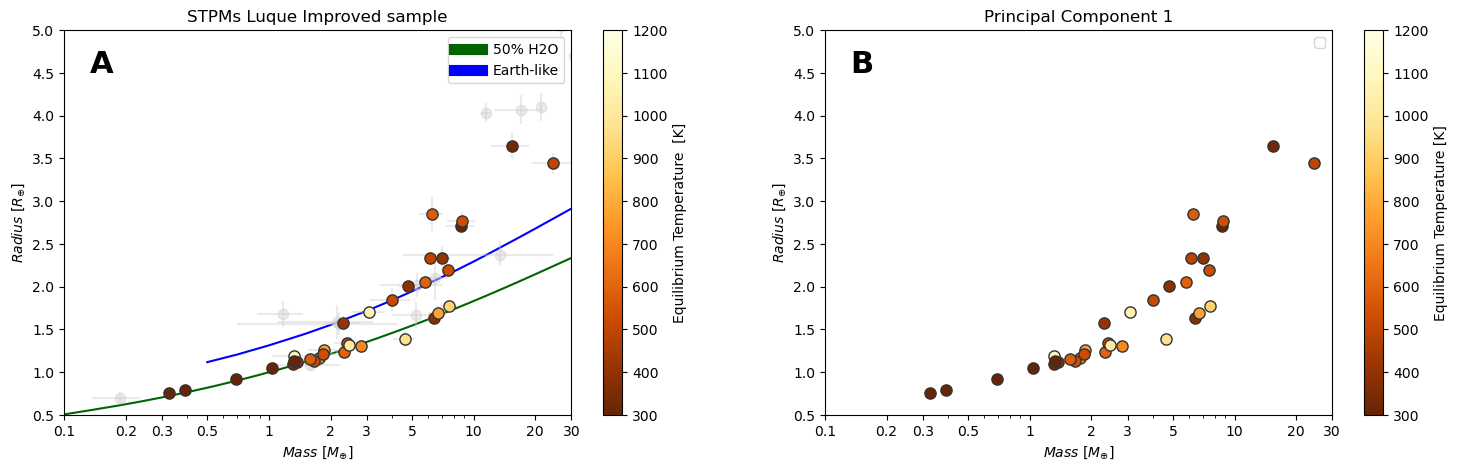

In [10]:
fig, ax = plt.subplots(figsize=(18,5))
for i, label in enumerate(('A', 'B')):
    ax = fig.add_subplot(1,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=22, fontweight='bold', va='top')
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'GJ 3053 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'CD-60 8051 b', 'L 98-59 c', 'L 98-59 d', 'GJ 3053 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b']
mass_err_LI   = [mass_unc_low_LI,mass_unc_up_LI]
radius_err_LI = [radius_unc_low_LI,radius_unc_up_LI]
plt.errorbar(mass_LI,radius_LI,xerr = mass_err_LI, yerr=radius_err_LI,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
# plt.scatter(mass_LI[i], radius_LI[i], s=72, facecolors='none', edgecolors='0.2')

plt.plot(list(earth_like_rocky["Mass"]),list(earth_like_rocky["Radius"]),"-",color = "Darkgreen",label = "50% H2O",zorder = -40)
plt.plot(list(H20_50_500K["Mass"]),list(H20_50_500K["Radius"]),"-",color = "Blue",label = "Earth-like",zorder = -40)

norm = mcolors.Normalize(vmin=300, vmax=1200)  # Set the desired min and max values
cmap = plt.cm.get_cmap('YlOrBr_r')
density = []; mass = []; radius = []
for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] in planets:
        plt.scatter(mass_LI[i], radius_LI[i], c=[pl_eq_LI[i]], cmap=cmap, norm=norm, marker='o',s=65, edgecolors='0.2')   
        density.append(density_LI[i])
        mass.append(mass_LI[i])
        radius.append(radius_LI[i])
cbar = plt.colorbar(label = "Equilibrium Temperature  [K]")
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log"); plt.xlim(0.1,30); plt.ylim(0.5,5)
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
leg = plt.legend(loc = 1)
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.title("STPMs Luque Improved sample")

def find_planet(name):
    index = planet_name_LI.index(name)
    plt.plot(mass_LI[index],radius_LI[index],".", color = "blue")
    mass_err_LI_index   = [mass_unc_low_LI[index],mass_unc_up_LI[index]]
    radius_err_LI_index = [radius_unc_low_LI[index],radius_unc_up_LI[index]]
    plt.errorbar(mass_LI[index],radius_LI[index],fmt='.',markersize = 15,color = "blue",zorder=-32,alpha = 0.4)
    print(str(name) + " has a mass of " + str(mass_LI[index]) + " a radius of "+str(radius_LI[index]))
    
    
plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] in planets:
        plt.scatter(mass_LI[i], radius_LI[i], c=[pl_eq_LI[i]], cmap=cmap, norm=norm, marker='o',s=65, edgecolors='0.2')   
cbar = plt.colorbar(label = "Equilibrium Temperature [K]")

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log"); plt.xlim(0.1,30); plt.ylim(0.5,5)
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
leg = plt.legend(loc = 1)
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.title("Principal Component 1")
image_name = 'STPM_PC1_compare.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

In [5]:
earth_like_rocky_mass_g        = earth_Mass*np.array(earth_like_rocky["Mass"])
earth_like_rocky_radius_cm     = earth_Radius*np.array(earth_like_rocky["Radius"])
earth_like_rocky_density_g_cm3 = (earth_like_rocky_mass_g) / ((4/3)*(np.pi)*(np.power(earth_like_rocky_radius_cm,3))   ) 

H20_50_500K_mass_g        = earth_Mass*np.array(H20_50_500K["Mass"])
H20_50_500K_radius_cm     = earth_Radius*np.array(H20_50_500K["Radius"])
H20_50_500K_density_g_cm3 = (H20_50_500K_mass_g) / ((4/3)*(np.pi)*(np.power(H20_50_500K_radius_cm,3))   ) 

def rocky_density(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = earth_like_rocky_density_g_cm3
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

def rocky_density2(mass):
    x_points  = earth_like_rocky["Mass"]
    y_points  = earth_like_rocky_density_g_cm3/earth_like_rocky_density_g_cm3
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()

def h20model_density(mass):
    x_points  = H20_50_500K["Mass"]
    y_points  = H20_50_500K_density_g_cm3/rocky_density(H20_50_500K["Mass"])
    tck       = interpolate.splrep(x_points, y_points)
    return interpolate.splev(mass, tck).tolist()


Text(0.5, 0, '$Mass\\ [M_{\\oplus}]$')

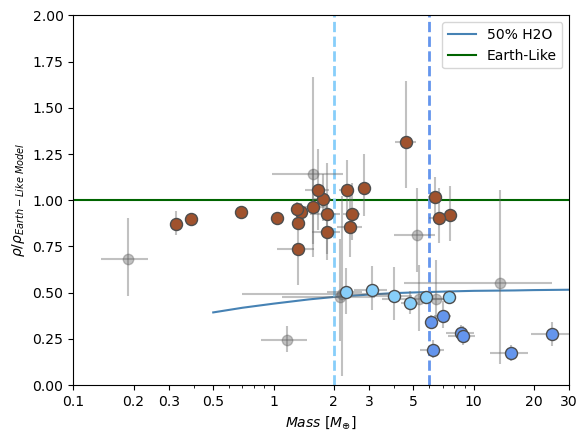

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the lines

plt.plot(H20_50_500K["Mass"], H20_50_500K_density_g_cm3 / rocky_density(H20_50_500K["Mass"]), "-", color="steelblue", label="50% H2O", zorder=-32)
plt.plot(earth_like_rocky["Mass"], earth_like_rocky_density_g_cm3 / rocky_density(earth_like_rocky["Mass"]), "-", color="darkgreen", label="Earth-Like", zorder=-32)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
mass_err_LI = np.array([mass_unc_low_LI, mass_unc_up_LI])
density_err_LI = [density_unc_low_LI / rocky_density(mass_LI), density_unc_up_LI / rocky_density(mass_LI)]
density_norm = density_LI / rocky_density(mass_LI)
index = []; index_rocky = []; index_water = []; index_puffy = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4:
        index.append(i) 
xerr = [mass_err_LI[0][index], mass_err_LI[1][index]]
yerr = [density_err_LI[0][index], density_err_LI[1][index]]
plt.errorbar(mass_LI[index], density_norm[index], xerr=xerr, yerr=yerr, fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i]))  and planet_name_LI[i] != 'K2-146 c':
            index_puffy.append(i)
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) or planet_name_LI[i] == 'K2-146 c':
            index_water.append(i)

plt.scatter(mass_LI[index_rocky], density_norm[index_rocky],color = "sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_puffy], density_norm[index_puffy],color = "cornflowerblue",s = 75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], density_norm[index_water],color = "lightskyblue",s = 75, edgecolor = "0.3")

plt.xlim(0.1, 30)
plt.ylim(0, 2); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.legend()
plt.xlabel("$Mass\ [M_{\oplus}]$")

In [7]:
def transform_to_pc_basis(mass, radius, PC1, PC2):
    # Assuming mass and radius are single values
    data = np.array([mass, radius])
    transformation_matrix = np.array([PC1, PC2])
    transformed_data = np.dot(np.transpose(transformation_matrix), data)
    mass = transformed_data[0]
    radius = transformed_data[1]
    return mass, radius

index = []; index_rocky = []; index_water = []; index_puffy = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4:
        index.append(i) 

for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i]))  and planet_name_LI[i] != 'K2-146 c':
            index_puffy.append(i)
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) or planet_name_LI[i] == 'K2-146 c':
            index_water.append(i)
            
PC1 = np.array([0.99091719, 0.13447347])
PC2 = np.array([0.13447347, -0.99091719])
mass   = list(mass_LI[index_rocky])+list(mass_LI[index_puffy])+list(mass_LI[index_water])
radius = list(radius_LI[index_rocky])+list(radius_LI[index_puffy])+list(radius_LI[index_water])

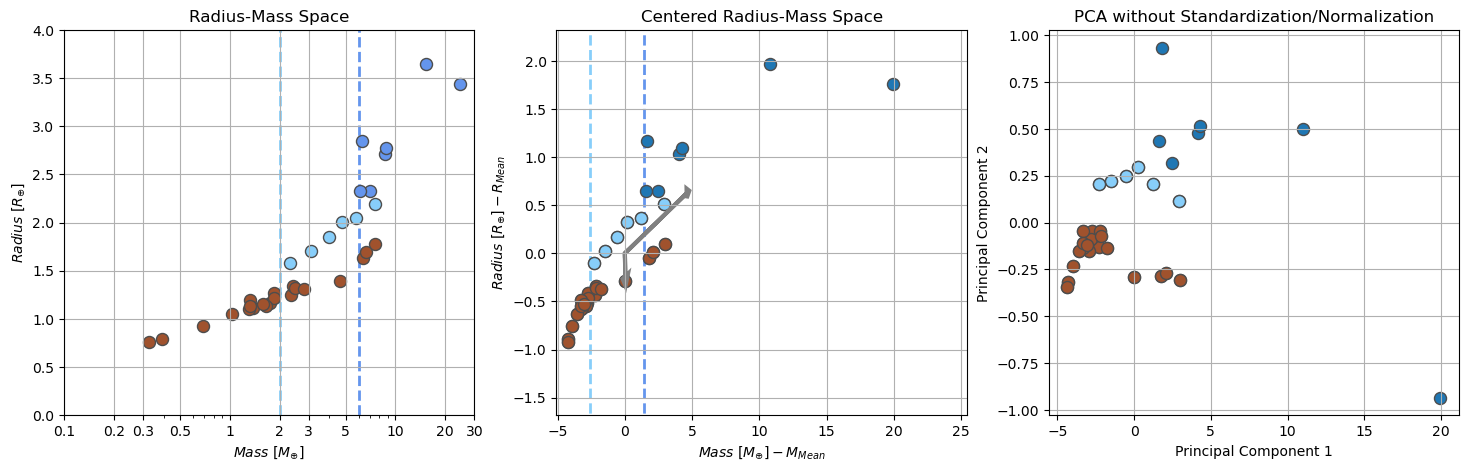

In [8]:
fig, ax = plt.subplots(figsize=(18,5))
mass = np.concatenate((mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
radius = np.concatenate((radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water]))

data = np.column_stack((mass, radius))
mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
top_k_eigenvectors = eigenvectors[:, :k]
projected_data = np.dot(centered_data, top_k_eigenvectors)
                        
data_rocky = np.column_stack((mass_LI[index_rocky], radius_LI[index_rocky])) - mean_vector
projected_data_rocky = np.dot(data_rocky, top_k_eigenvectors)

data_water = np.column_stack((mass_LI[index_water], radius_LI[index_water])) - mean_vector
projected_data_water = np.dot(data_water, top_k_eigenvectors)

data_puffy = np.column_stack((mass_LI[index_puffy], radius_LI[index_puffy])) - mean_vector
projected_data_puffy = np.dot(data_puffy, top_k_eigenvectors)

plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)

plt.scatter(mass_LI[index_puffy], radius_LI[index_puffy],color = "cornflowerblue",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_rocky], radius_LI[index_rocky],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], radius_LI[index_water],color = "lightskyblue",s=75, edgecolor = "0.3")

plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.xlim(0.1, 30); plt.ylim(0, 4); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$Radius \ [R_{\oplus}]$'); plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.title('Radius-Mass Space')

plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)
plt.scatter(centered_data[:,0],centered_data[:,1],s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_rocky]-mean_vector[0], radius_LI[index_rocky]-mean_vector[1],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water]-mean_vector[0], radius_LI[index_water]-mean_vector[1],color = "lightskyblue",s=75, edgecolor = "0.3")

scaled_PC1 = np.sqrt(eigenvalues[0]) * PC1
scaled_PC2 = np.sqrt(eigenvalues[1]) * PC2

plt.arrow(0, 0,scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC2')
plt.arrow(0, 0,scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.4, head_length=0.1, fc='0.5', ec='0.5', label='Scaled PC2')
plt.vlines(2-mean_vector[0],-4,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6-mean_vector[0],-4,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.xlim(0-mean_vector[0]-0.5, 30-mean_vector[0]); plt.ylim(0-mean_vector[1], 4-mean_vector[1]); 
#plt.xscale("log")
#plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$Radius \ [R_{\oplus}] - R_{Mean}$'); plt.xlabel("$Mass\ [M_{\oplus}] - M_{Mean}$")
plt.title('Centered Radius-Mass Space')


plt.subplot(1, 3, 3)  # 1 row, 2 columns, first subplot
plt.scatter(projected_data[:, 0], projected_data[:, 1],s=75, edgecolor = "0.3")
plt.scatter(projected_data_rocky[:, 0], projected_data_rocky[:, 1],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(projected_data_water[:, 0], projected_data_water[:, 1],color = "lightskyblue",s=75, edgecolor = "0.3")
plt.title('PCA without Standardization/Normalization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(zorder = -32)



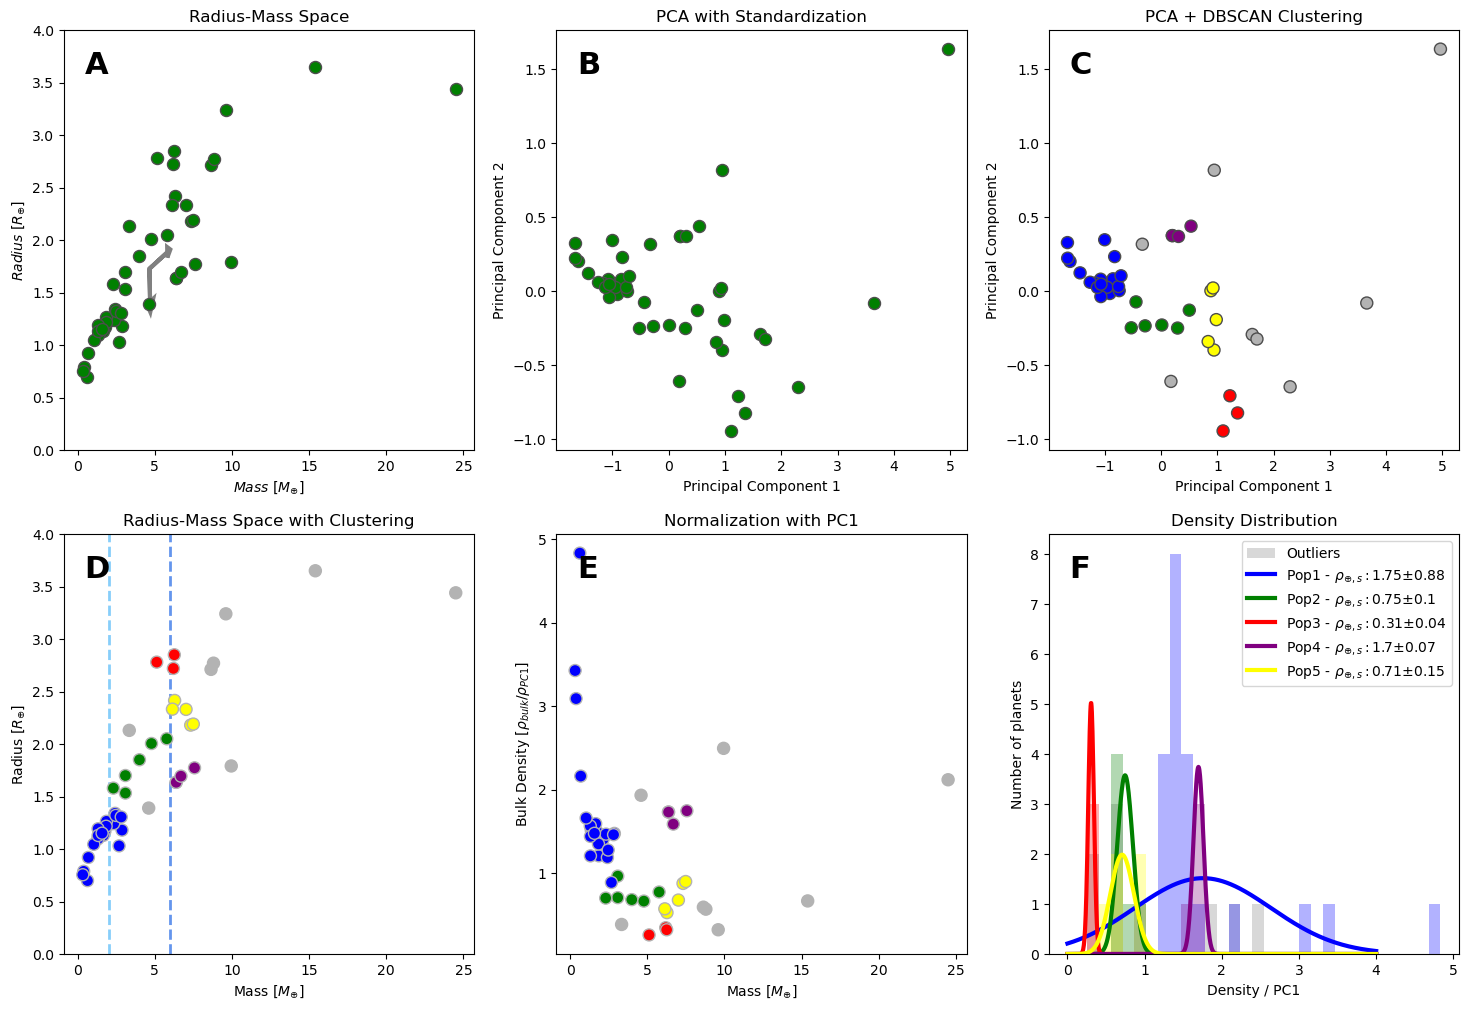

In [1280]:
from sklearn.cluster import OPTICS

fig, ax = plt.subplots(figsize=(18,12))
for i, label in enumerate(('A', 'B',"C","D","E","F")):
    ax = fig.add_subplot(2,3,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=22, fontweight='bold', va='top')
mass = np.concatenate((mass2,mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
density = np.concatenate((density2,density_LI[index_rocky], density_LI[index_puffy], density_LI[index_water]))
radius = np.concatenate((radius2,radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water]))

df = pd.DataFrame({'Mass': mass, 'Radius': radius})
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

data = np.column_stack((mass, radius)); mean_vector = np.mean(data, axis=0)
centered_data = np.column_stack(((mass-mean_vector[0])/np.std(mass), (radius-mean_vector[1])/np.std(radius)  ))
covariance_matrix = np.cov(centered_data, rowvar=False); eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

plt.subplot(2, 3, 1)  # 1 row, 2 columns, first subplot
# plt.grid(zorder = -32)

PC1 = np.array([0.99091719, 0.13447347])
PC2 = np.array([0.13447347, -0.99091719])
scaled_PC1 = np.sqrt(eigenvalues[0]) * PC1
scaled_PC2 = np.sqrt(eigenvalues[1]) * PC2

plt.arrow(mean_vector[0], mean_vector[1],scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC2')
plt.arrow(mean_vector[0], mean_vector[1],scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.4, head_length=0.1, fc='0.5', ec='0.5', label='Scaled PC2')
df = pd.DataFrame({'Mass': mass, 'Radius': radius})
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
dbscan = DBSCAN(eps=0.30, min_samples=3)
labels = dbscan.fit_predict(pca_result)
colors = colorlist(labels) 
plt.scatter(mass, radius,color = "green",s=75, edgecolor = "0.3")
plt.ylabel('$Radius \ [R_{\oplus}]$'); plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.title('Radius-Mass Space')
plt.ylim(0,4)

plt.subplot(2, 3, 2)  # 1 row, 2 columns, first subplot
plt.scatter(pca_result[:, 0], pca_result[:, 1],color = "green",s=75, edgecolor = "0.3")
plt.title('PCA with Standardization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(2, 3, 3) 
clusters = dbscan.fit_predict(pca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, cmap='viridis', label='DBSCAN Clusters',s=75, edgecolor = "0.3")
plt.title('PCA + DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(2, 3, 4)        
plt.scatter(mass, radius, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('Radius-Mass Space with Clustering')
plt.xlabel("Mass $[M_{\oplus}]$")
plt.ylabel("Radius $[R_{\oplus}]$")
plt.vlines(2,0,4.5,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,4.5,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.ylim(0,4)
plt.subplot(2, 3, 5)
plt.scatter(mass, density/PCA_density(mass), c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('Normalization with PC1')
plt.xlabel("Mass $[M_{\oplus}]$")
plt.ylabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")

plt.subplot(2, 3, 6)
outliers, pop1,pop2,pop3,pop4,pop5,pop6= make_histograms(mass, density/PCA_density(mass), labels)
range_min = min(min(outliers),min(pop1), min(pop2), min(pop3), min(pop4))
range_max = max(max(outliers),max(pop1), max(pop2), max(pop3), max(pop4))
plt.hist(outliers, bins=bins, alpha = 0.5,label=['Outliers'], range=(range_min, range_max), color=["0.7"], stacked=True)
hist_values_false, bin_edges, _ = plt.hist(pop1, bins=bins,range=(range_min, range_max), color='Blue', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop1)
sigma = np.sqrt(np.cov(pop1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Blue",linewidth=3,label ="Pop1 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop2, bins=bins,range=(range_min, range_max), color='Green', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop2)
sigma = np.sqrt(np.cov(pop2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Green",linewidth=3,label ="Pop2 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop3, bins=bins,range=(range_min, range_max), color='Red', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop3)
sigma = np.sqrt(np.cov(pop3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Red",linewidth=3,label ="Pop3 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop4, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop4)
sigma = np.sqrt(np.cov(pop4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Purple",linewidth=3,label ="Pop4 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop5, bins=bins,range=(range_min, range_max), color='Yellow', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop5)
sigma = np.sqrt(np.cov(pop5, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Yellow",linewidth=3,label ="Pop5 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

plt.xlabel('Density / PC1')
plt.ylabel('Number of planets')
plt.title("Density Distribution")
plt.legend()

image_name = 'DBSCAN_complete.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=800)


In [1297]:
mass = np.concatenate((mass2,mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
density = np.concatenate((density2,density_LI[index_rocky], density_LI[index_puffy], density_LI[index_water]))
radius = np.concatenate((radius2,radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water]))

density_PCA_puffy = np.array(density_puffy)/PCA_density(mass_puffy)
density_PCA_water = np.array(density_water)/PCA_density(mass_water)
density_PCA_rocky = np.array(density_rocky)/PCA_density(mass_rocky)
density_PCA_new   = np.array(density2)/PCA_density(mass2)

mass_PCA_puffy_up  = np.array(mass_up_puffy) 
mass_PCA_puffy_low = np.array(mass_low_puffy)
mass_PCA_water_up  = np.array(mass_up_water) 
mass_PCA_water_low = np.array(mass_low_water)
mass_PCA_rocky_up  = np.array(mass_up_rocky)
mass_PCA_rocky_low = np.array(mass_low_rocky)
mass_PCA_new_up    = np.array(mass_up2)
mass_PCA_new_low   = np.array(mass_low2)

density_PCA_puffy_up  = np.array(density_up_puffy) /PCA_density(mass_puffy)
density_PCA_puffy_low = np.array(density_low_puffy)/PCA_density(mass_puffy)
density_PCA_water_up  = np.array(density_up_water) /PCA_density(mass_water)
density_PCA_water_low = np.array(density_low_water)/PCA_density(mass_water)
density_PCA_rocky_up  = np.array(density_up_rocky) /PCA_density(mass_rocky)
density_PCA_rocky_low = np.array(density_low_rocky)/PCA_density(mass_rocky)
density_PCA_new_up    = np.array(density_up2)/PCA_density(mass2)
density_PCA_new_low   = np.array(density_low2)/PCA_density(mass2)

mass_PCA_err_up       = np.concatenate((mass_PCA_new_up, mass_PCA_rocky_up, mass_PCA_puffy_up,mass_PCA_water_up))
mass_PCA_err_low      = np.concatenate((mass_PCA_new_low,mass_PCA_rocky_low, mass_PCA_puffy_low, mass_PCA_water_low))
density_PCA_err_up    = np.concatenate((density_PCA_new_up, density_PCA_rocky_up, density_PCA_puffy_up, density_PCA_water_up))
density_PCA_err_low   = np.concatenate((density_PCA_new_low, density_PCA_rocky_low, density_PCA_puffy_low,density_PCA_water_low))
density_PCA           = np.concatenate((density_PCA_new, density_PCA_rocky, density_PCA_puffy, density_PCA_water))
xerr                  = [np.abs(mass_PCA_err_low),mass_PCA_err_up]
yerr                  = [np.abs(density_PCA_err_low),density_PCA_err_up]

In [1287]:
colors

['0.7',
 '0.7',
 'blue',
 'blue',
 'green',
 'red',
 'red',
 'purple',
 'blue',
 'blue',
 '0.7',
 'yellow',
 'yellow',
 'blue',
 'purple',
 'blue',
 'blue',
 'purple',
 'blue',
 'blue',
 'blue',
 'purple',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 '0.7',
 'blue',
 'yellow',
 '0.7',
 'red',
 'yellow',
 '0.7',
 '0.7',
 '0.7',
 'green',
 'green',
 'green',
 'yellow',
 'green',
 'green']

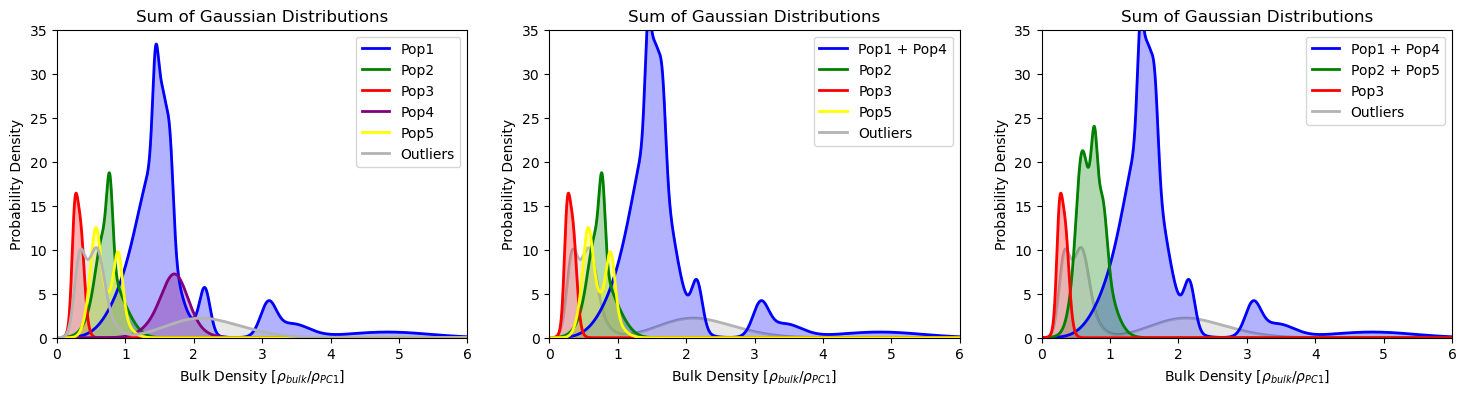

In [1323]:
x = np.linspace(0, 6, 100000)
grey_total   = 0
blue_total   = 0
yellow_total = 0
green_total  = 0
red_total    = 0
purple_total = 0
for i in range(0,len(density)):
    if colors[i] == '0.7':
        mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
        y = norm.pdf(x, mu, sigma)
        grey_total += y
    if colors[i] == 'blue':
        mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
        y = norm.pdf(x, mu, sigma)
        blue_total += y
    if colors[i] == 'yellow':
        mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
        y = norm.pdf(x, mu, sigma)
        yellow_total += y
    if colors[i] == 'green':
        mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
        y = norm.pdf(x, mu, sigma)
        green_total += y
    if colors[i] == 'purple':
        mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
        y = norm.pdf(x, mu, sigma)
        purple_total += y
    if colors[i] == 'red':
        mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
        y = norm.pdf(x, mu, sigma)
        red_total += y

fig, ax = plt.subplots(figsize=(18,4))
plt.subplot(1, 3, 1)
plt.plot(x, blue_total, linestyle='-', linewidth=2,color= "blue",label = "Pop1")
plt.fill_between(x, 0, blue_total, color="blue", alpha=0.3)

plt.plot(x, green_total, linestyle='-', linewidth=2,color= "green",label = "Pop2")
plt.fill_between(x, 0, green_total, color="green", alpha=0.3)

plt.plot(x, red_total, linestyle='-', linewidth=2,color= "red",label = "Pop3")
plt.fill_between(x, 0, red_total, color="red", alpha=0.3)

plt.plot(x, purple_total, linestyle='-', linewidth=2,color= "purple",label = "Pop4")
plt.fill_between(x, 0, purple_total, color="purple", alpha=0.3)

plt.plot(x, yellow_total, linestyle='-', linewidth=2,color= "yellow",label = "Pop5")
plt.fill_between(x, 0, yellow_total, color="yellow", alpha=0.3)

plt.plot(x, grey_total, linestyle='-', linewidth=2,color= "0.7",label = "Outliers")
plt.fill_between(x, 0, grey_total, color="0.7", alpha=0.3)

plt.xlim(0,6)
plt.ylim(0,35)
plt.title('Sum of Gaussian Distributions')
plt.xlabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, blue_total+purple_total, linestyle='-', linewidth=2,color= "blue",label = "Pop1 + Pop4")
plt.fill_between(x, 0, blue_total+purple_total, color="blue", alpha=0.3)

plt.plot(x, green_total, linestyle='-', linewidth=2,color= "green",label = "Pop2")
plt.fill_between(x, 0, green_total, color="green", alpha=0.3)

plt.plot(x, red_total, linestyle='-', linewidth=2,color= "red",label = "Pop3")
plt.fill_between(x, 0, red_total, color="red", alpha=0.3)

plt.plot(x, yellow_total, linestyle='-', linewidth=2,color= "yellow",label = "Pop5")
plt.fill_between(x, 0, yellow_total, color="yellow", alpha=0.3)

plt.plot(x, grey_total, linestyle='-', linewidth=2,color= "0.7",label = "Outliers",zorder = -32)
plt.fill_between(x, 0, grey_total, color="0.7", alpha=0.3)
plt.legend()
plt.xlim(0,6)
plt.ylim(0,35)
plt.title('Sum of Gaussian Distributions')
plt.xlabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.ylabel('Probability Density')

plt.subplot(1, 3, 3)
plt.plot(x, blue_total+purple_total, linestyle='-', linewidth=2,color= "blue",label = "Pop1 + Pop4")
plt.fill_between(x, 0, blue_total+purple_total, color="blue", alpha=0.3)

plt.plot(x, green_total+yellow_total, linestyle='-', linewidth=2,color= "green",label = "Pop2 + Pop5")
plt.fill_between(x, 0, green_total+yellow_total, color="green", alpha=0.3)

plt.plot(x, red_total, linestyle='-', linewidth=2,color= "red",label = "Pop3")
plt.fill_between(x, 0, red_total, color="red", alpha=0.3)

plt.plot(x, grey_total, linestyle='-', linewidth=2,color= "0.7",label = "Outliers",zorder = -32)
plt.fill_between(x, 0, grey_total, color="0.7", alpha=0.3)
plt.legend()
plt.xlim(0,6)
plt.ylim(0,35)
plt.title('Sum of Gaussian Distributions')
plt.xlabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.ylabel('Probability Density')

image_name = 'Hist_DBSCAN.jpeg'
image_format = 'jpeg'
plt.legend()
fig.savefig(image_name, format=image_format, dpi=300)

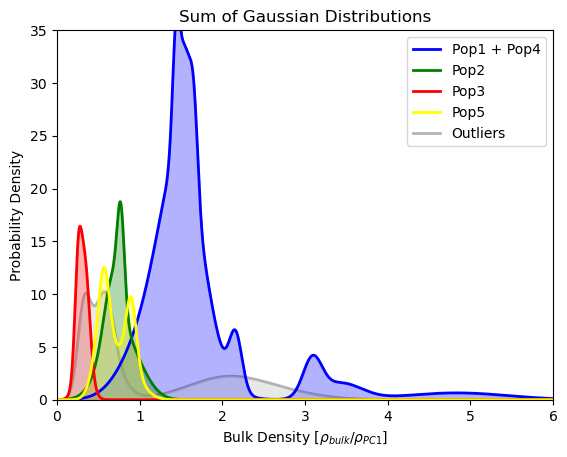

In [1318]:
plt.plot(x, blue_total+purple_total, linestyle='-', linewidth=2,color= "blue",label = "Pop1 + Pop4")
plt.fill_between(x, 0, blue_total+purple_total, color="blue", alpha=0.3)

plt.plot(x, green_total, linestyle='-', linewidth=2,color= "green",label = "Pop2")
plt.fill_between(x, 0, green_total, color="green", alpha=0.3)

plt.plot(x, red_total, linestyle='-', linewidth=2,color= "red",label = "Pop3")
plt.fill_between(x, 0, red_total, color="red", alpha=0.3)

plt.plot(x, yellow_total, linestyle='-', linewidth=2,color= "yellow",label = "Pop5")
plt.fill_between(x, 0, yellow_total, color="yellow", alpha=0.3)

plt.plot(x, grey_total, linestyle='-', linewidth=2,color= "0.7",label = "Outliers",zorder = -32)
plt.fill_between(x, 0, grey_total, color="0.7", alpha=0.3)
plt.legend()
plt.xlim(0,6)
plt.ylim(0,35)
plt.title('Sum of Gaussian Distributions')
plt.xlabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.ylabel('Probability Density')
image_name = 'PC2_hist.png'
image_format = 'png'
plt.legend()
#fig.savefig(image_name, format=image_format, dpi=300)

In [ ]:
mass = np.concatenate((mass2,mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
density = np.concatenate((density2,density_LI[index_rocky], density_LI[index_puffy], density_LI[index_water]))
radius = np.concatenate((radius2,radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water]))


mass_PCA_puffy_up  = np.array(mass_up_puffy) 
mass_PCA_puffy_low = np.array(mass_low_puffy)
mass_PCA_water_up  = np.array(mass_up_water) 
mass_PCA_water_low = np.array(mass_low_water)
mass_PCA_rocky_up  = np.array(mass_up_rocky)
mass_PCA_rocky_low = np.array(mass_low_rocky)
mass_PCA_new_up    = np.array(mass_up2)
mass_PCA_new_low   = np.array(mass_low2)

density_PCA_puffy_up  = np.array(density_up_puffy) /PCA_density(mass_puffy)
density_PCA_puffy_low = np.array(density_low_puffy)/PCA_density(mass_puffy)
density_PCA_water_up  = np.array(density_up_water) /PCA_density(mass_water)
density_PCA_water_low = np.array(density_low_water)/PCA_density(mass_water)
density_PCA_rocky_up  = np.array(density_up_rocky) /PCA_density(mass_rocky)
density_PCA_rocky_low = np.array(density_low_rocky)/PCA_density(mass_rocky)
density_PCA_new_up    = np.array(density_up2)/PCA_density(mass2)
density_PCA_new_low   = np.array(density_low2)/PCA_density(mass2)

mass_PCA_err_up       = np.concatenate((mass_PCA_new_up, mass_PCA_rocky_up, mass_PCA_puffy_up,mass_PCA_water_up))
mass_PCA_err_low      = np.concatenate((mass_PCA_new_low,mass_PCA_rocky_low, mass_PCA_puffy_low, mass_PCA_water_low))
density_PCA_err_up    = np.concatenate((density_PCA_new_up, density_PCA_rocky_up, density_PCA_puffy_up, density_PCA_water_up,))
density_PCA_err_low   = np.concatenate((density_PCA_new_low, density_PCA_rocky_low, density_PCA_puffy_low,density_PCA_water_low))

xerr                  = [np.abs(mass_PCA_err_low),mass_PCA_err_up]
yerr                  = [np.abs(density_PCA_err_low),density_PCA_err_up]

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

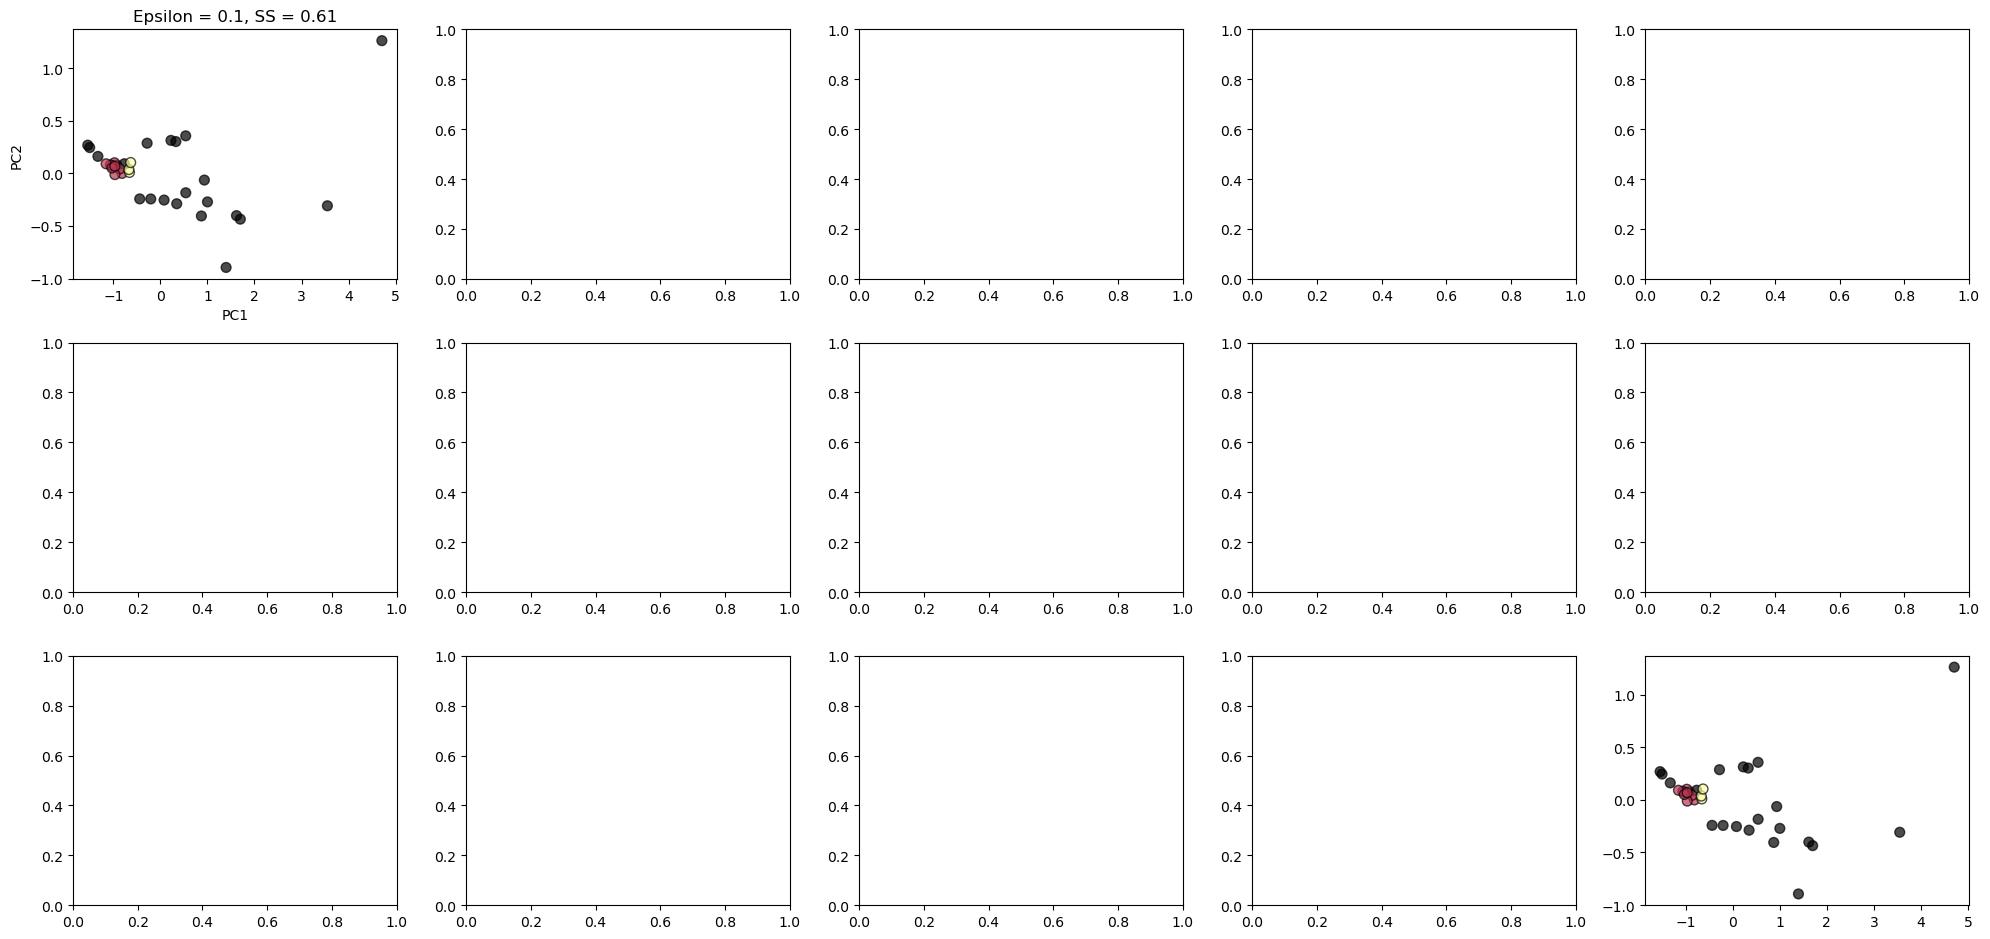

In [1267]:
df = pd.DataFrame({'Mass': mass, 'Radius': radius})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

PC1 = pca_result[:, 0]
PC2 = pca_result[:, 1]

isss = [0.1, 0.2,0.225,0.25,0.275,0.3,0.325,0.35, 0.4,0.5]

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
data = np.column_stack((PC1, PC2))

# Iterate through epsilon values and plot on each subplot
for i, eps in enumerate(isss):
    row = i // 4
    col = i % 4

    dbscan = DBSCAN(eps=eps, min_samples=3,metric = "euclidean")
    dbscan.fit(data)
    clusters = dbscan.fit_predict(pca_result)
    dbscan_labels = dbscan.fit_predict(pca_result)

    unique_labels = np.unique(dbscan_labels)
    num_clusters = len(unique_labels[unique_labels != -1])
    silhouette_avg = silhouette_score(pca_result[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])

    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan.labels_, cmap='inferno', edgecolors='k', s=50, alpha=0.7)
    silhouette_avg = silhouette_score(pca_result[clusters != -1], clusters[clusters != -1])
    axes[row, col].scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='inferno', edgecolors='k', s=50, alpha=0.7)
    axes[row, col].set_title(f'Epsilon = {eps}, SS = {np.round(silhouette_avg,2)}')
    axes[row, col].set_xlabel('PC1')
    axes[row, col].set_ylabel('PC2')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

image_name = 'DBSCAN_grid3.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=800)

In [1271]:
df = pd.DataFrame({'Mass': mass, 'Radius': radius})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

PC1 = pca_result[:, 0]
PC2 = pca_result[:, 1]

isss = np.linspace(0.01,0.8,100)
scores_sillutet = []
scores_CH       = []
data = np.column_stack((PC1, PC2))

# Iterate through epsilon values and plot on each subplot
for i, eps in enumerate(isss):
    dbscan = DBSCAN(eps=eps, min_samples=3,metric = "euclidean")
    dbscan.fit(data)
    clusters = dbscan.fit_predict(pca_result)
    dbscan_labels = dbscan.fit_predict(pca_result)
    unique_labels = np.unique(dbscan_labels)
    num_clusters = len(unique_labels[unique_labels != -1])
    if num_clusters < 2:
        scores_sillutet.append(0)
        scores_CH.append(0)
    else:
        silhouette_avg = silhouette_score(pca_result[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
        scores_sillutet.append(silhouette_avg)
        calinski_harabasz_index = calinski_harabasz_score(pca_result, dbscan_labels)
        scores_CH.append(calinski_harabasz_index)

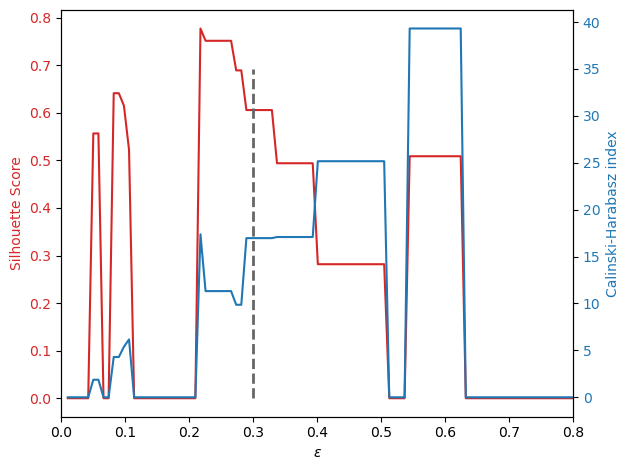

In [1272]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("$\epsilon$")
ax1.set_ylabel("Silhouette Score", color=color)
ax1.plot(isss,scores_sillutet, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Calinski-Harabasz index', color=color)  # we already handled the x-label with ax1
ax2.plot(isss,scores_CH, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.vlines(0.3,-0.1,35,colors = "0.4",linestyle = "dashed",zorder=-32,linewidth = 2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim(0,0.8)
plt.show()
image_name = 'Metric_DBSCAN.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=800)

In [1250]:
def colorlist(labels):
    color=["0.7",'blue', 'green',"red","purple","yellow","orange"]
    colors = []
    for i in range(len(labels)):
        if labels[i] == -1:
            colors.append(color[0])
        if labels[i] == 0:
            colors.append(color[1])
        if labels[i] == 1:
            colors.append(color[2])
        if labels[i] == 2:
            colors.append(color[3])
        if labels[i] == 3:
            colors.append(color[4])
        if labels[i] == 4:
            colors.append(color[5])
        if labels[i] == 5:
            colors.append(color[6])
    return colors

In [1095]:
labels = dbscan.fit_predict(pca_result)
colors = colorlist(labels) 

In [1249]:
def make_histograms(mass,density,labels):
    outliers = []; pop0 = []; pop1 = []; pop2 = []; pop3 = []; pop4 = []; pop5 = []; pop6 = []
    for i in range(len(labels)):
        if labels[i] == -1:
            outliers.append(density[i])
        if labels[i] == 0:
            pop1.append(density[i])
        if labels[i] == 1:
            pop2.append(density[i])
        if labels[i] == 2:
            pop3.append(density[i])
        if labels[i] == 3:
            pop4.append(density[i])
        if labels[i] == 4:
            pop5.append(density[i])
        if labels[i] == 5:
            pop6.append(density[i])
    return outliers, pop1,pop2,pop3,pop4,pop5,pop6

def colorlist(labels):
    color=["0.7",'blue', 'green',"red","purple","yellow"]
    colors = []
    for i in range(len(labels)):
        if labels[i] == -1:
            colors.append(color[0])
        if labels[i] == 0:
            colors.append(color[1])
        if labels[i] == 1:
            colors.append(color[2])
        if labels[i] == 2:
            colors.append(color[3])
        if labels[i] == 3:
            colors.append(color[4])
        if labels[i] == 4:
            colors.append(color[5])
    return colors

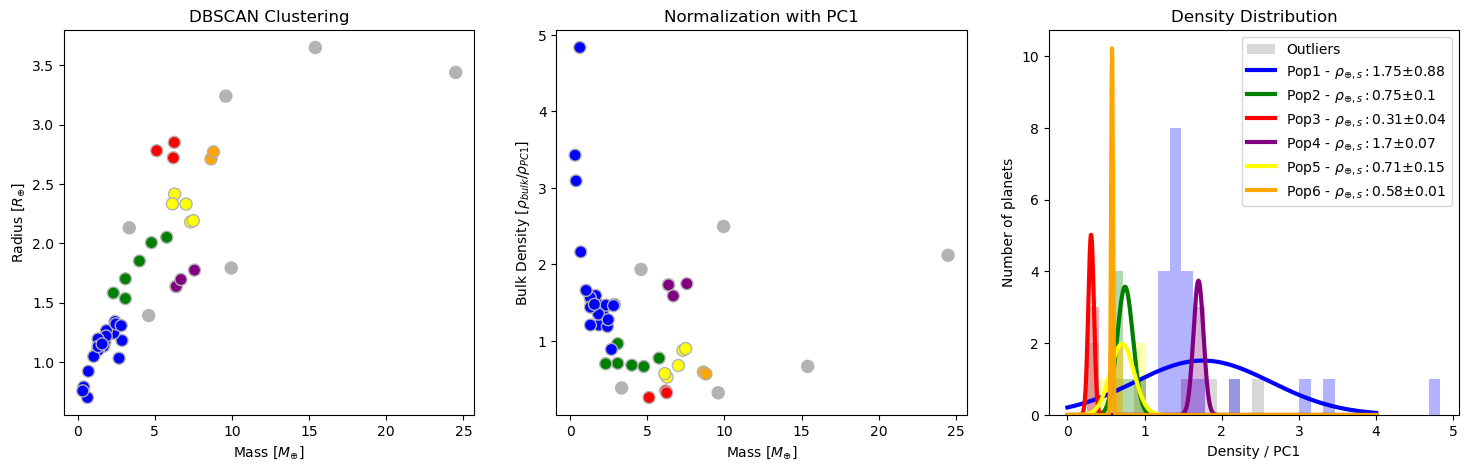

In [1136]:
bins = 30

mass = np.concatenate((mass2, mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
density = np.concatenate((density2, density_LI[index_rocky], density_LI[index_puffy], density_LI[index_water]))
radius = np.concatenate((radius2, radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water]))

df = pd.DataFrame({'Mass': mass, 'Radius': radius})
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

dbscan = DBSCAN(eps=0.29727272, min_samples=2)
labels = dbscan.fit_predict(pca_result)
colors = colorlist(labels) 

fig, ax = plt.subplots(figsize=(18,5))
for i, label in enumerate(("$\epsilon = 0.30$", "$\epsilon = 0.30$")):
    ax = fig.add_subplot(3,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=22, fontweight='bold', va='top')
plt.subplot(1, 3, 1)        
plt.scatter(mass, radius, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('DBSCAN Clustering')
plt.xlabel("Mass $[M_{\oplus}]$")
plt.ylabel("Radius $[R_{\oplus}]$")

plt.subplot(1, 3, 2)
plt.scatter(mass, density/PCA_density(mass), c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('Normalization with PC1')
plt.xlabel("Mass $[M_{\oplus}]$")
plt.ylabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")

plt.subplot(1, 3, 3)
outliers, pop1,pop2,pop3,pop4,pop5,pop6= make_histograms(mass, density/PCA_density(mass), labels)
range_min = min(min(outliers),min(pop1), min(pop2), min(pop3), min(pop4),min(pop5),min(pop6))
range_max = max(max(outliers),max(pop1), max(pop2), max(pop3), max(pop4),min(pop5),min(pop6))
plt.hist(outliers, bins=bins, alpha = 0.5,label=['Outliers'], range=(range_min, range_max), color=["0.7"], stacked=True)
hist_values_false, bin_edges, _ = plt.hist(pop1, bins=bins,range=(range_min, range_max), color='Blue', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop1)
sigma = np.sqrt(np.cov(pop1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Blue",linewidth=3,label ="Pop1 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop2, bins=bins,range=(range_min, range_max), color='Green', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop2)
sigma = np.sqrt(np.cov(pop2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Green",linewidth=3,label ="Pop2 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop3, bins=bins,range=(range_min, range_max), color='Red', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop3)
sigma = np.sqrt(np.cov(pop3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Red",linewidth=3,label ="Pop3 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop4, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop4)
sigma = np.sqrt(np.cov(pop4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Purple",linewidth=3,label ="Pop4 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop5, bins=bins,range=(range_min, range_max), color='Yellow', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop5)
sigma = np.sqrt(np.cov(pop5, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Yellow",linewidth=3,label ="Pop5 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop6, bins=bins,range=(range_min, range_max), color='Orange', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop6)
sigma = np.sqrt(np.cov(pop6, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Orange",linewidth=3,label ="Pop6 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))



plt.xlabel('Density / PC1')
plt.ylabel('Number of planets')
plt.title("Density Distribution")
plt.legend()



In [ ]:

hist_values_false, bin_edges, _ = plt.hist(pop2, bins=bins,range=(range_min, range_max), color='Green', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop2)
sigma = np.sqrt(np.cov(pop2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Green",linewidth=3,label ="Pop2 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop3, bins=bins,range=(range_min, range_max), color='Red', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop3)
sigma = np.sqrt(np.cov(pop3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Red",linewidth=3,label ="Pop3 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop4, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop4)
sigma = np.sqrt(np.cov(pop4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Purple",linewidth=3,label ="Pop4 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop5, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop5)
sigma = np.sqrt(np.cov(pop5, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars


Text(0, 0.5, 'Radius $[R_{\\oplus}]$')

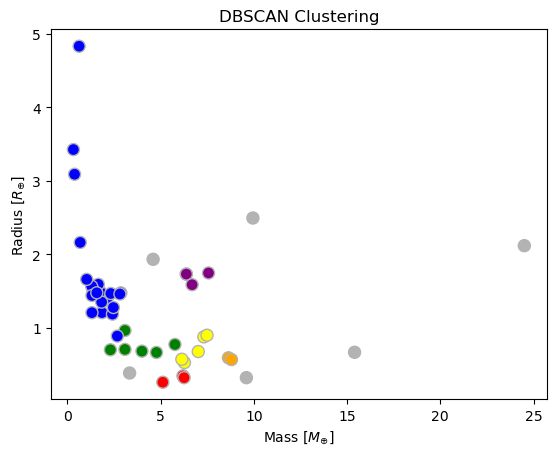

In [1104]:
labels = dbscan.fit_predict(pca_result)
colors = colorlist(labels) 
plt.scatter(mass, density/PCA_density(mass), c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('DBSCAN Clustering')
plt.xlabel("Mass $[M_{\oplus}]$")
plt.ylabel("Radius $[R_{\oplus}]$")


In [1036]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

data_std = pca_result
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_result)

silhouette_avg = silhouette_score(pca_result[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6829993051530641


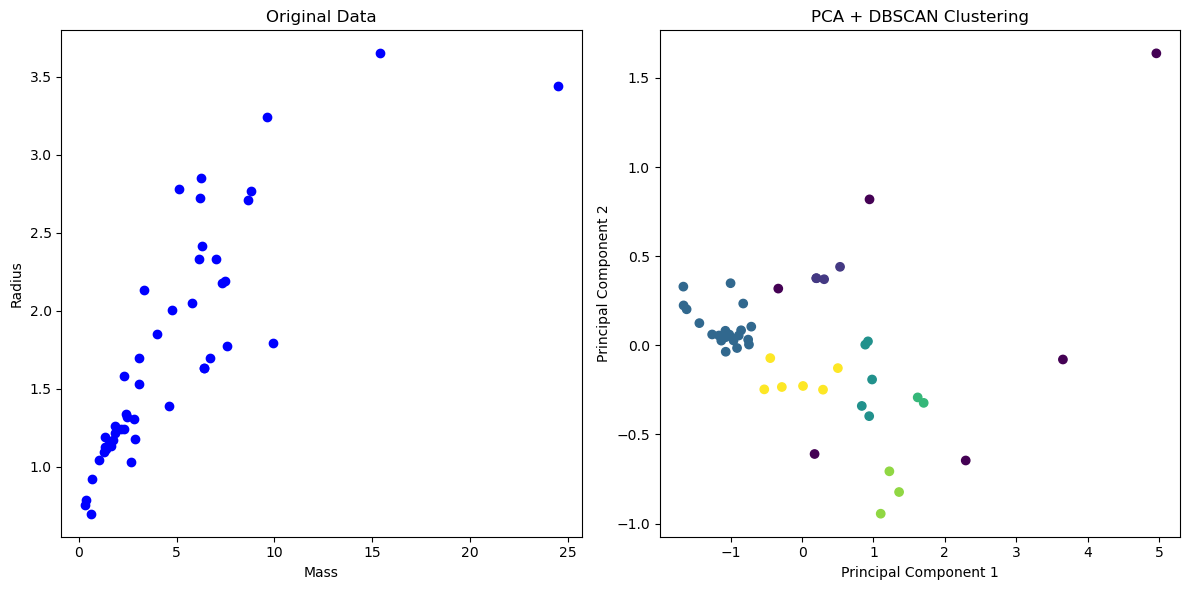

In [956]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

mass = np.concatenate((mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water],mass2))
radius = np.concatenate((radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water],radius2))

# Create a DataFrame with the features
df = pd.DataFrame({'Mass': mass, 'Radius': radius})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=2)
clusters = dbscan.fit_predict(pca_result)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(df['Mass'], df['Radius'], c='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Mass')
plt.ylabel('Radius')

# Plot PCA-transformed data with DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', label='DBSCAN Clusters')
plt.title('PCA + DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


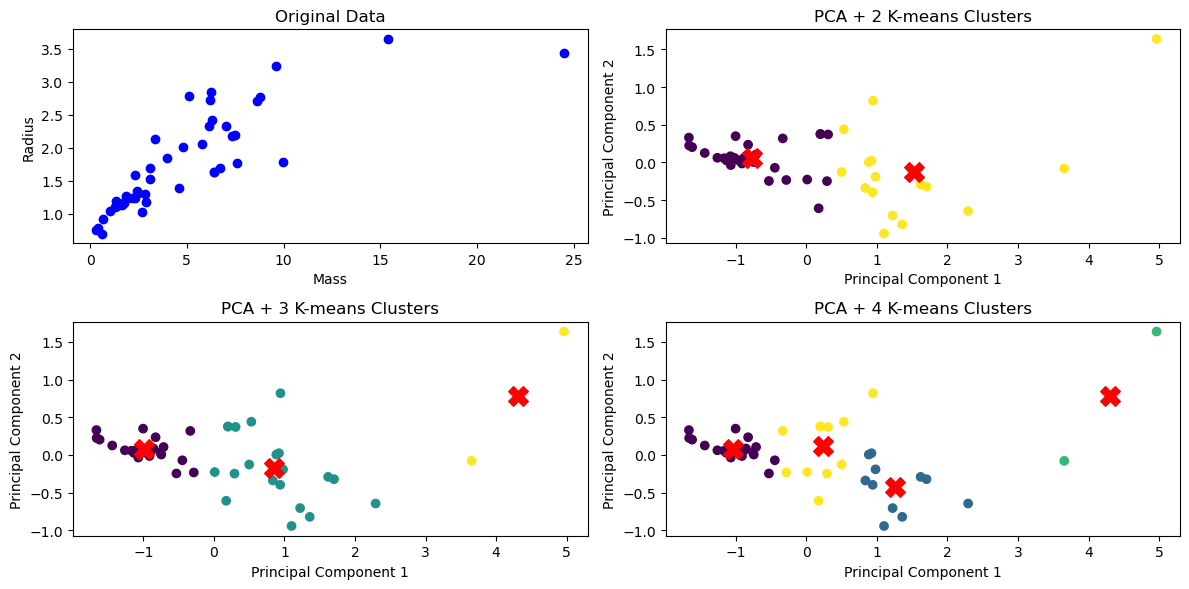

In [961]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a DataFrame with the features
df = pd.DataFrame({'Mass': mass, 'Radius': radius})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(2, 2, 1)
plt.scatter(df['Mass'], df['Radius'], c='blue', label='2023 Sample')
plt.title('Original Data')
plt.xlabel('Mass')
plt.ylabel('Radius')

# Plot PCA-transformed data with K-means clusters
plt.subplot(2, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', label='K-means Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('PCA + 2 K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()

plt.subplot(2, 2, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', label='K-means Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('PCA + 3 K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()

plt.subplot(2, 2, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', label='K-means Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('PCA + 4 K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()



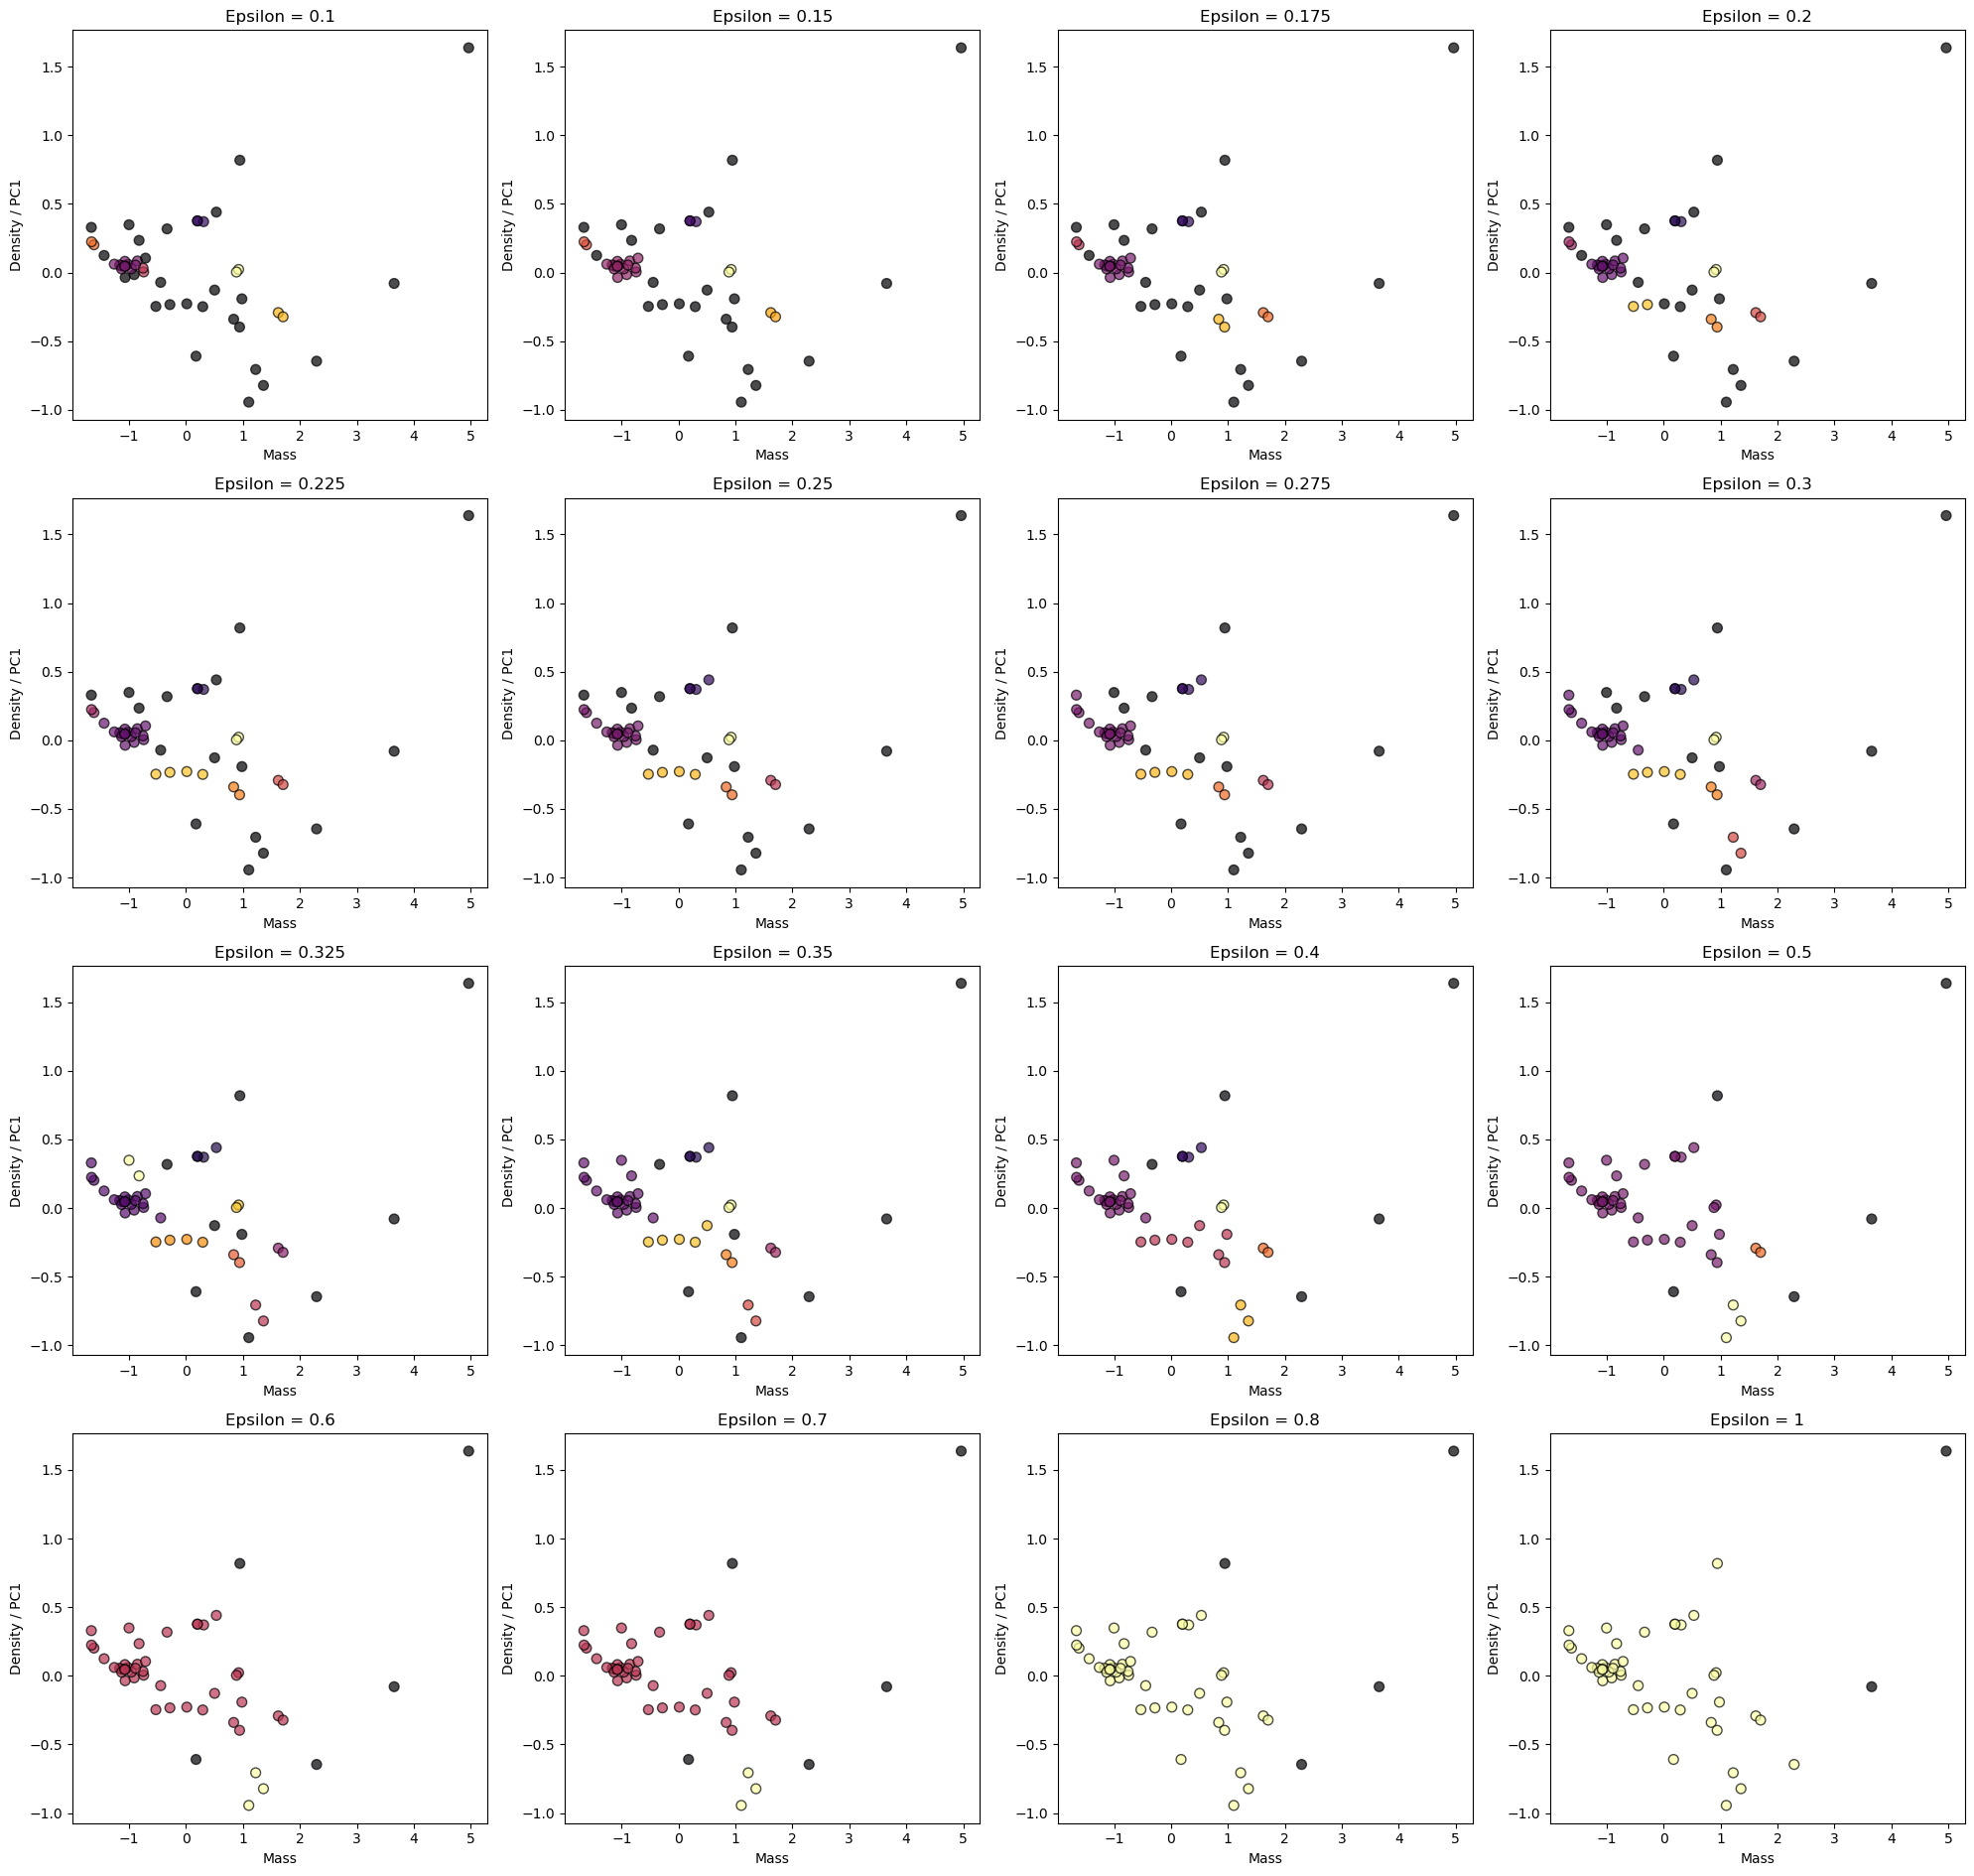

In [963]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


df = pd.DataFrame({'Mass': mass, 'Radius': radius})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)


PC1 = pca_result[:, 0]
PC2 = pca_result[:, 1]

isss = [0.1, 0.15,0.175,0.20,0.225,0.25,0.275,0.3,0.325,0.35, 0.4, 0.5,0.6,0.7,0.8,1]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
data = np.column_stack((PC1, PC2))
data_standardized = StandardScaler().fit_transform(data)

# Iterate through epsilon values and plot on each subplot
for i, eps in enumerate(isss):
    row = i // 4
    col = i % 4

    dbscan = DBSCAN(eps=eps, min_samples=2,metric = "euclidean")
    dbscan.fit(data_standardized)

    # Plot the clustered data and outliers
    axes[row, col].scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='inferno', edgecolors='k', s=50, alpha=0.7)
    axes[row, col].set_title(f'Epsilon = {eps}')
    axes[row, col].set_xlabel('Mass')
    axes[row, col].set_ylabel('Density / PC1')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
image_name = 'DBSCAN_grid2.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=800)

In [789]:
density_PCA_puffy = np.array(density_puffy)/PCA_density(mass_puffy)
#plt.plot(mass_puffy,density_PCA_puffy,".")

density_PCA_water = np.array(density_water)/PCA_density(mass_water)
#plt.plot(mass_water,density_PCA_water,".")

density_PCA_rocky = np.array(density_rocky)/PCA_density(mass_rocky)
#plt.plot(mass_rocky,density_PCA_rocky,".")

mass_PCA           = np.concatenate((mass_rocky, mass_water,mass_puffy))
density_PCA        = np.concatenate((density_PCA_rocky, density_PCA_water,density_PCA_puffy))
log10_mass_PCA     = np.concatenate((np.log10(mass_rocky), np.log10(mass_water),np.log10(mass_puffy)))
log10_density_PCA  = np.concatenate((np.log10(density_PCA_rocky), np.log10(density_PCA_water),np.log10(density_PCA_puffy)))

def make_histograms(mass,density,labels):
    outliers = []; pop0 = []; pop1 = []; pop2 = []; pop3 = []; pop4 = []; pop5 = [];
    for i in range(len(labels)):
        if labels[i] == -1:
            outliers.append(density[i])
        if labels[i] == 0:
            pop1.append(density[i])
        if labels[i] == 1:
            pop2.append(density[i])
        if labels[i] == 2:
            pop3.append(density[i])
        if labels[i] == 3:
            pop4.append(density[i])
        if labels[i] == 4:
            pop5.append(density[i])
    return outliers, pop1,pop2,pop3,pop4,pop5 

def colorlist(labels):
    color=["0.7",'blue', 'green',"red","purple","yellow"]
    colors = []
    for i in range(len(labels)):
        if labels[i] == -1:
            colors.append(color[0])
        if labels[i] == 0:
            colors.append(color[1])
        if labels[i] == 1:
            colors.append(color[2])
        if labels[i] == 2:
            colors.append(color[3])
        if labels[i] == 3:
            colors.append(color[4])
        if labels[i] == 4:
            colors.append(color[5])
    return colors

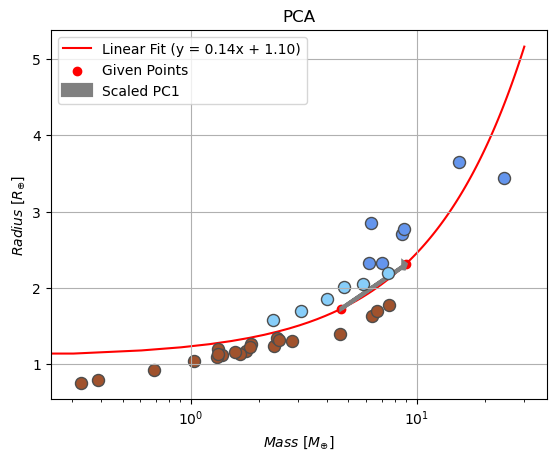

In [790]:
def linear_curve(x1, y1, x2, y2, num_points=100):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    x_values = np.linspace(0, 30, num_points)  # Updated to run from 0 to 30
    y_values = m * x_values + b
    return x_values, y_values

x1, y1 = mean_vector[0], mean_vector[1]
x2, y2 = scaled_PC1[0] + mean_vector[0], scaled_PC1[1] + mean_vector[1]

x_values, y_values = linear_curve(x1, y1, x2, y2)

coefficients = np.polyfit(x_values, y_values, 1)
slope, intercept = coefficients
fitted_y_values = slope * x_values + intercept

# Scatter plot with original data, linear fit, and additional points
plt.plot(x_values, fitted_y_values, color='red', label=f'Linear Fit (y = {slope:.2f}x + {intercept:.2f})',zorder = -32)
plt.scatter([x1, x2], [y1, y2], color='red', label='Given Points')
plt.arrow(mean_vector[0], mean_vector[1],scaled_PC1[0], scaled_PC1[1],length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC1')
plt.scatter(mass_LI[index_puffy], radius_LI[index_puffy], color="cornflowerblue", s=75, edgecolor="0.3")
plt.scatter(mass_LI[index_rocky], radius_LI[index_rocky], color="Sienna", s=75, edgecolor="0.3")
plt.scatter(mass_LI[index_water], radius_LI[index_water], color="lightskyblue", s=75, edgecolor="0.3")

plt.title('PCA')
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log")
plt.legend()
plt.grid(True)
image_name = 'PCA_LIV34.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

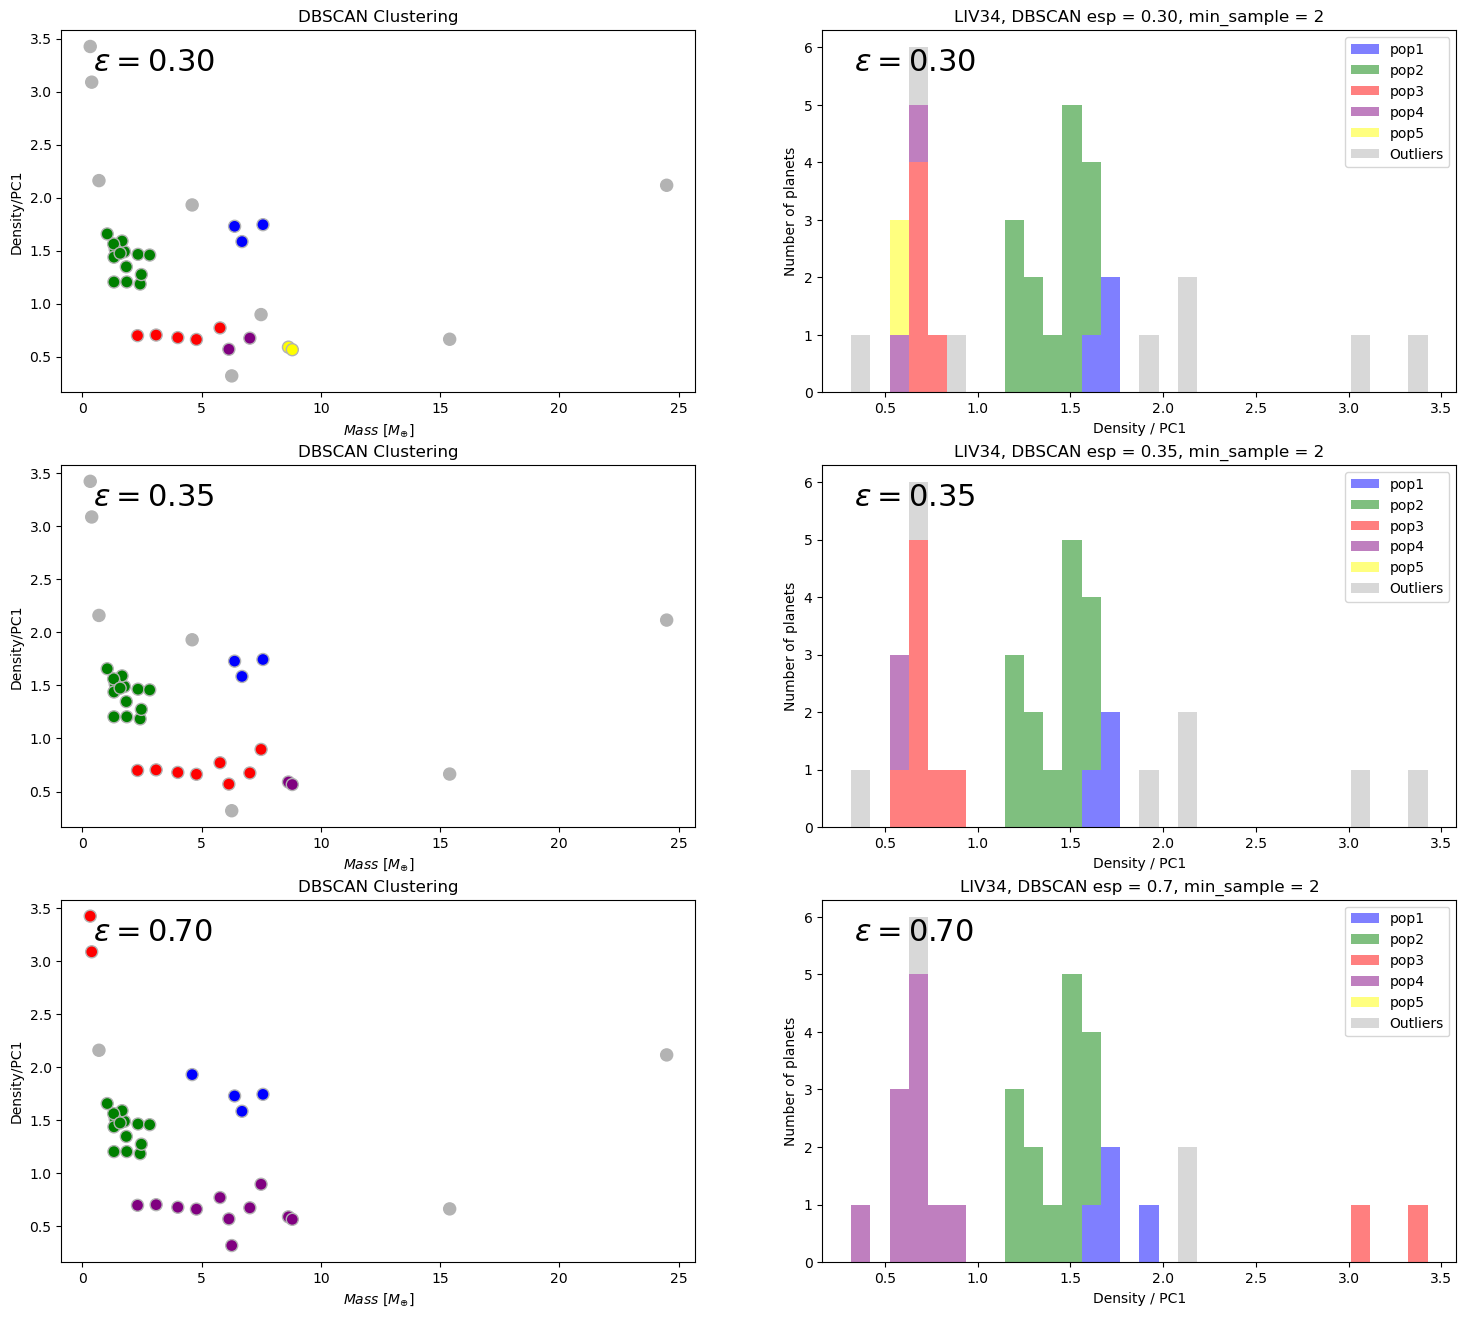

In [798]:
bins = 30
fig, ax = plt.subplots(figsize=(18,16))
for i, label in enumerate(("$\epsilon = 0.30$", "$\epsilon = 0.30$","$\epsilon = 0.35$","$\epsilon = 0.35$","$\epsilon = 0.70$","$\epsilon = 0.70$")):
    ax = fig.add_subplot(3,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=22, fontweight='bold', va='top')
mass_PCA           = np.concatenate((mass_rocky, mass_water,mass_puffy))
density_PCA        = np.concatenate((density_PCA_rocky, density_PCA_water,density_PCA_puffy))

plt.subplot(3, 2, 1)        
data = np.column_stack((mass_PCA, density_PCA))
data_standardized = StandardScaler().fit_transform(data)
dbscan = DBSCAN(eps=0.30, min_samples=2)
labels = dbscan.fit_predict(data_standardized)
colors = colorlist(labels) 
plt.scatter(mass_PCA, density_PCA, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('DBSCAN Clustering')
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('Density/PC1')

plt.subplot(3, 2, 2)
outliers, pop1,pop2,pop3,pop4,pop5 = make_histograms(mass_PCA, density_PCA, labels)
range_min = min(min(outliers),min(pop1), min(pop2), min(pop3), min(pop4))
range_max = max(max(outliers),max(pop1), max(pop2), max(pop3), max(pop4))
plt.hist([pop1,pop2,pop3,pop4,pop5,outliers], bins=bins, alpha = 0.5,label=['pop1','pop2','pop3','pop4','pop5','Outliers'], range=(range_min, range_max), color=['blue', 'green',"red","purple","yellow","0.7"], stacked=True)
plt.title('LIV34, DBSCAN esp = 0.30, min_sample = 2')
plt.xlabel('Density / PC1')
plt.ylabel('Number of planets')
plt.legend()


plt.subplot(3, 2, 3)        
data = np.column_stack((mass_PCA, density_PCA))
data_standardized = StandardScaler().fit_transform(data)
dbscan = DBSCAN(eps=0.35, min_samples=2)
labels = dbscan.fit_predict(data_standardized)
colors = colorlist(labels) 
plt.scatter(mass_PCA, density_PCA, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('DBSCAN Clustering')
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('Density/PC1')

plt.subplot(3, 2, 4)
outliers, pop1,pop2,pop3,pop4,pop5 = make_histograms(mass_PCA, density_PCA, labels)
plt.hist([pop1,pop2,pop3,pop4,pop5,outliers], bins=bins, alpha = 0.5,label=['pop1','pop2','pop3','pop4','pop5','Outliers'], range=(range_min, range_max), color=['blue', 'green',"red","purple","yellow","0.7"], stacked=True)
plt.title('LIV34, DBSCAN esp = 0.35, min_sample = 2')
plt.xlabel('Density / PC1')
plt.ylabel('Number of planets')
plt.legend()

plt.subplot(3, 2, 5)        
data = np.column_stack((mass_PCA, density_PCA))
data_standardized = StandardScaler().fit_transform(data)
dbscan = DBSCAN(eps=0.7, min_samples=2)
labels = dbscan.fit_predict(data_standardized)
colors = colorlist(labels) 
plt.scatter(mass_PCA, density_PCA, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('DBSCAN Clustering')
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel('Density/PC1')

plt.subplot(3, 2, 6)
outliers, pop1,pop2,pop3,pop4,pop5 = make_histograms(mass_PCA, density_PCA, labels)
plt.hist([pop1,pop2,pop3,pop4,pop5,outliers], bins=bins, alpha = 0.5,label=['pop1','pop2','pop3','pop4','pop5','Outliers'], range=(range_min, range_max), color=['blue', 'green',"red","purple","yellow","0.7"], stacked=True)
plt.title('LIV34, DBSCAN esp = 0.7, min_sample = 2')
plt.xlabel('Density / PC1')
plt.ylabel('Number of planets')
plt.legend()
image_name = 'DBSCAN_LIV34.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)

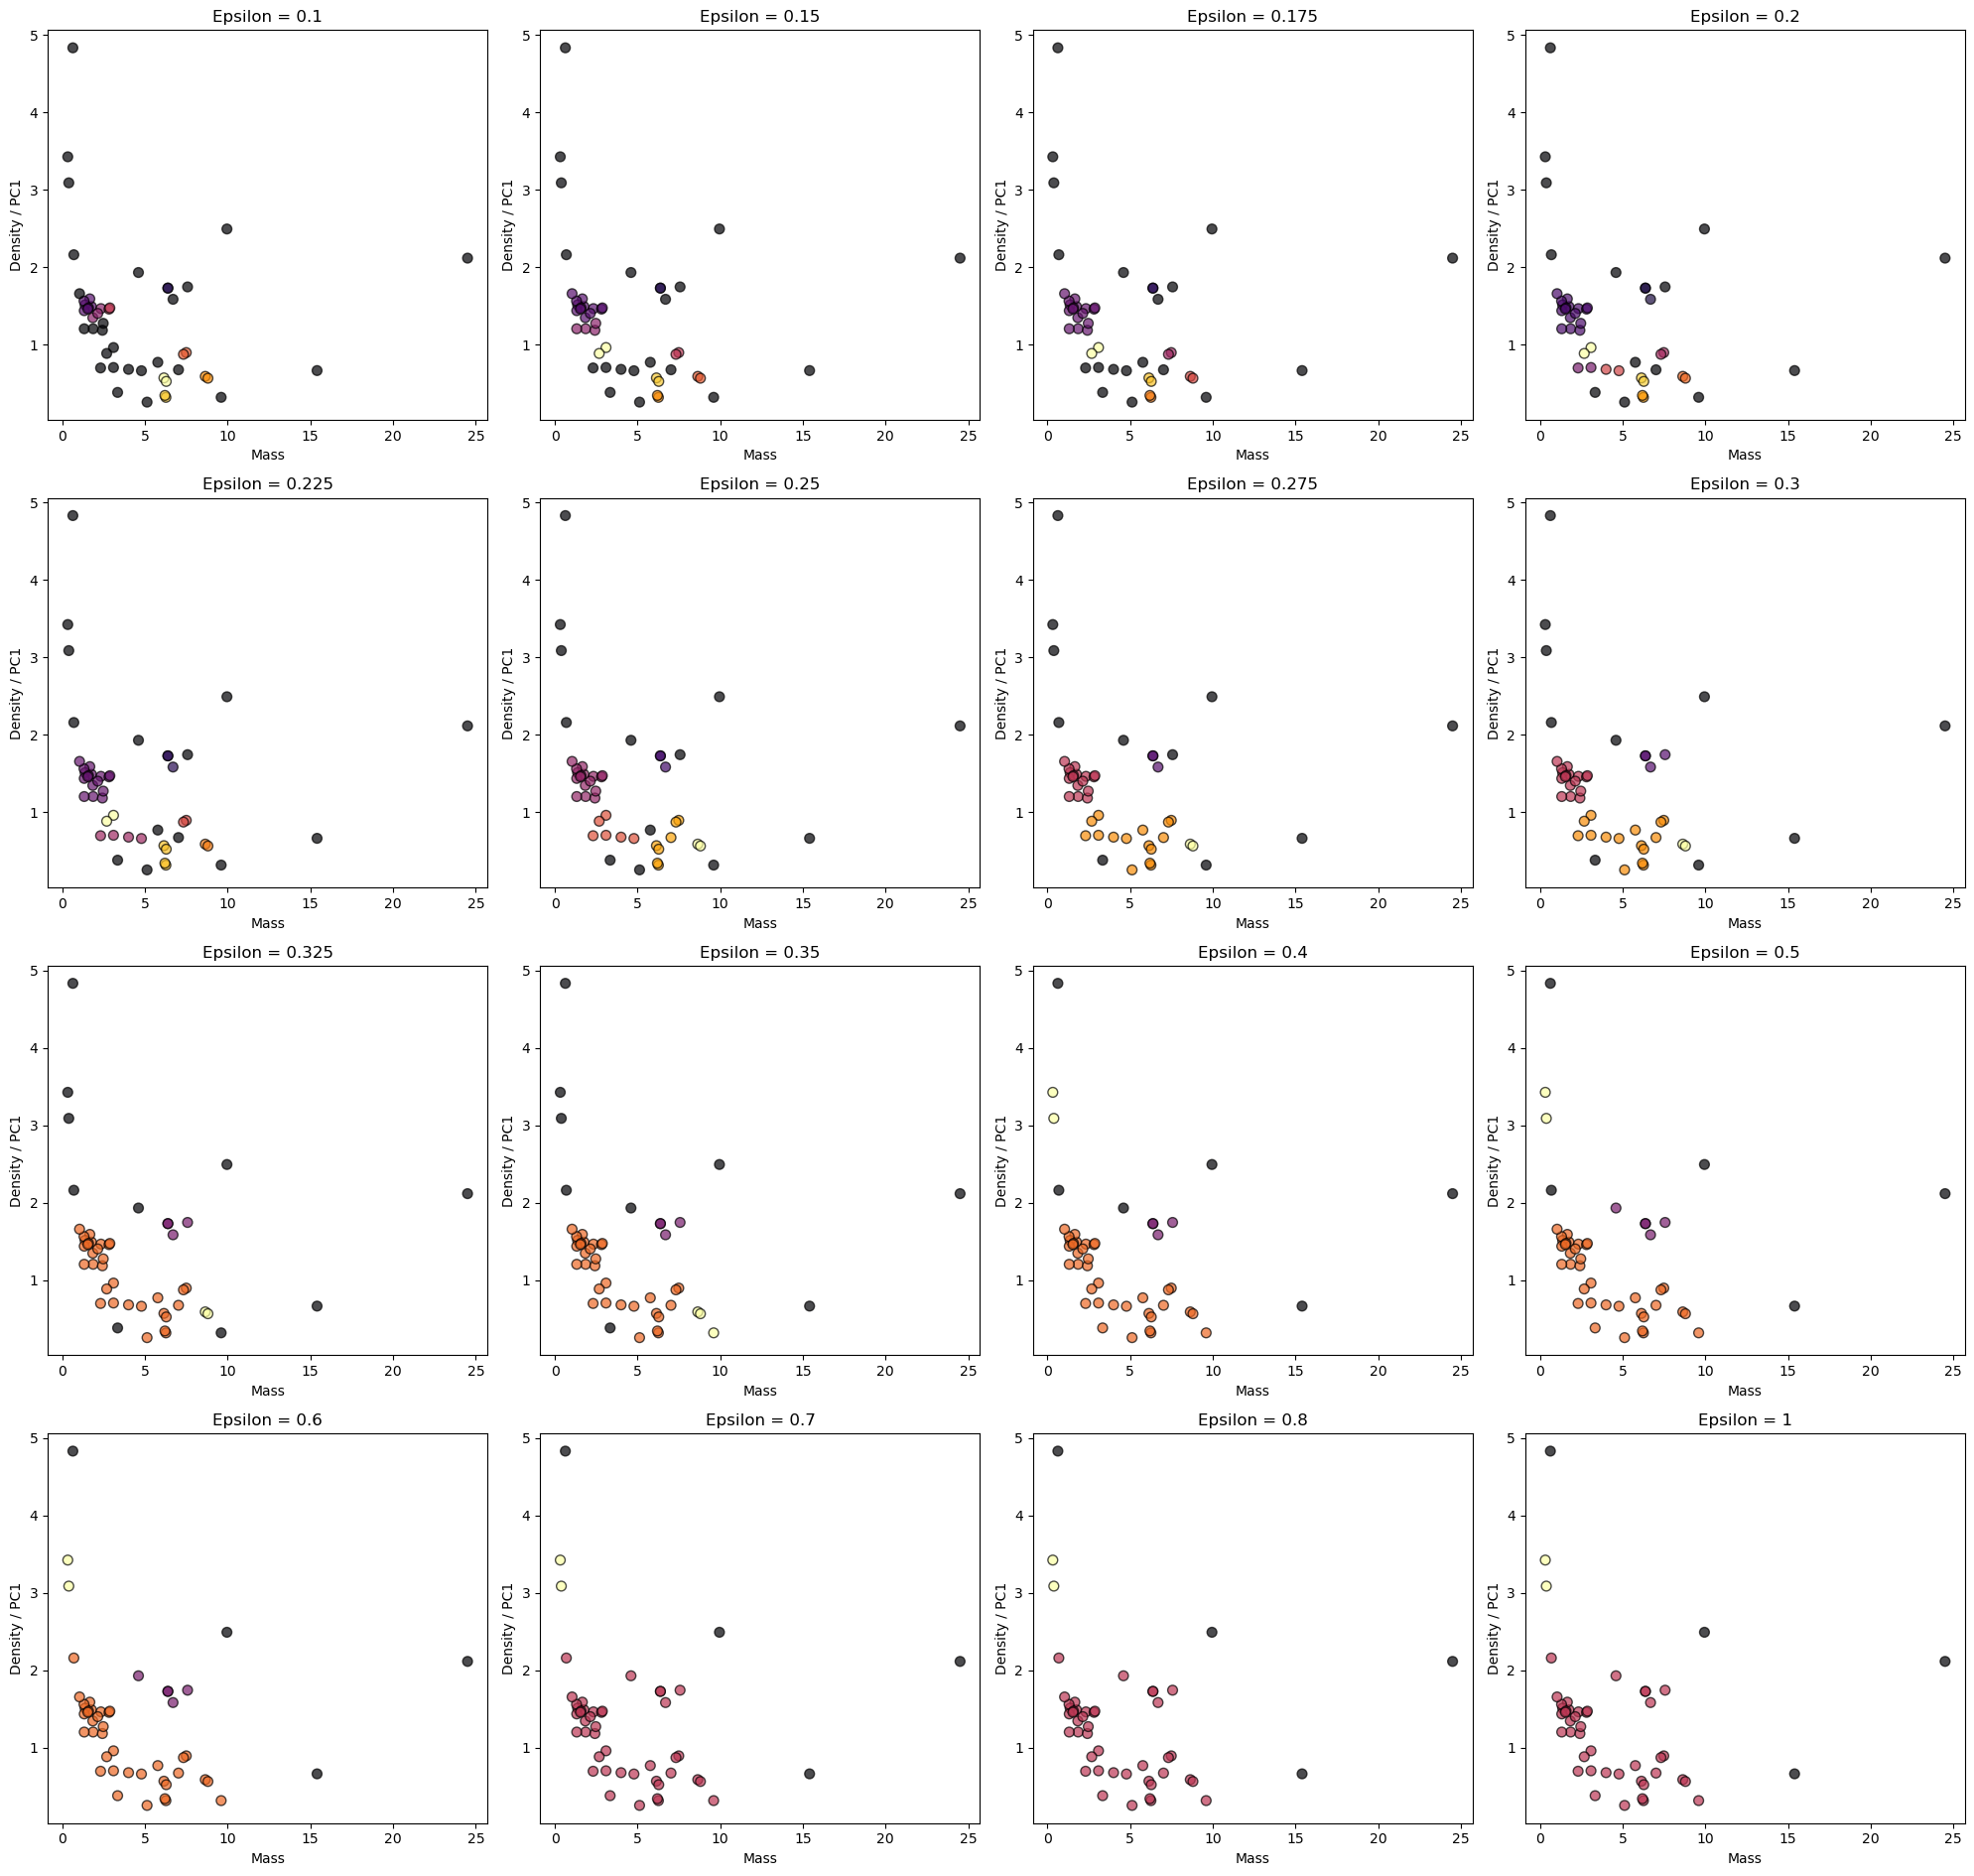

In [871]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

mass_PCA           = np.concatenate((mass_rocky, mass_water,mass_puffy,mass2))
density_PCA        = np.concatenate((density_PCA_rocky, density_PCA_water,density_PCA_puffy,density_PCA_new))

# Assuming you have masses and radii defined somewhere
data = np.transpose([mass_PCA, density_PCA])

# Define a list of epsilon values
isss = [0.1, 0.15,0.175,0.20,0.225,0.25,0.275,0.3,0.325,0.35, 0.4, 0.5,0.6,0.7,0.8,1]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
data = np.column_stack((mass_PCA, density_PCA))
data_standardized = StandardScaler().fit_transform(data)

# Iterate through epsilon values and plot on each subplot
for i, eps in enumerate(isss):
    row = i // 4
    col = i % 4

    dbscan = DBSCAN(eps=eps, min_samples=2,metric = "euclidean")
    dbscan.fit(data_standardized)

    # Plot the clustered data and outliers
    axes[row, col].scatter(data[:, 0], data[:, 1], c=dbscan.labels_, cmap='inferno', edgecolors='k', s=50, alpha=0.7)
    axes[row, col].set_title(f'Epsilon = {eps}')
    axes[row, col].set_xlabel('Mass')
    axes[row, col].set_ylabel('Density / PC1')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
image_name = 'DBSCAN_grid2.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=800)

AttributeError: 'int' object has no attribute 'savefig'

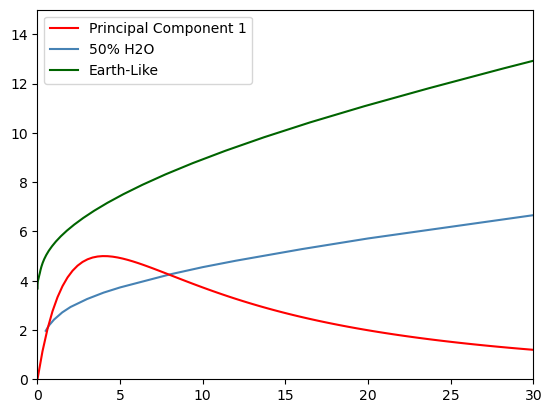

In [778]:
fig, ax = figsize=(18,5)
plt.plot(x_values,PCA_density_g_cm3,color = "red",label = "Principal Component 1")
plt.plot(H20_50_500K["Mass"], H20_50_500K_density_g_cm3, "-", color="steelblue", label="50% H2O", zorder=-32)
plt.plot(earth_like_rocky["Mass"], earth_like_rocky_density_g_cm3, "-", color="darkgreen", label="Earth-Like", zorder=-32)
plt.xlim(0,30)
plt.ylim(0,15)
plt.legend()
image_name = 'Models_compare.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)

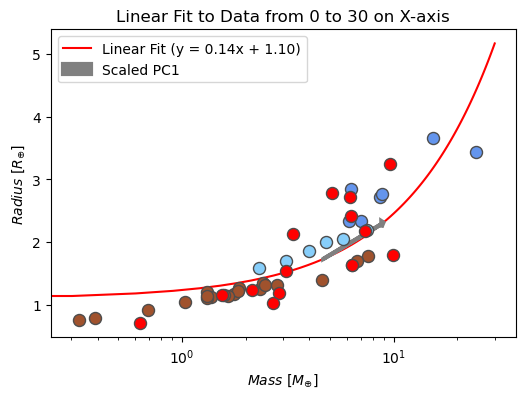

In [844]:
fig, ax = plt.subplots(figsize=(6,4))
mass = np.concatenate((mass2, mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
density = np.concatenate((density2, density_LI[index_rocky], density_LI[index_puffy], density_LI[index_water]))
radius = np.concatenate((radius2, radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water]))

data = np.column_stack((mass, radius))
mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
top_k_eigenvectors = eigenvectors[:, :k]
scaled_PC1 = np.sqrt(eigenvalues[0]) * PC1
scaled_PC2 = np.sqrt(eigenvalues[1]) * PC2   

def linear_curve(x1, y1, x2, y2, num_points=100):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    x_values = np.linspace(0, 30, num_points)  # Updated to run from 0 to 30
    y_values = m * x_values + b
    return x_values, y_values

x1, y1 = mean_vector[0], mean_vector[1]
x2, y2 = scaled_PC1[0] + mean_vector[0], scaled_PC1[1] + mean_vector[1]

x_values, y_values = linear_curve(x1, y1, x2, y2)

coefficients = np.polyfit(x_values, y_values, 1)
slope, intercept = coefficients
fitted_y_values = slope * x_values + intercept

# Scatter plot with original data, linear fit, and additional points
plt.plot(x_values, fitted_y_values, color='red', label=f'Linear Fit (y = {slope:.2f}x + {intercept:.2f})',zorder = -32)
plt.arrow(mean_vector[0], mean_vector[1],scaled_PC1[0], scaled_PC1[1],length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC1')
plt.scatter(mass_LI[index_puffy], radius_LI[index_puffy], color="cornflowerblue", s=75, edgecolor="0.3")
plt.scatter(mass_LI[index_rocky], radius_LI[index_rocky], color="Sienna", s=75, edgecolor="0.3")
plt.scatter(mass_LI[index_water], radius_LI[index_water], color="lightskyblue", s=75, edgecolor="0.3")
plt.scatter(mass2,radius2,color = "red",s = 75, edgecolor = "0.3")

plt.title('Linear Fit to Data from 0 to 30 on X-axis')
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log")
plt.legend()
image_name = 'PCA_Newdata.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)

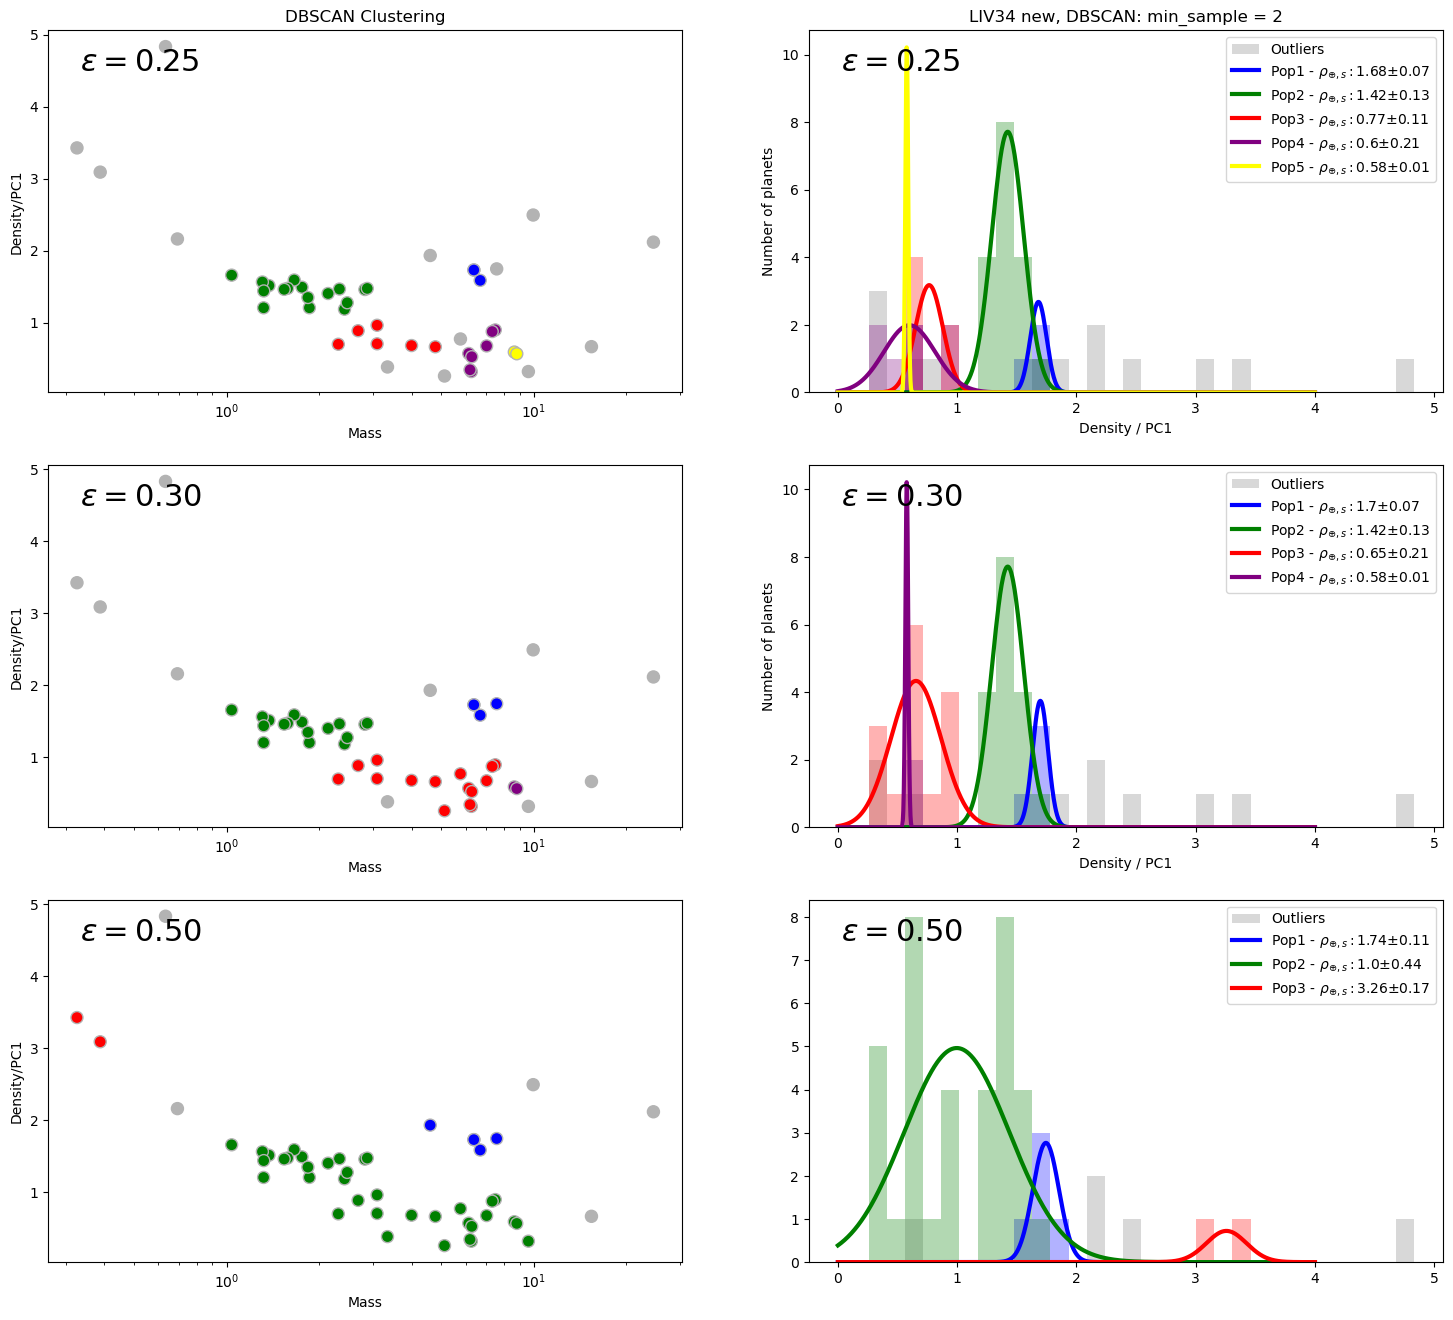

In [845]:
density_PCA_puffy = np.array(density_puffy)/PCA_density(mass_puffy)
density_PCA_water = np.array(density_water)/PCA_density(mass_water)
density_PCA_rocky = np.array(density_rocky)/PCA_density(mass_rocky)
density_PCA_new   = np.array(density2)/PCA_density(mass2)

mass_PCA           = np.concatenate((mass_rocky, mass_water,mass_puffy,mass2))
density_PCA        = np.concatenate((density_PCA_rocky, density_PCA_water,density_PCA_puffy,density_PCA_new))

bins = 30
pbins = np.linspace(0, 3, 1000)
hbins  = np.linspace(0, 4, 1000)
fig, ax = plt.subplots(figsize=(18,16))
for i, label in enumerate(("$\epsilon = 0.25$", "$\epsilon = 0.25$","$\epsilon = 0.30$","$\epsilon = 0.30$","$\epsilon = 0.50$","$\epsilon = 0.50$")):
    ax = fig.add_subplot(3,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=22, fontweight='bold', va='top')

plt.subplot(3, 2, 1)        
data = np.column_stack((mass_PCA, density_PCA))
data_standardized = StandardScaler().fit_transform(data)
dbscan = DBSCAN(eps=0.25, min_samples=2)
labels = dbscan.fit_predict(data_standardized)
colors = colorlist(labels) 
plt.scatter(mass_PCA, density_PCA, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('DBSCAN Clustering')
plt.xlabel("Mass")
plt.ylabel('Density/PC1')
plt.xscale("log")

plt.subplot(3, 2, 2)
outliers, pop1,pop2,pop3,pop4,pop5 = make_histograms(mass_PCA, density_PCA, labels)
range_min = min(min(outliers),min(pop1), min(pop2), min(pop3), min(pop4))
range_max = max(max(outliers),max(pop1), max(pop2), max(pop3), max(pop4))
plt.hist(outliers, bins=bins, alpha = 0.5,label=['Outliers'], range=(range_min, range_max), color=["0.7"], stacked=True)
hist_values_false, bin_edges, _ = plt.hist(pop1, bins=bins,range=(range_min, range_max), color='Blue', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop1)
sigma = np.sqrt(np.cov(pop1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Blue",linewidth=3,label ="Pop1 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop2, bins=bins,range=(range_min, range_max), color='Green', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop2)
sigma = np.sqrt(np.cov(pop2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Green",linewidth=3,label ="Pop2 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop3, bins=bins,range=(range_min, range_max), color='Red', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop3)
sigma = np.sqrt(np.cov(pop3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Red",linewidth=3,label ="Pop3 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop4, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop4)
sigma = np.sqrt(np.cov(pop4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Purple",linewidth=3,label ="Pop4 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop5, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop5)
sigma = np.sqrt(np.cov(pop5, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars

plt.plot(hbins, best_fit_line,color = "Yellow",linewidth=3,label ="Pop5 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))
plt.title('LIV34 new, DBSCAN: min_sample = 2')
plt.xlabel('Density / PC1')
plt.ylabel('Number of planets')
plt.legend()

plt.subplot(3, 2, 3)        
data = np.column_stack((mass_PCA, density_PCA))
data_standardized = StandardScaler().fit_transform(data)
dbscan = DBSCAN(eps=0.30, min_samples=2)
labels = dbscan.fit_predict(data_standardized)
colors = colorlist(labels) 
plt.scatter(mass_PCA, density_PCA, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.xlabel("Mass")
plt.ylabel('Density/PC1')
plt.xscale("log")
plt.subplot(3, 2, 4)
outliers, pop1,pop2,pop3,pop4,pop5 = make_histograms(mass_PCA, density_PCA, labels)
range_min = min(min(outliers),min(pop1), min(pop2), min(pop3))
range_max = max(max(outliers),max(pop1), max(pop2), max(pop3))
plt.hist(outliers, bins=bins, alpha = 0.5,label=['Outliers'], range=(range_min, range_max), color=["0.7"], stacked=True)
hist_values_false, bin_edges, _ = plt.hist(pop1, bins=bins,range=(range_min, range_max), color='Blue', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop1)
sigma = np.sqrt(np.cov(pop1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Blue",linewidth=3,label ="Pop1 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop2, bins=bins,range=(range_min, range_max), color='Green', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop2)
sigma = np.sqrt(np.cov(pop2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Green",linewidth=3,label ="Pop2 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop3, bins=bins,range=(range_min, range_max), color='Red', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop3)
sigma = np.sqrt(np.cov(pop3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Red",linewidth=3,label ="Pop3 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop4, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop4)
sigma = np.sqrt(np.cov(pop4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Purple",linewidth=3,label ="Pop4 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

plt.xlabel('Density / PC1')
plt.ylabel('Number of planets')
plt.legend()

plt.subplot(3, 2, 5)        
data = np.column_stack((mass_PCA, density_PCA))
data_standardized = StandardScaler().fit_transform(data)
dbscan = DBSCAN(eps=0.5, min_samples=2)
labels = dbscan.fit_predict(data_standardized)
colors = colorlist(labels) 
plt.scatter(mass_PCA, density_PCA, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.xlabel("Mass")
plt.ylabel('Density/PC1')
plt.xscale("log")

plt.subplot(3, 2, 6)
outliers, pop1,pop2,pop3,pop4,pop5 = make_histograms(mass_PCA, density_PCA, labels)
plt.hist(outliers, bins=bins, alpha = 0.5,label=['Outliers'], range=(range_min, range_max), color=["0.7"], stacked=True)
hist_values_false, bin_edges, _ = plt.hist(pop1, bins=bins,range=(range_min, range_max), color='Blue', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop1)
sigma = np.sqrt(np.cov(pop1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Blue",linewidth=3,label ="Pop1 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop2, bins=bins,range=(range_min, range_max), color='Green', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop2)
sigma = np.sqrt(np.cov(pop2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Green",linewidth=3,label ="Pop2 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop3, bins=bins,range=(range_min, range_max), color='Red', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop3)
sigma = np.sqrt(np.cov(pop3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Red",linewidth=3,label ="Pop3 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

plt.legend()
image_name = 'DBSCAN_Newdata.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

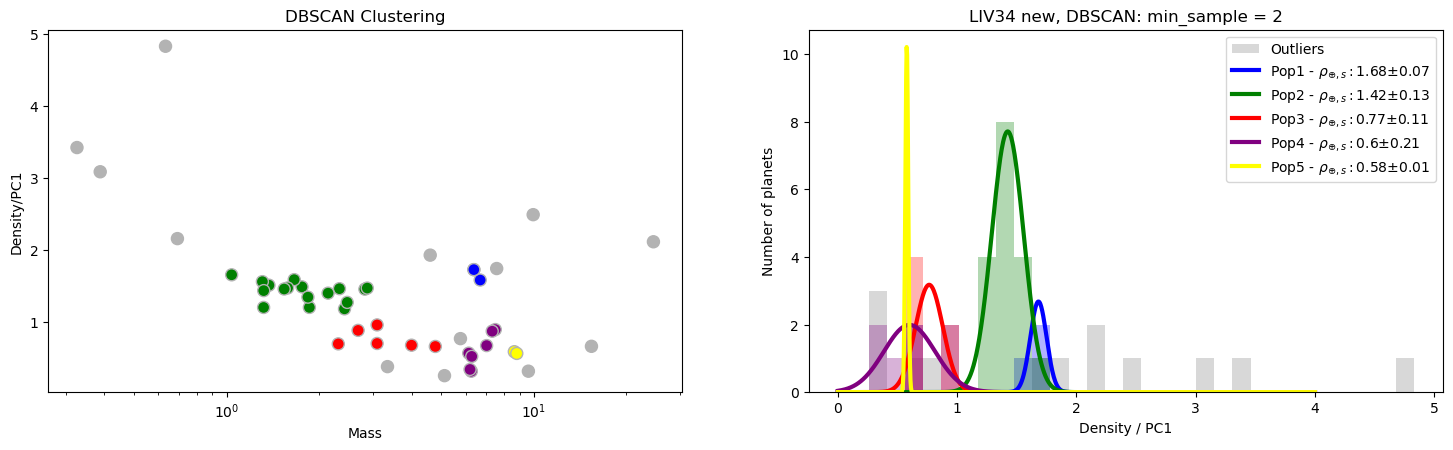

In [837]:
fig, ax = plt.subplots(figsize=(18,16))
plt.subplot(3, 2, 1)        
data = np.column_stack((mass_PCA, density_PCA))
data_standardized = StandardScaler().fit_transform(data)
dbscan = DBSCAN(eps=0.25, min_samples=2,metric = "euclidean")
labels = dbscan.fit_predict(data_standardized)
colors = colorlist(labels) 
plt.scatter(mass_PCA, density_PCA, c=colors, cmap='viridis', s=75,edgecolor = "0.7")
plt.title('DBSCAN Clustering')
plt.xlabel("Mass")
plt.ylabel('Density/PC1')
plt.xscale("log")

plt.subplot(3, 2, 2)
outliers, pop1,pop2,pop3,pop4,pop5 = make_histograms(mass_PCA, density_PCA, labels)
range_min = min(min(outliers),min(pop1), min(pop2), min(pop3), min(pop4))
range_max = max(max(outliers),max(pop1), max(pop2), max(pop3), max(pop4))
plt.hist(outliers, bins=bins, alpha = 0.5,label=['Outliers'], range=(range_min, range_max), color=["0.7"], stacked=True)
hist_values_false, bin_edges, _ = plt.hist(pop1, bins=bins,range=(range_min, range_max), color='Blue', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop1)
sigma = np.sqrt(np.cov(pop1, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Blue",linewidth=3,label ="Pop1 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop2, bins=bins,range=(range_min, range_max), color='Green', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop2)
sigma = np.sqrt(np.cov(pop2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Green",linewidth=3,label ="Pop2 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop3, bins=bins,range=(range_min, range_max), color='Red', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop3)
sigma = np.sqrt(np.cov(pop3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Red",linewidth=3,label ="Pop3 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop4, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop4)
sigma = np.sqrt(np.cov(pop4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars
plt.plot(hbins, best_fit_line,color = "Purple",linewidth=3,label ="Pop4 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

hist_values_false, bin_edges, _ = plt.hist(pop5, bins=bins,range=(range_min, range_max), color='Purple', alpha=0.3, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(pop5)
sigma = np.sqrt(np.cov(pop5, ddof=0))
best_fit_line = scipy.stats.norm.pdf(hbins, mu, sigma)*area_under_bars

plt.plot(hbins, best_fit_line,color = "Yellow",linewidth=3,label ="Pop5 - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))
plt.title('LIV34 new, DBSCAN: min_sample = 2')
plt.xlabel('Density / PC1')
plt.ylabel('Number of planets')
plt.legend()



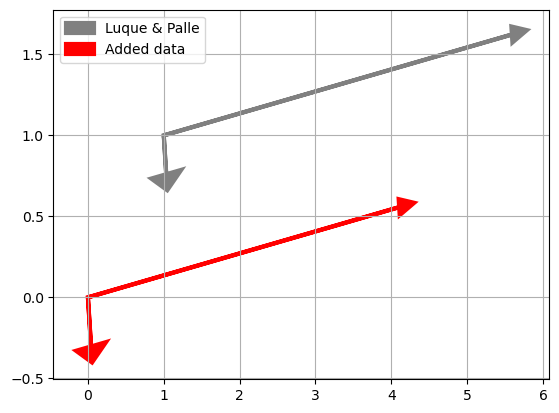

In [762]:
mass = np.concatenate((mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
radius = np.concatenate((radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water]))
data = np.column_stack((mass, radius))
mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
top_k_eigenvectors = eigenvectors[:, :k]
scaled_PC1 = np.sqrt(eigenvalues[0]) * PC1
scaled_PC2 = np.sqrt(eigenvalues[1]) * PC2   
plt.arrow(1, 1,scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Luque & Palle')
plt.arrow(1, 1,scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.4, head_length=0.1, fc='0.5', ec='0.5')

mass = np.concatenate((mass2, mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
radius = np.concatenate((radius2, radius_LI[index_rocky], radius_LI[index_puffy], radius_LI[index_water]))

data = np.column_stack((mass, radius))
mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
top_k_eigenvectors = eigenvectors[:, :k]
scaled_PC1 = np.sqrt(eigenvalues[0]) * PC1
scaled_PC2 = np.sqrt(eigenvalues[1]) * PC2  
plt.arrow(0, 0,scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc="red", ec="red", label='Added data')
plt.arrow(0, 0,scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.4, head_length=0.1, fc="red", ec="red")
plt.legend()
plt.grid()
image_name = 'vectors_PCA.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

In [ ]:
mass_err_LI = np.array([mass_unc_low_LI, mass_unc_up_LI])
density_err_LI = [density_unc_low_LI / rocky_density(mass_LI), density_unc_up_LI / rocky_density(mass_LI)]
density_norm = density_LI / rocky_density(mass_LI)
index = []; index_rocky = []; index_water = []; index_puffy = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4:
        index.append(i) 
xerr = [mass_err_LI[0][index], mass_err_LI[1][index]]
yerr = [density_err_LI[0][index], density_err_LI[1][index]]
plt.errorbar(mass_LI[index], density_norm[index], xerr=xerr, yerr=yerr, fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)


In [886]:
density_norm = density_LI / earth_density

mass_err_LI = np.array([mass_unc_low_LI, mass_unc_up_LI])
density_err_LI = [density_unc_low_LI / rocky_density(mass_LI), density_unc_up_LI / rocky_density(mass_LI)]
density_norm = density_LI / rocky_density(mass_LI)
  
index = []
mass_rocky = []; mass_water = []; mass_puffy = [];
radius_rocky = []; radius_water = []; radius_puffy = [];
density_rocky = []; density_water = []; density_puffy = [];
mass_low_rocky =[]; mass_low_water = []; mass_low_puffy = []
mass_up_rocky =[]; mass_up_water = []; mass_up_puffy = []
density_low_rocky =[]; density_low_water = []; density_low_puffy = []
density_up_rocky =[]; density_up_water = []; density_up_puffy = []

planet_rocky = []; planet_water = []; planet_puffy = []
index_puffy = []; index_water = []; index_rocky = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
            mass_rocky.append(mass_LI[i])
            mass_low_rocky.append(mass_unc_low_LI[i])
            mass_up_rocky.append(mass_unc_up_LI[i])            
            radius_rocky.append(radius_LI[i])
            density_rocky.append(density_LI[i])
            density_low_rocky.append(density_unc_low_LI[i])
            density_up_rocky.append(density_unc_up_LI[i])
            planet_rocky.append(planet_name_LI[i])
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i]))  and planet_name_LI[i] != 'K2-146 c':
            index_puffy.append(i)
            mass_puffy.append(mass_LI[i])
            mass_low_puffy.append(mass_unc_low_LI[i])
            mass_up_puffy.append(mass_unc_up_LI[i])            
            radius_puffy.append(radius_LI[i])
            density_puffy.append(density_LI[i])
            density_low_puffy.append(density_unc_low_LI[i])
            density_up_puffy.append(density_unc_up_LI[i])
            planet_puffy.append(planet_name_LI[i])
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) or planet_name_LI[i] == 'K2-146 c':
            index_water.append(i)
            mass_water.append(mass_LI[i])
            mass_low_water.append(mass_unc_low_LI[i])
            mass_up_water.append(mass_unc_up_LI[i])            
            radius_water.append(radius_LI[i])
            density_water.append(density_LI[i])
            density_low_water.append(density_unc_low_LI[i])
            density_up_water.append(density_unc_up_LI[i])
            planet_water.append(planet_name_LI[i])


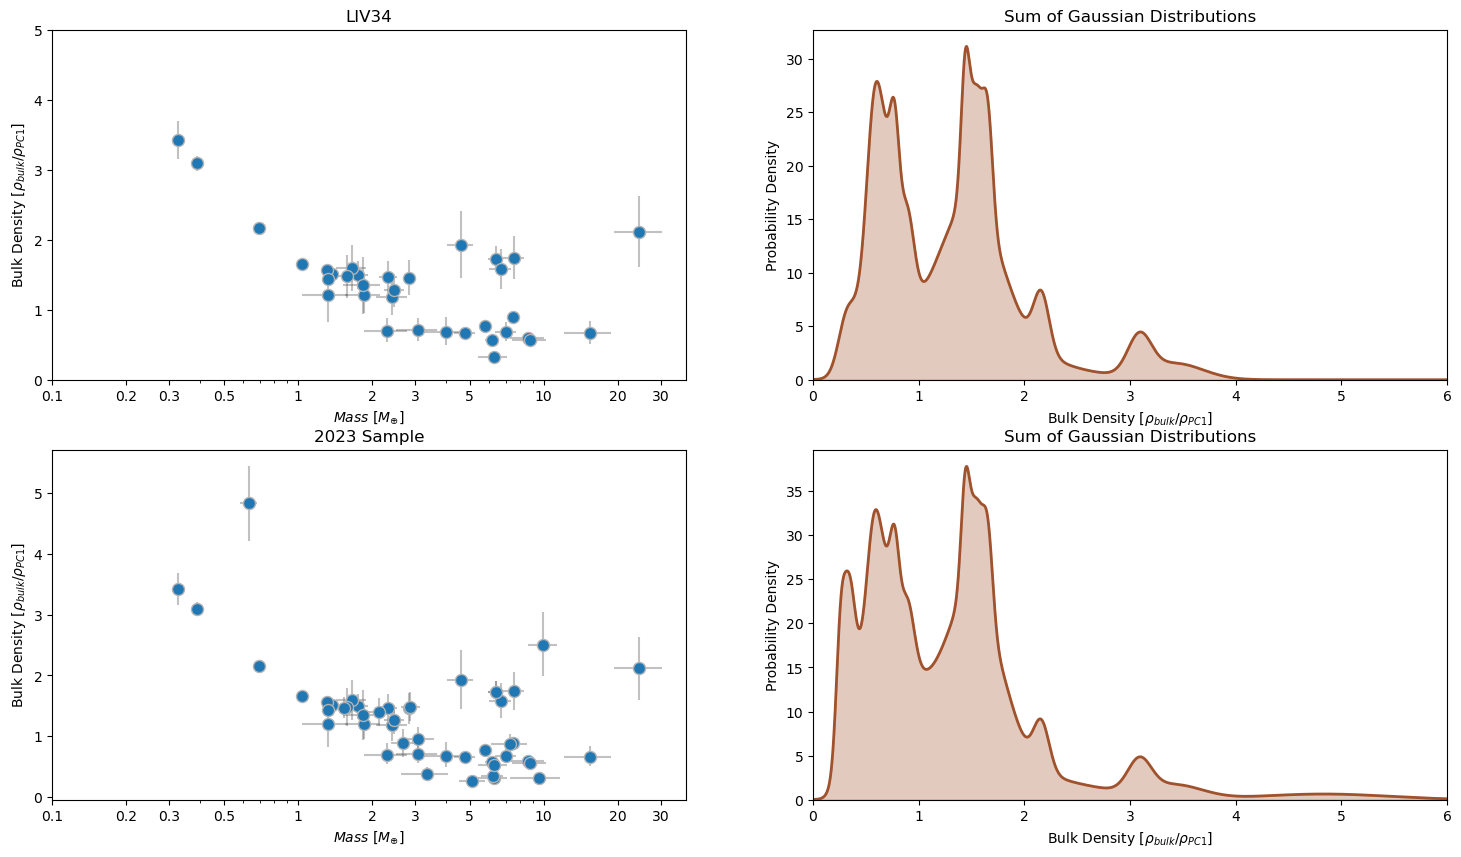

In [1283]:
density_PCA_puffy = np.array(density_puffy)/PCA_density(mass_puffy)
density_PCA_water = np.array(density_water)/PCA_density(mass_water)
density_PCA_rocky = np.array(density_rocky)/PCA_density(mass_rocky)
density_PCA_new   = np.array(density2)/PCA_density(mass2)


mass_PCA_puffy_up  = np.array(mass_up_puffy) 
mass_PCA_puffy_low = np.array(mass_low_puffy)
mass_PCA_water_up  = np.array(mass_up_water) 
mass_PCA_water_low = np.array(mass_low_water)
mass_PCA_rocky_up  = np.array(mass_up_rocky)
mass_PCA_rocky_low = np.array(mass_low_rocky)
mass_PCA_new_up    = np.array(mass_up2)
mass_PCA_new_low   = np.array(mass_low2)


density_PCA_puffy_up  = np.array(density_up_puffy) /PCA_density(mass_puffy)
density_PCA_puffy_low = np.array(density_low_puffy)/PCA_density(mass_puffy)
density_PCA_water_up  = np.array(density_up_water) /PCA_density(mass_water)
density_PCA_water_low = np.array(density_low_water)/PCA_density(mass_water)
density_PCA_rocky_up  = np.array(density_up_rocky) /PCA_density(mass_rocky)
density_PCA_rocky_low = np.array(density_low_rocky)/PCA_density(mass_rocky)
density_PCA_new_up    = np.array(density_up2)/PCA_density(mass2)
density_PCA_new_low   = np.array(density_low2)/PCA_density(mass2)


mass_PCA              = np.concatenate((mass_rocky, mass_water,mass_puffy))
density_PCA           = np.concatenate((density_PCA_rocky, density_PCA_water,density_PCA_puffy))
mass_PCA_err_up       = np.concatenate((mass_PCA_rocky_up, mass_PCA_water_up,mass_PCA_puffy_up))
mass_PCA_err_low      = np.concatenate((mass_PCA_rocky_low, mass_PCA_water_low,mass_PCA_puffy_low))
density_PCA_err_up    = np.concatenate((density_PCA_rocky_up, density_PCA_water_up,density_PCA_puffy_up))
density_PCA_err_low   = np.concatenate((density_PCA_rocky_up, density_PCA_water_low,density_PCA_puffy_low))
xerr                  = [np.abs(mass_PCA_err_low),mass_PCA_err_up]
yerr                  = [np.abs(density_PCA_err_low),density_PCA_err_up]

fig, ax = plt.subplots(figsize=(18,10))
plt.subplot(2, 2, 1)  
plt.errorbar(mass_PCA, density_PCA, xerr=xerr, yerr=yerr, fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)
plt.scatter(mass_PCA,density_PCA,s=75,edgecolor = "0.7")
plt.ylabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.xscale("log")
plt.title("LIV34")
plt.ylim(0,5)

plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.subplot(2, 2, 2)  
x = np.linspace(0, 6, 100000)
y_total = 0
for i in range(0,len(density_PCA)):
    mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"Sienna",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, linestyle='-', linewidth=2,color= "Sienna")
plt.fill_between(x, 0, y_total, color="Sienna", alpha=0.3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=False)
plt.title('Sum of Gaussian Distributions')
plt.xlabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.ylabel('Probability Density')
plt.xlim(0,6)


mass_PCA              = np.concatenate((mass_rocky, mass_water,mass_puffy,mass2))
density_PCA           = np.concatenate((density_PCA_rocky, density_PCA_water,density_PCA_puffy,density_PCA_new))
mass_PCA_err_up       = np.concatenate((mass_PCA_rocky_up, mass_PCA_water_up,mass_PCA_puffy_up,mass_PCA_new_up))
mass_PCA_err_low      = np.concatenate((mass_PCA_rocky_low, mass_PCA_water_low,mass_PCA_puffy_low,mass_PCA_new_low))
density_PCA_err_up    = np.concatenate((density_PCA_rocky_up, density_PCA_water_up,density_PCA_puffy_up,density_PCA_new_up))
density_PCA_err_low   = np.concatenate((density_PCA_rocky_up, density_PCA_water_low,density_PCA_puffy_low,density_PCA_new_low))
xerr                  = [np.abs(mass_PCA_err_low),mass_PCA_err_up]
yerr                  = [np.abs(density_PCA_err_low),density_PCA_err_up]

plt.subplot(2, 2, 3)  
plt.errorbar(mass_PCA, density_PCA, xerr=xerr, yerr=yerr, fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)
plt.scatter(mass_PCA,density_PCA,s=75,edgecolor = "0.7")
plt.ylabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.xscale("log")
plt.title("2023 Sample")

plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.subplot(2, 2, 4)  
plt.xlim(0,6)
y_total = 0
for i in range(0,len(density_PCA)):
    mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"Sienna",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, linestyle='-', linewidth=2,color= "Sienna")
plt.fill_between(x, 0, y_total, color="Sienna", alpha=0.3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=False)
plt.title('Sum of Gaussian Distributions')
plt.xlabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.ylabel('Probability Density')
image_name = 'PCA_hist.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=300)

Text(0, 0.5, 'Probability Density')

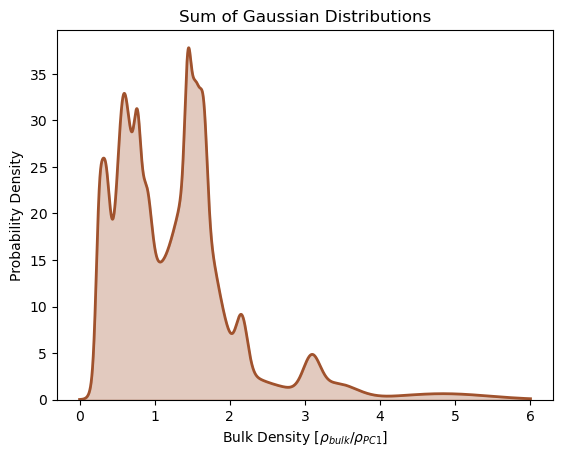

In [928]:
x = np.linspace(0, 6, 100000)
y_total = 0
for i in range(0,len(density_PCA)):
    mu, sigma = density_PCA[i], (density_PCA_err_up[i]+ abs(density_PCA_err_low[i]))/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"Sienna",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, linestyle='-', linewidth=2,color= "Sienna")
plt.fill_between(x, 0, y_total, color="Sienna", alpha=0.3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=False)
plt.title('Sum of Gaussian Distributions')
plt.xlabel("Bulk Density $[ρ_{bulk}/ρ_{PC1}]$")
plt.ylabel('Probability Density')
image_name = 'PC2_hist.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=300)

In [926]:
density_PCA_err_low

array([ 0.18072424,  0.19890508,  0.22624769,  0.30578113,  0.25628903,
        0.26694267,  0.4091325 ,  0.28426796,  0.32823735,  0.23294291,
        0.25004084,  0.38242716,  0.07391741,  0.06369383,  0.11068922,
        0.0743107 ,  0.04567731,  0.03879651,  0.26600284,  0.48278656,
        0.31054353,  0.15144575,  0.1608074 ,  0.04389465,  0.06178115,
        0.1800045 ,  0.09087907,  0.12024673,  0.09826816,  0.07057217,
        0.06378102,  0.51317014,  0.10424328,  0.16038867, -0.0758172 ,
       -0.09105647, -0.61600775, -0.22629241, -0.16372514, -0.0387422 ,
       -0.04690927, -0.17211832, -0.22832689, -0.15733244, -0.49492833,
       -0.08990844, -0.15404949, -0.23199613])

In [924]:
density_PCA

array([1.72978915, 1.49056029, 1.46511855, 1.74502165, 1.20479796,
       1.18496502, 1.34773059, 1.58534057, 1.59068868, 1.27471539,
       1.45857157, 1.20436015, 1.51321497, 1.56279421, 3.0893644 ,
       2.16076042, 1.65795396, 1.43832356, 3.42581924, 1.93114624,
       1.47508179, 0.7040181 , 0.69830063, 0.77129165, 0.89697076,
       0.680017  , 0.66240746, 0.67471777, 0.58960894, 0.31864403,
       0.56977713, 2.11682681, 0.56589208, 0.66446737, 0.3189551 ,
       0.38243716, 4.83329156, 1.40301294, 0.96188519, 0.25692197,
       0.3432906 , 1.72978915, 1.47374627, 1.4605695 , 2.49336867,
       0.52446589, 0.87445737, 0.88580341])

In [902]:
density_rocky[i]/earth_density

1.0373025147961041

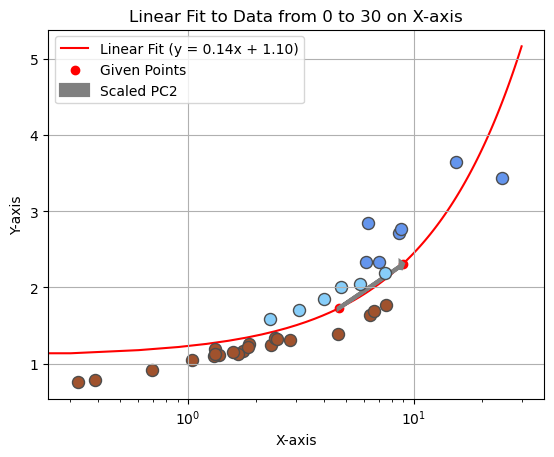

In [714]:
x1, y1 = mean_vector[0], mean_vector[1]
x2, y2 = scaled_PC1[0] + mean_vector[0], scaled_PC1[1] + mean_vector[1]

x_values, y_values = linear_curve(x1, y1, x2, y2)

coefficients = np.polyfit(x_values, y_values, 1)
slope, intercept = coefficients
fitted_y_values = slope * x_values + intercept

# Scatter plot with original data, linear fit, and additional points
plt.plot(x_values, fitted_y_values, color='red', label=f'Linear Fit (y = {slope:.2f}x + {intercept:.2f})',zorder = -32)
plt.scatter([x1, x2], [y1, y2], color='red', label='Given Points')
plt.arrow(mean_vector[0], mean_vector[1],scaled_PC1[0], scaled_PC1[1],length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC2')
plt.scatter(mass_LI[index_puffy], radius_LI[index_puffy], color="cornflowerblue", s=75, edgecolor="0.3")
plt.scatter(mass_LI[index_rocky], radius_LI[index_rocky], color="Sienna", s=75, edgecolor="0.3")
plt.scatter(mass_LI[index_water], radius_LI[index_water], color="lightskyblue", s=75, edgecolor="0.3")

plt.title('Linear Fit to Data from 0 to 30 on X-axis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xscale("log")
plt.legend()
plt.grid(True)


In [ ]:
fig, ax = plt.subplots(figsize=(18,5))

data = np.column_stack((mass, radius))
mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
top_k_eigenvectors = eigenvectors[:, :k]
projected_data = np.dot(centered_data, top_k_eigenvectors)
                        
data_rocky = np.column_stack((mass_LI[index_rocky], radius_LI[index_rocky])) - mean_vector
projected_data_rocky = np.dot(data_rocky, top_k_eigenvectors)

data_water = np.column_stack((mass_LI[index_water], radius_LI[index_water])) - mean_vector
projected_data_water = np.dot(data_water, top_k_eigenvectors)

data_puffy = np.column_stack((mass_LI[index_puffy], radius_LI[index_puffy])) - mean_vector
projected_data_puffy = np.dot(data_puffy, top_k_eigenvectors)

plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)

plt.scatter(mass_LI[index_puffy], radius_LI[index_puffy],color = "cornflowerblue",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_rocky], radius_LI[index_rocky],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], radius_LI[index_water],color = "lightskyblue",s=75, edgecolor = "0.3")

plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.xlim(0.1, 30); plt.ylim(0, 4); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$Radius \ [R_{\oplus}]$'); plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.title('Radius-Mass Space')

plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)
plt.scatter(centered_data[:,0],centered_data[:,1],s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_rocky]-mean_vector[0], radius_LI[index_rocky]-mean_vector[1],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water]-mean_vector[0], radius_LI[index_water]-mean_vector[1],color = "lightskyblue",s=75, edgecolor = "0.3")

scaled_PC1 = np.sqrt(eigenvalues[0]) * PC1
scaled_PC2 = np.sqrt(eigenvalues[1]) * PC2

plt.arrow(0, 0,scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC2')
plt.arrow(0, 0,scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.4, head_length=0.1, fc='0.5', ec='0.5', label='Scaled PC2')
plt.vlines(2-mean_vector[0],-4,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6-mean_vector[0],-4,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.xlim(0-mean_vector[0]-0.5, 30-mean_vector[0]); plt.ylim(0-mean_vector[1], 4-mean_vector[1]); 
#plt.xscale("log")
#plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$Radius \ [R_{\oplus}] - R_{Mean}$'); plt.xlabel("$Mass\ [M_{\oplus}] - M_{Mean}$")
plt.title('Centered Radius-Mass Space')



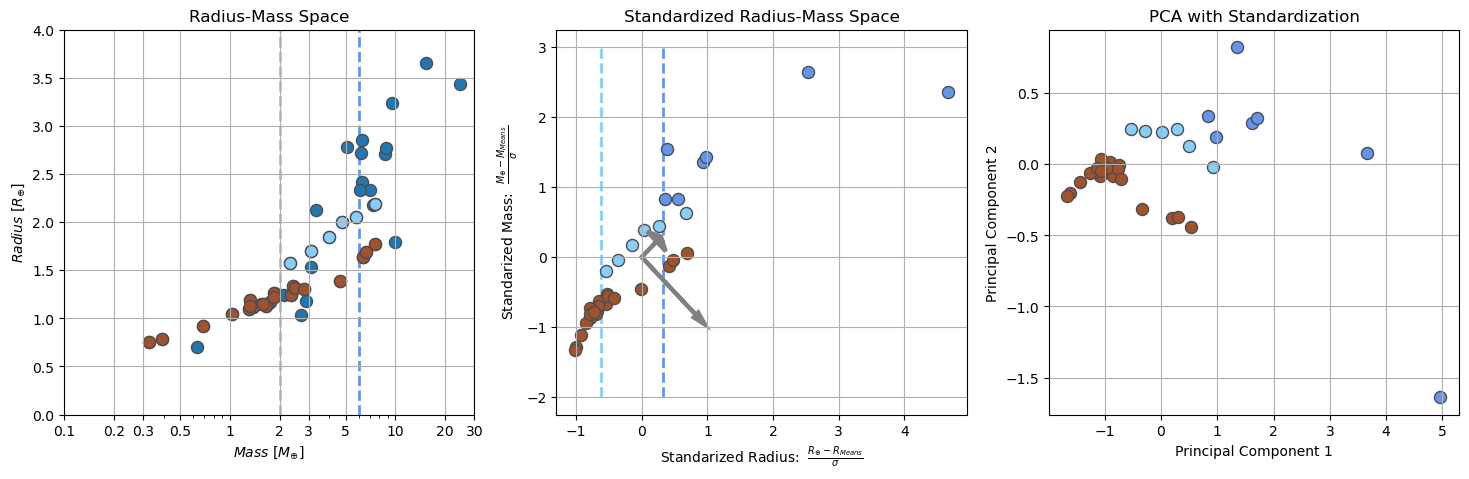

In [399]:
fig, ax = plt.subplots(figsize=(18,5))

data = np.column_stack((mass, radius))
mean_vector = np.mean(data, axis=0)
data = np.column_stack((mass, radius))

centered_data = np.column_stack(((mass-mean_vector[0])/np.std(mass), (radius-mean_vector[1])/np.std(radius)  ))
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
top_k_eigenvectors = eigenvectors[:, :k]

plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)

plt.scatter(data[:,0],data[:,1],s=75, edgecolor = "0.3",zorder = -20)
plt.scatter(mass_LI[index_rocky], radius_LI[index_rocky],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], radius_LI[index_water],color = "lightskyblue",s=75, edgecolor = "0.3")

plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.xlim(0.1, 30); plt.ylim(0, 4); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$Radius \ [R_{\oplus}]$'); plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.title('Radius-Mass Space')

plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)
plt.grid(zorder = -32)
plt.scatter((mass_LI[index_puffy]-mean_vector[0])/np.std(mass), (radius_LI[index_puffy]-mean_vector[1])/np.std(radius),color = "cornflowerblue",s=75, edgecolor = "0.3")
plt.scatter((mass_LI[index_rocky]-mean_vector[0])/np.std(mass), (radius_LI[index_rocky]-mean_vector[1])/np.std(radius),color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter((mass_LI[index_water]-mean_vector[0])/np.std(mass), (radius_LI[index_water]-mean_vector[1])/np.std(radius),color = "lightskyblue",s=75, edgecolor = "0.3")
plt.vlines((2-(mean_vector[0]))/np.std(mass),-2,3,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines((6-(mean_vector[0]))/np.std(mass),-2,3,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.rc('text', usetex=True)
plt.xlabel("Standarized Radius:  " + str(r'$\frac{R_{\oplus} - R_{Means}}{\sigma}$'))
plt.ylabel("Standarized Mass:  " + str(r'$\frac{M_{\oplus} - M_{Means}}{\sigma}$'))
plt.rc('text', usetex=False)
plt.title('Standardized Radius-Mass Space')

scaled_PC1 = np.sqrt(eigenvalues[0]) * top_k_eigenvectors[0]
scaled_PC2 = np.sqrt(eigenvalues[1]) * top_k_eigenvectors[1]

plt.arrow(0, 0,scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC2')
plt.arrow(0, 0,scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.4, head_length=0.1, fc='0.5', ec='0.5', label='Scaled PC2')

plt.subplot(1, 3, 3)  # 1 row, 2 columns, first subplot

data_water = np.column_stack(( (mass_LI[index_water]-mean_vector[0])/np.std(mass) ,  (radius_LI[index_water]-mean_vector[1])/np.std(radius)))
projected_data_water = np.dot(data_water, [top_k_eigenvectors[0],top_k_eigenvectors[1]])
data_puffy = np.column_stack(( (mass_LI[index_puffy]-mean_vector[0])/np.std(mass), (radius_LI[index_puffy]-mean_vector[1])/np.std(radius)))
projected_data_puffy = np.dot(data_puffy, top_k_eigenvectors)
data_rocky = np.column_stack(( (mass_LI[index_rocky]-mean_vector[0])/np.std(mass), (radius_LI[index_rocky]-mean_vector[1])/np.std(radius)))
projected_data_rocky = np.dot(data_rocky, top_k_eigenvectors)

plt.scatter(projected_data_rocky[:, 0], projected_data_rocky[:, 1],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(projected_data_water[:, 0], projected_data_water[:, 1],color = "lightskyblue",s=75, edgecolor = "0.3")
plt.scatter(projected_data_puffy[:, 0], projected_data_puffy[:, 1],color = "cornflowerblue",s=75, edgecolor = "0.3")

plt.title('PCA with Standardization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(zorder = -32)

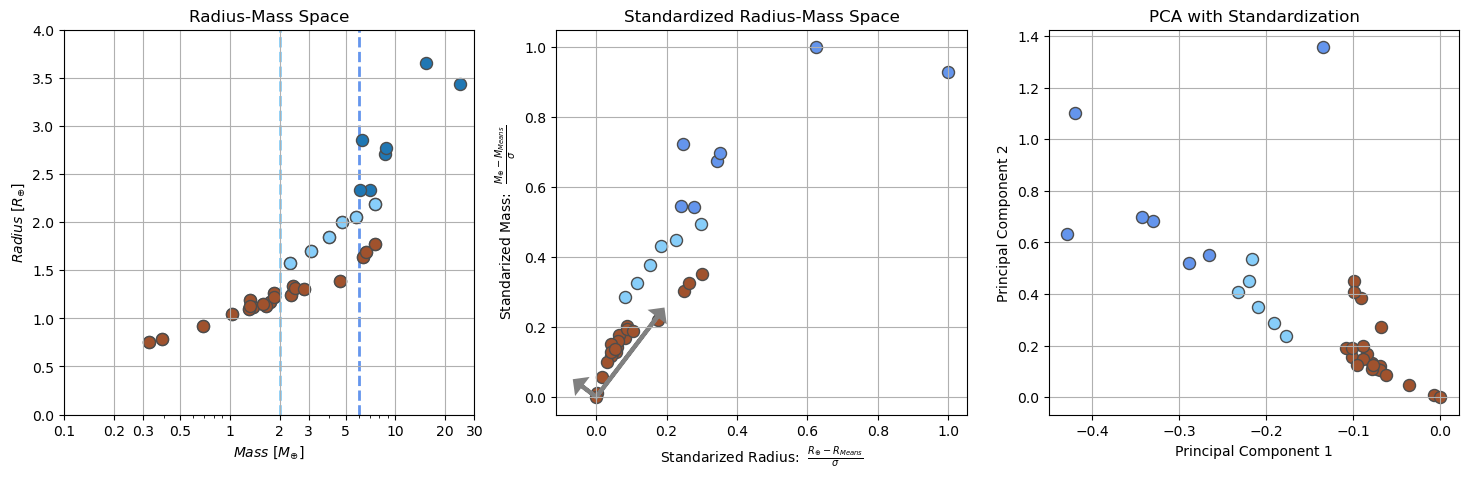

In [247]:
fig, ax = plt.subplots(figsize=(18,5))

data = np.column_stack((mass, radius))
mean_vector = np.mean(data, axis=0)
data = np.column_stack((mass, radius))

centered_data = np.column_stack(( (mass-min(mass))/(max(mass)-min(mass)) , (radius-min(radius))/(max(radius)-min(radius)) ))  
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
top_k_eigenvectors[0,0] = abs(top_k_eigenvectors[0,0] )
top_k_eigenvectors[0,1] = abs(top_k_eigenvectors[0,1] )

plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)

plt.scatter(data[:,0],data[:,1],s=75, edgecolor = "0.3",zorder = -20)
plt.scatter(mass_LI[index_rocky], radius_LI[index_rocky],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], radius_LI[index_water],color = "lightskyblue",s=75, edgecolor = "0.3")

plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.xlim(0.1, 30); plt.ylim(0, 4); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$Radius \ [R_{\oplus}]$'); plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.title('Radius-Mass Space')

plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)
plt.grid(zorder = -32)
plt.scatter((mass_LI[index_puffy]-min(mass))/(max(mass)-min(mass)), (radius_LI[index_puffy]-min(radius))/(max(radius)-min(radius)) ,color = "cornflowerblue",s=75, edgecolor = "0.3")
plt.scatter((mass_LI[index_water]-min(mass))/(max(mass)-min(mass)), (radius_LI[index_water]-min(radius))/(max(radius)-min(radius)) ,color = "lightskyblue",s=75, edgecolor = "0.3")
plt.scatter((mass_LI[index_rocky]-min(mass))/(max(mass)-min(mass)), (radius_LI[index_rocky]-min(radius))/(max(radius)-min(radius)) ,color = "Sienna",s=75, edgecolor = "0.3")

#plt.scatter((mass_LI[index_rocky]-mean_vector[0])/np.std(mass), (radius_LI[index_rocky]-mean_vector[1])/np.std(radius),color = "Sienna",s=75, edgecolor = "0.3")
#plt.scatter((mass_LI[index_water]-mean_vector[0])/np.std(mass), (radius_LI[index_water]-mean_vector[1])/np.std(radius),color = "lightskyblue",s=75, edgecolor = "0.3")
#plt.vlines((2-(mean_vector[0]))/np.std(mass),-2,3,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
#plt.vlines((6-(mean_vector[0]))/np.std(mass),-2,3,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.rc('text', usetex=True)
plt.xlabel("Standarized Radius:  " + str(r'$\frac{R_{\oplus} - R_{Means}}{\sigma}$'))
plt.ylabel("Standarized Mass:  " + str(r'$\frac{M_{\oplus} - M_{Means}}{\sigma}$'))
plt.rc('text', usetex=False)
plt.title('Standardized Radius-Mass Space')

scaled_PC1 = np.sqrt(eigenvalues[0]) * top_k_eigenvectors[0]
scaled_PC2 = np.sqrt(eigenvalues[1]) * top_k_eigenvectors[1]

plt.arrow(0, 0,scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.04,head_length=0.02, fc='0.5', ec='0.5', label='Scaled PC2')
plt.arrow(0, 0,scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.04, head_length=0.02,fc='0.5', ec='0.5', label='Scaled PC2')

plt.subplot(1, 3, 3)  # 1 row, 2 columns, first subplot
data_water = np.column_stack((( mass_LI[index_water]-min(mass))/(max(mass)-min(mass)),  (radius_LI[index_water]-min(radius))/(max(radius)-min(radius)) ))
projected_data_water = np.dot(data_water, [top_k_eigenvectors[0],top_k_eigenvectors[1]])
data_puffy = np.column_stack((( mass_LI[index_puffy]-min(mass))/(max(mass)-min(mass)), (radius_LI[index_puffy]-min(radius))/(max(radius)-min(radius)) ))
projected_data_puffy = np.dot(data_puffy, top_k_eigenvectors)
data_rocky = np.column_stack(((mass_LI[index_rocky]-min(mass))/(max(mass)-min(mass)), (radius_LI[index_rocky]-min(radius))/(max(radius)-min(radius)) ))
projected_data_rocky = np.dot(data_rocky, top_k_eigenvectors)

plt.scatter(projected_data_rocky[:, 0], projected_data_rocky[:, 1],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(projected_data_water[:, 0], projected_data_water[:, 1],color = "lightskyblue",s=75, edgecolor = "0.3")
plt.scatter(projected_data_puffy[:, 0], projected_data_puffy[:, 1],color = "cornflowerblue",s=75, edgecolor = "0.3")

plt.title('PCA with Standardization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(zorder = -32)


In [355]:
density_norm = density_LI / earth_density

mass_err_LI = np.array([mass_unc_low_LI, mass_unc_up_LI])
density_err_LI = [density_unc_low_LI / rocky_density(mass_LI), density_unc_up_LI / rocky_density(mass_LI)]
density_norm = density_LI / rocky_density(mass_LI)
  
index = []
mass_rocky = []; mass_water = []; mass_puffy = [];
radius_rocky = []; radius_water = []; radius_puffy = [];
density_rocky = []; density_water = []; density_puffy = [];
density_low_rocky =[]; density_low_water = []; density_low_puffy = []
density_up_rocky =[]; density_up_water = []; density_up_puffy = []
planet_rocky = []; planet_water = []; planet_puffy = []
index_puffy = []; index_water = []; index_rocky = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
            mass_rocky.append(mass_LI[i])
            radius_rocky.append(radius_LI[i])
            density_rocky.append(density_LI[i])
            density_low_rocky.append(density_unc_low_LI[i])
            density_up_rocky.append(density_unc_up_LI[i])
            planet_rocky.append(planet_name_LI[i])
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i]))  and planet_name_LI[i] != 'K2-146 c':
            index_puffy.append(i)
            mass_puffy.append(mass_LI[i])
            radius_puffy.append(radius_LI[i])
            density_puffy.append(density_LI[i])
            density_low_puffy.append(density_unc_low_LI[i])
            density_up_puffy.append(density_unc_up_LI[i])
            planet_puffy.append(planet_name_LI[i])
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) or planet_name_LI[i] == 'K2-146 c':
            index_water.append(i)
            mass_water.append(mass_LI[i])
            radius_water.append(radius_LI[i])
            density_water.append(density_LI[i])
            density_low_water.append(density_unc_low_LI[i])
            density_up_water.append(density_unc_up_LI[i])
            planet_water.append(planet_name_LI[i])


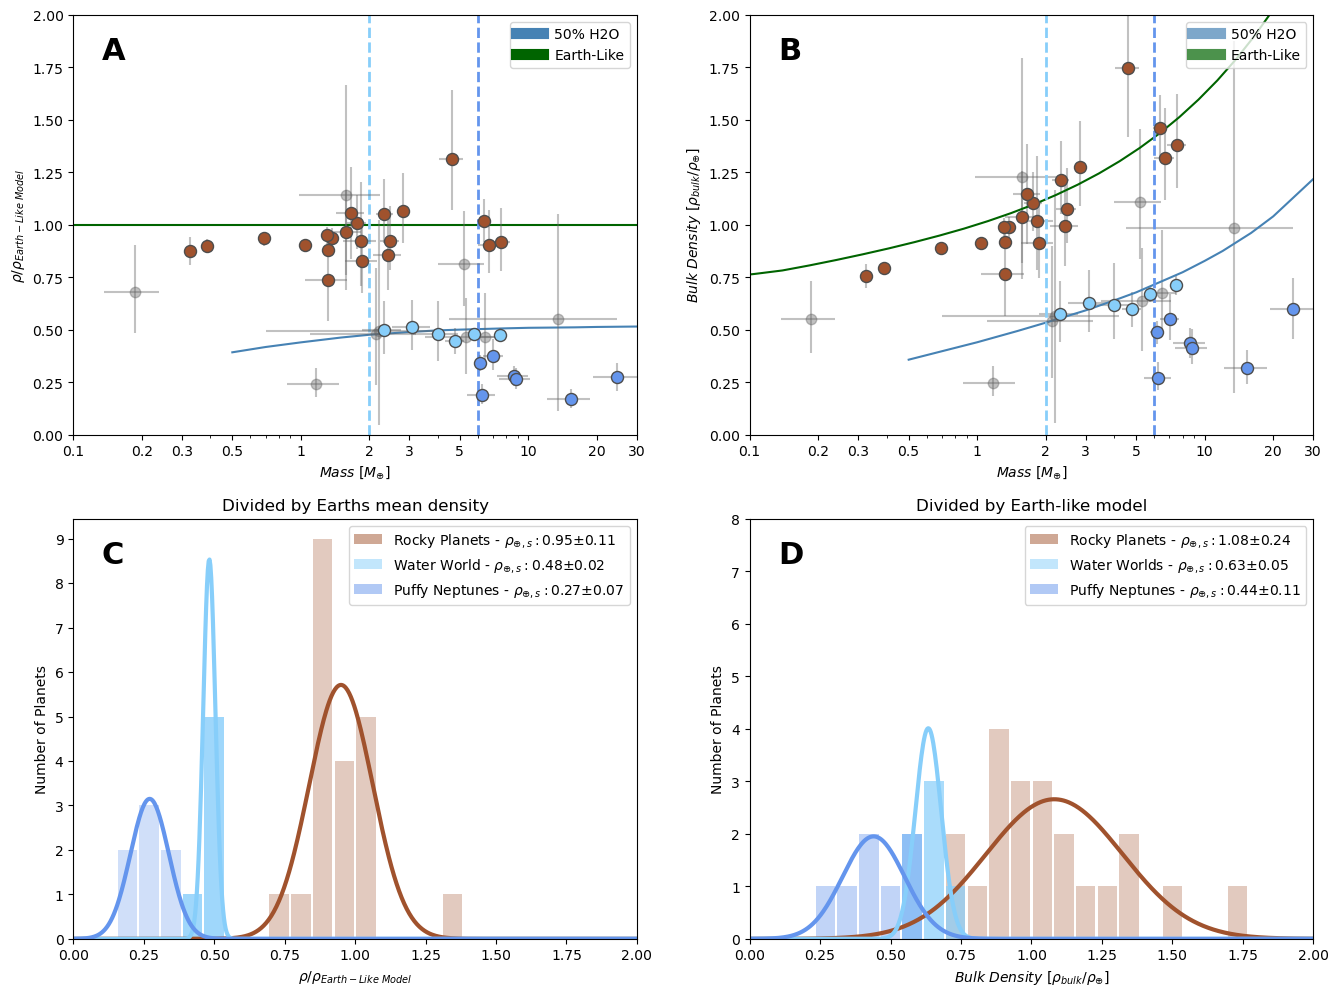

In [682]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the lines
fig, ax = plt.subplots(figsize=(16,12))
for i, label in enumerate(('A', 'B',"C","D")):
    ax = fig.add_subplot(2,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=22, fontweight='bold', va='top')
plt.subplot(2, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(H20_50_500K["Mass"], H20_50_500K_density_g_cm3 / rocky_density(H20_50_500K["Mass"]), "-", color="steelblue", label="50% H2O", zorder=-32)
plt.plot(earth_like_rocky["Mass"], earth_like_rocky_density_g_cm3 / rocky_density(earth_like_rocky["Mass"]), "-", color="darkgreen", label="Earth-Like", zorder=-32)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
mass_err_LI = np.array([mass_unc_low_LI, mass_unc_up_LI])
density_err_LI = [density_unc_low_LI / rocky_density(mass_LI), density_unc_up_LI / rocky_density(mass_LI)]
density_norm = density_LI / rocky_density(mass_LI)
index = []; index_rocky = []; index_water = []; index_puffy = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4:
        index.append(i) 
xerr = [mass_err_LI[0][index], mass_err_LI[1][index]]
yerr = [density_err_LI[0][index], density_err_LI[1][index]]
plt.errorbar(mass_LI[index], density_norm[index], xerr=xerr, yerr=yerr, fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i]))  and planet_name_LI[i] != 'K2-146 c':
            index_puffy.append(i)
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) or planet_name_LI[i] == 'K2-146 c':
            index_water.append(i)

plt.scatter(mass_LI[index_rocky], density_norm[index_rocky],color = "sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_puffy], density_norm[index_puffy],color = "cornflowerblue",s = 75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], density_norm[index_water],color = "lightskyblue",s = 75, edgecolor = "0.3")

plt.xlim(0.1, 30)
plt.ylim(0, 2); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$ρ / ρ_{Earth-Like\ Model}$')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.xlabel("$Mass\ [M_{\oplus}]$")

plt.subplot(2, 2, 2)  # 1 row, 2 columns, first subplot
plt.scatter(mass_rocky,density_rocky/earth_density,color = "sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_puffy,density_puffy/earth_density,color = "cornflowerblue",s = 75, edgecolor = "0.3")
plt.scatter(mass_water,density_water/earth_density,color = "lightskyblue",s = 75, edgecolor = "0.3")

xerr = [mass_unc_low_LI, mass_unc_up_LI]
yerr = [density_unc_low_LI/earth_density,density_unc_up_LI/earth_density]
for i in range(0,len(mass_LI)):
    if radius_LI[i]< 4:
        plt.errorbar(mass_LI[i], density_LI[i]/earth_density, xerr=[[xerr[0][i]],[xerr[1][i]]] , yerr=[[yerr[0][i]],[yerr[1][i]]],fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)


earth_like_rocky_mass_g        = earth_Mass*np.array(earth_like_rocky["Mass"])
earth_like_rocky_radius_cm     = earth_Radius*np.array(earth_like_rocky["Radius"])
earth_like_rocky_density_g_cm3 = (earth_like_rocky_mass_g) / ((4/3)*(np.pi)*(np.power(earth_like_rocky_radius_cm,3))   ) 

H20_50_500K_mass_g        = earth_Mass*np.array(H20_50_500K["Mass"])
H20_50_500K_radius_cm     = earth_Radius*np.array(H20_50_500K["Radius"])
H20_50_500K_density_g_cm3 = (H20_50_500K_mass_g) / ((4/3)*(np.pi)*(np.power(H20_50_500K_radius_cm,3))   ) 


plt.plot(H20_50_500K["Mass"], H20_50_500K_density_g_cm3/earth_density, "-", color="steelblue", label="50% H2O", zorder=-32)
plt.plot(earth_like_rocky["Mass"], earth_like_rocky_density_g_cm3/earth_density, "-", color="darkgreen", label="Earth-Like", zorder=-32)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)

plt.xlim(0.1, 30)
plt.ylim(0, 2); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")

leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.xlabel("$Mass\ [M_{\oplus}]$")



plt.subplot(2, 2, 3)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 3, 40)
pbins = np.linspace(0, 3, 1000)
###### Rocky Planets #####
indexs = index_rocky
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.3, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

###### Water Worlds #####
indexs  = index_water
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.8, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Water World - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Puffy Neptunes #####
indexs  = index_puffy
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.3, rwidth=0.9, density=False,zorder =-12)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True, label="Puffy Neptunes - " + "$ρ_{⊕,s}:$" + str(np.round(mu, 2)) + "±" + str(np.round(sigma, 2)), linewidth=3)

##### Plotting ######
plt.title('Divided by Earths mean density')
plt.ylabel('Number of Planets')
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_alpha(0.7)
    line.set_linewidth(8.0)
plt.xlabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.yticks([0,1,2,3,4,5,6,7,8,9],["0","1","2","3","4","5","6","7","8","9"],minor=False)

plt.xlim(0,2)
plt.subplot(2, 2, 4)  # 1 row, 2 columns, first subplot
hist_values_false, bin_edges, _ = plt.hist(density_rocky/earth_density, bins=bins, color='Sienna', alpha=0.3, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_rocky/earth_density)
sigma = np.sqrt(np.cov(density_rocky/earth_density, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Water Worlds #####
indexs  = index_water
hist_values_false, bin_edges, _ = plt.hist(density_water/earth_density, bins=bins, color='lightskyblue', alpha=0.7, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_water/earth_density)
sigma = np.sqrt(np.cov(density_water/earth_density, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Puffy Neptunes #####
indexs  = index_puffy
hist_values_false, bin_edges, _ = plt.hist(density_puffy/earth_density, bins=bins, color='cornflowerblue', alpha=0.4, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_puffy/earth_density)
sigma = np.sqrt(np.cov(density_puffy/earth_density, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue',alpha = 0.5, rwidth=0.9, density=True,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Plotting ######
plt.title('Divided by Earth-like model')
plt.ylabel('Number of Planets')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([0.0,0.25,0.5,0.75,1,1.25,1.5,1.75,2],["0.00","0.25","0.50","0.75","1.00","1.25","1.50","1.75","2.00"],minor=False)
plt.yticks([0,1,2,3,4,5,6,7,8],["0","1","2","3","4","5","6","7","8"],minor=False)
plt.xlabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")
plt.xlim(0,2)
image_name = 'Division_meaning.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

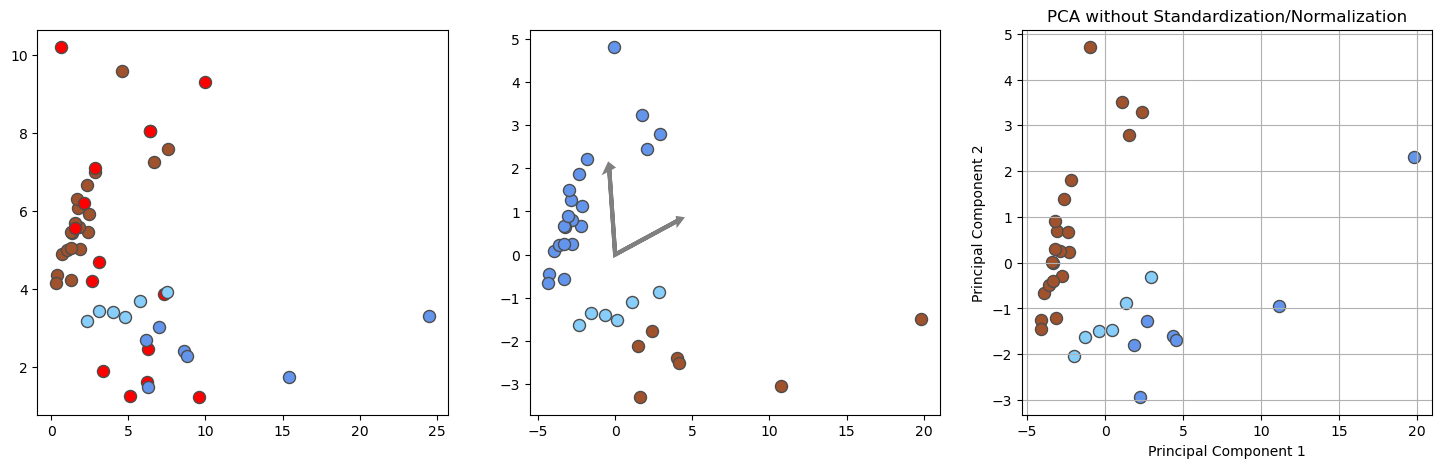

In [398]:
fig, ax = plt.subplots(figsize=(18,5))
plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot

plt.scatter(mass_rocky,density_rocky,color = "sienna",s=75, edgecolor = "0.3")
plt.scatter(mass2,density2,color = "red",s = 75, edgecolor = "0.3")
plt.scatter(mass_puffy,density_puffy,color = "cornflowerblue",s = 75, edgecolor = "0.3")
plt.scatter(mass_water,density_water,color = "lightskyblue",s = 75, edgecolor = "0.3")


plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
mass = np.concatenate((mass2, mass_LI[index_rocky], mass_LI[index_puffy], mass_LI[index_water]))
density = np.concatenate((density2, density_LI[index_rocky], density_LI[index_puffy], density_LI[index_water]))

data = np.column_stack((mass, density))
mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
top_k_eigenvectors = eigenvectors[:, :k]

plt.scatter(mass_water-mean_vector[0],density_water-mean_vector[1],s=75, color = "lightskyblue",edgecolor = "0.3")
plt.scatter(mass_rocky-mean_vector[0],density_rocky-mean_vector[1],s=75, color = "cornflowerblue",edgecolor = "0.3")
plt.scatter(mass_puffy-mean_vector[0],density_puffy-mean_vector[1],s=75, color = "Sienna",edgecolor = "0.3")

scaled_PC1 = np.sqrt(eigenvalues[0]) * eigenvectors[0]
scaled_PC2 = np.sqrt(eigenvalues[1]) * eigenvectors[1]
plt.arrow(0, 0,scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC2')
plt.arrow(0, 0,scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.4, head_length=0.1, fc='0.5', ec='0.5', label='Scaled PC2')

plt.subplot(1, 3, 3)  # 1 row, 2 columns, first subplot
data_water = np.column_stack((mass_water-mean_vector[0],density_water-mean_vector[1]))
projected_data_water = np.dot(data_water, top_k_eigenvectors)
data_rocky = np.column_stack((mass_rocky-mean_vector[0],density_rocky-mean_vector[1]))
projected_data_rocky = np.dot(data_rocky, top_k_eigenvectors)
data_puffy = np.column_stack((mass_puffy-mean_vector[0],density_puffy-mean_vector[1]))
projected_data_puffy = np.dot(data_puffy, top_k_eigenvectors)
plt.scatter(projected_data_rocky[:, 0], projected_data_rocky[:, 1],s=75, color = "Sienna",edgecolor = "0.3")
plt.scatter(projected_data_water[:, 0], projected_data_water[:, 1],s=75, color = "lightskyblue",edgecolor = "0.3")
plt.scatter(projected_data_puffy[:, 0], projected_data_puffy[:, 1],s=75, color = "cornflowerblue",edgecolor = "0.3")

plt.title('PCA without Standardization/Normalization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(zorder = -32)

In [387]:
eigenvalues

array([18.99836545,  4.505199  ])

In [388]:
eigenvectors

array([[ 0.98176226,  0.19011275],
       [-0.19011275,  0.98176226]])

In [ ]:
data_rocky = np.column_stack((mass_LI[index_rocky], radius_LI[index_rocky])) - mean_vector
projected_data_rocky = np.dot(data_rocky, top_k_eigenvectors)

data_water = np.column_stack((mass_LI[index_water], radius_LI[index_water])) - mean_vector
projected_data_water = np.dot(data_water, top_k_eigenvectors)

plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)

plt.scatter(data[:,0],data[:,1],s=75, edgecolor = "0.3",zorder = -20)
plt.scatter(mass_LI[index_rocky], radius_LI[index_rocky],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], radius_LI[index_water],color = "lightskyblue",s=75, edgecolor = "0.3")

plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.xlim(0.1, 30); plt.ylim(0, 4); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$Radius \ [R_{\oplus}]$'); plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.title('Radius-Mass Space')

plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
plt.grid(zorder = -32)
plt.scatter(centered_data[:,0],centered_data[:,1],s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_rocky]-mean_vector[0], radius_LI[index_rocky]-mean_vector[1],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water]-mean_vector[0], radius_LI[index_water]-mean_vector[1],color = "lightskyblue",s=75, edgecolor = "0.3")

scaled_PC1 = np.sqrt(eigenvalues[0]) * PC1
scaled_PC2 = np.sqrt(eigenvalues[1]) * PC2

plt.arrow(0, 0,scaled_PC1[0],scaled_PC1[1] ,length_includes_head = True,lw = 3,head_width=0.1, head_length=0.2, fc='0.5', ec='0.5', label='Scaled PC2')
plt.arrow(0, 0,scaled_PC2[0],scaled_PC2[1] ,length_includes_head = True,lw = 3, head_width=0.4, head_length=0.1, fc='0.5', ec='0.5', label='Scaled PC2')
plt.vlines(2-mean_vector[0],-4,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6-mean_vector[0],-4,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.xlim(0-mean_vector[0]-0.5, 30-mean_vector[0]); plt.ylim(0-mean_vector[1], 4-mean_vector[1]); 
#plt.xscale("log")
#plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$Radius \ [R_{\oplus}] - R_{Mean}$'); plt.xlabel("$Mass\ [M_{\oplus}] - M_{Mean}$")
plt.title('$Centered Radius-Mass Space $')


plt.subplot(1, 3, 3)  # 1 row, 2 columns, first subplot
plt.scatter(projected_data[:, 0], projected_data[:, 1],s=75, edgecolor = "0.3")
plt.scatter(projected_data_rocky[:, 0], projected_data_rocky[:, 1],color = "Sienna",s=75, edgecolor = "0.3")
plt.scatter(projected_data_water[:, 0], projected_data_water[:, 1],color = "lightskyblue",s=75, edgecolor = "0.3")
plt.title('PCA without Standardization/Normalization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(zorder = -32)



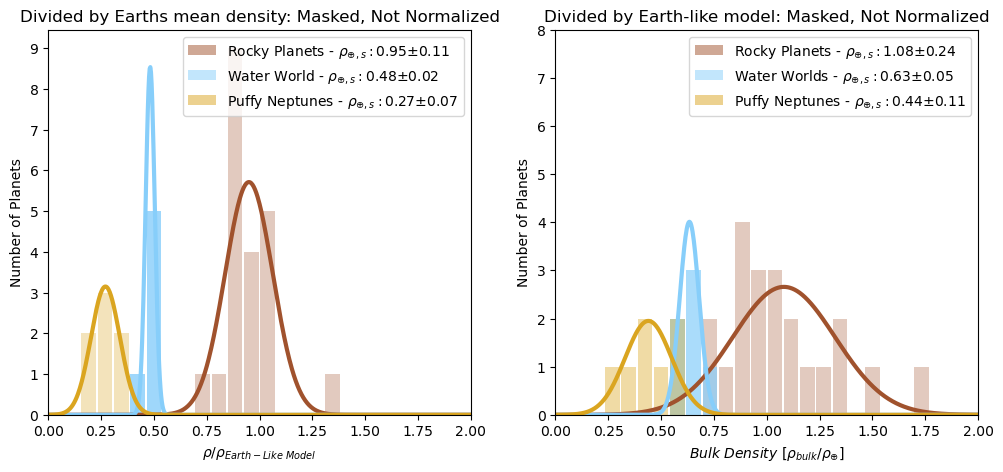

In [445]:
bins  = np.linspace(0, 3, 40)
pbins = np.linspace(0, 3, 1000)
fig, ax = plt.subplots(figsize=(12,5))
for i, label in enumerate(('A', 'B')):
    ax = fig.add_subplot(2,1,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=22, fontweight='bold', va='top')
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot

###### Rocky Planets #####
indexs = index_rocky
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.3, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

###### Water Worlds #####
indexs  = index_water
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.8, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Water World - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Puffy Neptunes #####
indexs  = index_puffy
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='goldenrod', alpha=0.3, rwidth=0.9, density=False,zorder =-12)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "goldenrod",linewidth=3)
plt.hist(100, bins=bins, color='goldenrod', alpha=0.5, rwidth=0.9, density=True, label="Puffy Neptunes - " + "$ρ_{⊕,s}:$" + str(np.round(mu, 2)) + "±" + str(np.round(sigma, 2)), linewidth=3)

##### Plotting ######
plt.title('Divided by Earths mean density: Masked, Not Normalized')
plt.ylabel('Number of Planets')
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_alpha(0.7)
    line.set_linewidth(8.0)
plt.xlabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.yticks([0,1,2,3,4,5,6,7,8,9],["0","1","2","3","4","5","6","7","8","9"],minor=False)

plt.xlim(0,2)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
hist_values_false, bin_edges, _ = plt.hist(density_rocky/earth_density, bins=bins, color='Sienna', alpha=0.3, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_rocky/earth_density)
sigma = np.sqrt(np.cov(density_rocky/earth_density, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Water Worlds #####
indexs  = index_water
hist_values_false, bin_edges, _ = plt.hist(density_water/earth_density, bins=bins, color='lightskyblue', alpha=0.7, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_water/earth_density)
sigma = np.sqrt(np.cov(density_water/earth_density, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Puffy Neptunes #####
indexs  = index_puffy
hist_values_false, bin_edges, _ = plt.hist(density_puffy/earth_density, bins=bins, color='goldenrod', alpha=0.4, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_puffy/earth_density)
sigma = np.sqrt(np.cov(density_puffy/earth_density, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "goldenrod",linewidth=3)
plt.hist(100, bins=bins, color='goldenrod',alpha = 0.5, rwidth=0.9, density=True,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Plotting ######
plt.title('Divided by Earth-like model: Masked, Not Normalized')
plt.ylabel('Number of Planets')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([0.0,0.25,0.5,0.75,1,1.25,1.5,1.75,2],["0.00","0.25","0.50","0.75","1.00","1.25","1.50","1.75","2.00"],minor=False)
plt.yticks([0,1,2,3,4,5,6,7,8],["0","1","2","3","4","5","6","7","8"],minor=False)
plt.xlabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")
plt.xlim(0,2)
plt.show()
image_name = 'Histograms_Division_meaning.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)

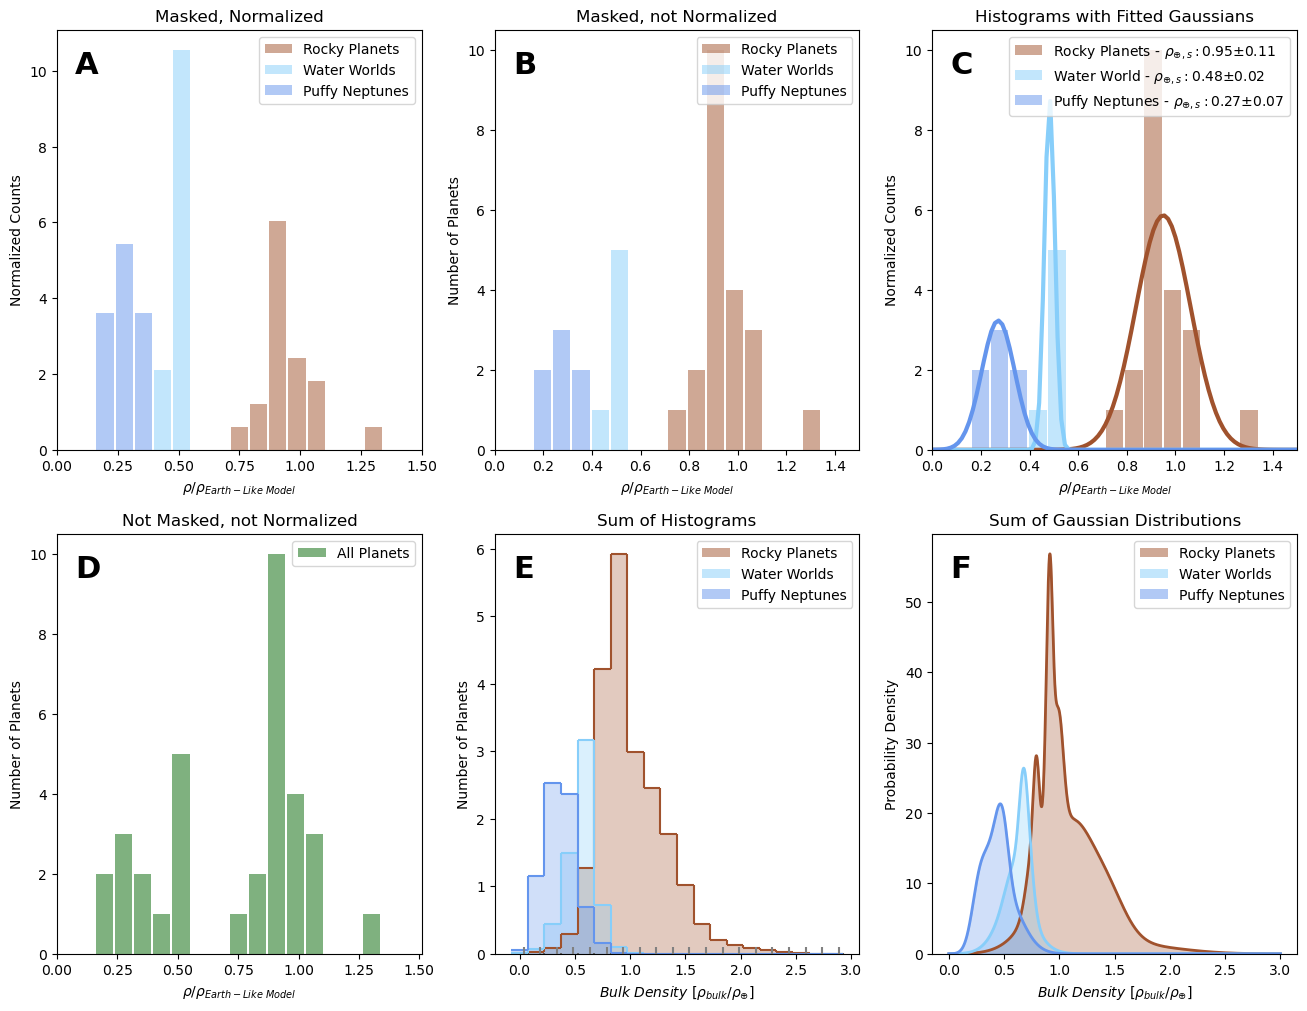

In [894]:
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(16,12))
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

for i, label in enumerate(('A', 'B', 'C', 'D','E',"F")):
    ax = fig.add_subplot(2,3,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=22, fontweight='bold', va='top')
plt.subplot(2, 3, 1)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 1.5, 20)
pbins = np.linspace(0, 1.5, 100)
###### Rocky Planets #####
indexs  = index_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True,label = "Rocky Planets")

##### Water Worlds #####
indexs  = index_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label = "Water Worlds")

##### Puffy Neptunes #####
indexs  = index_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label = "Puffy Neptunes")

##### Plotting ######
plt.title('Masked, Normalized')
plt.ylabel('Normalized Counts')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([0.0,0.25,0.5,0.75,1,1.25,1.5],["0.00","0.25","0.50","0.75","1.00","1.25","1.50"],minor=False)
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)


plt.subplot(2, 3, 2)
###### Rocky Planets #####
indexs = index_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False,label = "Rocky Planets")

##### Water Worlds #####
indexs  = index_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False,label = "Water Worlds")

##### Puffy Neptunes #####
indexs  = index_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False,label = "Puffy Neptunes")

##### Plotting ######
plt.title('Masked, not Normalized')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel("Number of Planets")
plt.xlim(0,1.50)
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_alpha(0.7)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(2, 3, 3)  # 1 row, 2 columns, first subplot

###### Rocky Planets #####
indexs = index_rocky
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "sienna",linewidth=3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

###### Water Worlds #####
indexs  = index_water
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "lightskyblue",linewidth=3)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label ="Water World - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)))

##### Puffy Neptunes #####
indexs  = index_puffy
hist_values_false, bin_edges, _ = plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False)
area_under_bars = np.sum(hist_values_false * np.diff(bin_edges))
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*area_under_bars
plt.plot(pbins, best_fit_line,color = "cornflowerblue",linewidth=3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True, label="Puffy Neptunes - " + "$ρ_{⊕,s}:$" + str(np.round(mu, 2)) + "±" + str(np.round(sigma, 2)), linewidth=3)

##### Plotting ######
plt.title('Histograms with Fitted Gaussians')
plt.ylabel('Normalized Counts')
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_alpha(0.7)
    line.set_linewidth(8.0)
plt.xlabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(2, 3, 4)  # 1 row, 2 columns, first subplot
###### ALL Planets #####
indexs  = np.concatenate([index_rocky,index_water, index_puffy])
plt.hist(density_norm[indexs], bins=bins, color='darkgreen', alpha=0.5, rwidth=0.9, density=False,label = "All Planets")
plt.title('Not Masked, not Normalized')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel("Number of Planets")
plt.xlim(0,1.50)
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.51)
plt.xticks([0.0,0.25,0.5,0.75,1,1.25,1.5],["0.00","0.25","0.50","0.75","1.00","1.25","1.50"],minor=False)


plt.subplot(2, 3, 5)  # 1 row, 2 columns, first subplot


bins  = np.linspace(0, 3, 21)
total_height_rocky  = np.zeros(len(bins)-1)
for i in range(0,len(planet_rocky)):
    mean = density_rocky[i]/earth_density
    std_dev_upper = density_up_rocky[i]/earth_density
    std_dev_lower = density_low_rocky[i]/earth_density

    std_dev = (std_dev_upper + std_dev_lower) / 2
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100000)
    gaussian = norm.pdf(x, mean, std_dev)
    random_numbers = np.random.normal(mean, std_dev, 100000)
    hist_values, bin_edges = np.histogram(random_numbers, bins=bins, density=False)
    scaled_hist_values = hist_values / np.sum(hist_values)
    total_height_rocky += scaled_hist_values
    #plt.bar(bin_edges[:-1], scaled_hist_values, width=bin_edges[1] - bin_edges[0], alpha=0.7,label = planet_water[i])
intv = bin_edges[1]-bin_edges[0]

for i in range(0,19):
    plt.vlines(bin_edges[i]+intv/2,total_height_rocky[i],total_height_rocky[i+1],'sienna')
    plt.hlines(total_height_rocky[i],bin_edges[i]-intv/2,bin_edges[i]+intv/2,'sienna')
plt.vlines(bin_edges[19]+intv/2,0,total_height_rocky[19],'sienna')
plt.hlines(total_height_rocky[19],bin_edges[19]-intv/2,bin_edges[19]+intv/2,'sienna')

plt.bar(bin_edges[:-1],total_height_rocky, width=bin_edges[1] - bin_edges[0], alpha=0.3,color = "sienna",zorder = -21)
plt.hist(100, bins=bins, color='sienna', alpha=0.5,rwidth=0.9, density=True,label = "Rocky Planets")

total_height_water  = np.zeros(len(bins)-1)

for i in range(0,len(planet_water)):
    mean = density_water[i]/earth_density
    std_dev_upper = density_up_water[i]/earth_density
    std_dev_lower = density_low_water[i]/earth_density

    std_dev = (std_dev_upper + std_dev_lower) / 2
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100000)
    gaussian = norm.pdf(x, mean, std_dev)
    random_numbers = np.random.normal(mean, std_dev, 100000)
    hist_values, bin_edges = np.histogram(random_numbers, bins=bins, density=False)
    scaled_hist_values = hist_values / np.sum(hist_values)
    total_height_water += scaled_hist_values

plt.bar(bin_edges[:-1], total_height_water, width=bin_edges[1] - bin_edges[0], alpha=0.3,color= 'lightskyblue',zorder = -21)
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label = "Water Worlds")

intv = bin_edges[1]-bin_edges[0]
for i in range(0,20):
    plt.vlines(bin_edges[i]+intv/2,0,0.01,"0.4")
for i in range(0,19):
    plt.vlines(bin_edges[i]+intv/2,total_height_water[i],total_height_water[i+1],"lightskyblue")
    plt.hlines(total_height_water[i],bin_edges[i]-intv/2,bin_edges[i]+intv/2,"lightskyblue")
plt.vlines(bin_edges[19]+intv/2,0,total_height_water[19],"lightskyblue")
plt.hlines(total_height_water[19],bin_edges[19]-intv/2,bin_edges[19]+intv/2,"lightskyblue")

total_height_puffy  = np.zeros(len(bins)-1)
for i in range(0,len(planet_puffy)):
    mean = density_puffy[i]/earth_density
    std_dev_upper = density_up_puffy[i]/earth_density
    std_dev_lower = density_low_puffy[i]/earth_density
    std_dev = (std_dev_upper + std_dev_lower) / 2
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100000)
    gaussian = norm.pdf(x, mean, std_dev)
    random_numbers = np.random.normal(mean, std_dev, 100000)
    hist_values, bin_edges = np.histogram(random_numbers, bins=bins, density=False)
    scaled_hist_values = hist_values / np.sum(hist_values)
    total_height_puffy += scaled_hist_values

plt.bar(bin_edges[:-1], total_height_puffy, width=bin_edges[1] - bin_edges[0], alpha=0.3,color= 'cornflowerblue',zorder = -21)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label = "Puffy Neptunes")

for i in range(0,19):
    plt.vlines(bin_edges[i]+intv/2,total_height_puffy[i],total_height_puffy[i+1],'cornflowerblue')
    plt.hlines(total_height_puffy[i],bin_edges[i]-intv/2,bin_edges[i]+intv/2,'cornflowerblue')
plt.vlines(bin_edges[19]+intv/2,0,total_height_puffy[19],'cornflowerblue')
plt.hlines(total_height_puffy[19],bin_edges[19]-intv/2,bin_edges[19]+intv/2,'cornflowerblue')

for i in range(0,20):
    plt.vlines(bin_edges[i]+0.075/2,0,0.1,"0.5",zorder = 10)
plt.xlabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")
plt.ylabel("Number of Planets")
plt.title('Sum of Histograms')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_alpha(0.7)
    line.set_linewidth(8.0)

plt.subplot(2, 3, 6)  # 1 row, 2 columns, first subplot
x = np.linspace(0, 3, 100000)
y_total = 0
for i in range(0,len(planet_rocky)):
    mu, sigma = density_rocky[i]/earth_density, (density_up_rocky[i]/earth_density + density_low_rocky[i]/earth_density)/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"Sienna",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, linestyle='-', linewidth=2,color= "Sienna")
plt.fill_between(x, 0, y_total, color="Sienna", alpha=0.3)
plt.hist(100, bins=bins, color='Sienna', alpha=0.5,rwidth=0.9, density=True,label='Rocky Planets')

y_total = 0
for i in range(0,len(planet_water)):
    mu, sigma = density_water[i]/earth_density, (density_up_water[i]/earth_density + density_low_water[i]/earth_density)/2
    y = norm.pdf(x, mu, sigma,)
    #plt.plot(x, y,color = "lightskyblue",alpha = 0.5)
    y_total += y
plt.plot(x, y_total, linestyle='-', linewidth=2,color= "lightskyblue")
plt.fill_between(x, 0, y_total, color="lightskyblue", alpha=0.3 )
plt.hist(100, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label='Water Worlds')

y_total = 0
for i in range(0,len(planet_puffy)):
    mu, sigma = density_puffy[i]/earth_density, (density_up_puffy[i]/earth_density + density_low_puffy[i]/earth_density)/2
    y = norm.pdf(x, mu, sigma)
    #plt.plot(x, y,"Cornflowerblue",alpha = 0.5,linestyle = "solid")
    y_total += y
plt.plot(x, y_total, linestyle='-', linewidth=2,color= "Cornflowerblue")
plt.fill_between(x, 0, y_total, color="Cornflowerblue", alpha=0.3)
plt.hist(100, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label = "Puffy Neptunes")

plt.title('Sum of Gaussian Distributions')
plt.xlabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")
plt.ylabel('Probability Density')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_alpha(0.7)
    line.set_linewidth(8.0)
plt.xlabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")

image_name = 'Histograms_NO_Gaussians.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

(0.0, 2.0)

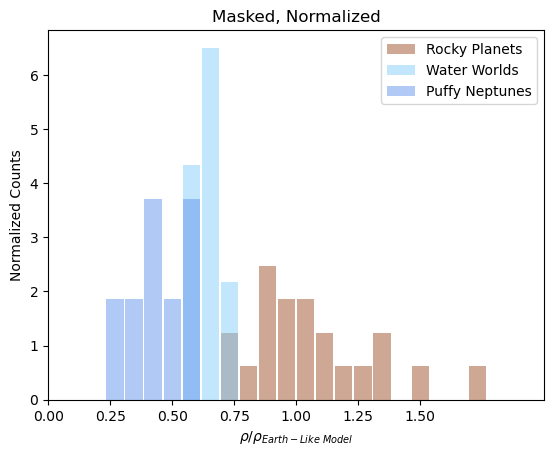

In [243]:
bins  = np.linspace(0, 3, 40)
###### Rocky Planets #####
indexs  = index_rocky
plt.hist(density_rocky/earth_density, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True,label = "Rocky Planets")

##### Water Worlds #####
indexs  = index_water
plt.hist(density_water/earth_density, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label = "Water Worlds")

##### Puffy Neptunes #####
indexs  = index_puffy
plt.hist(density_puffy/earth_density, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label = "Puffy Neptunes")

##### Plotting ######
plt.title('Masked, Normalized')
plt.ylabel('Normalized Counts')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([0.0,0.25,0.5,0.75,1,1.25,1.5],["0.00","0.25","0.50","0.75","1.00","1.25","1.50"],minor=False)
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,2)


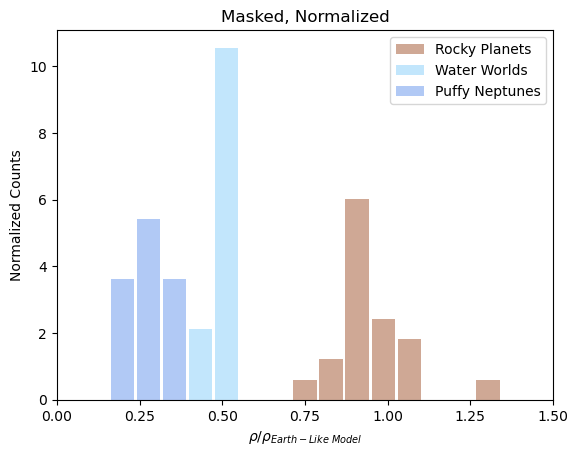

(0.0, 1.5)

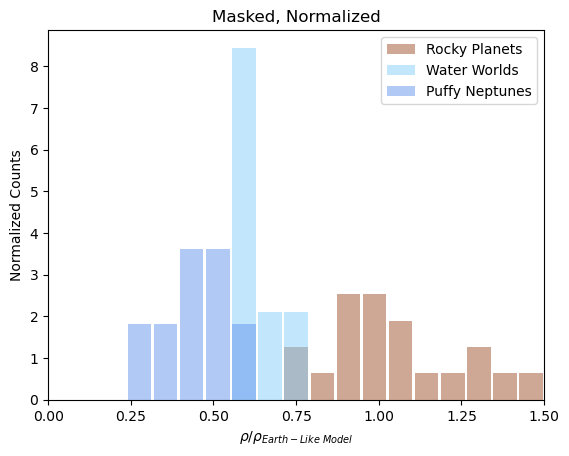

In [268]:
bins  = np.linspace(0, 1.5, 20)
pbins = np.linspace(0, 1.5, 100)
###### Rocky Planets #####
indexs  = index_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True,label = "Rocky Planets")

##### Water Worlds #####
indexs  = index_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label = "Water Worlds")

##### Puffy Neptunes #####
indexs  = index_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label = "Puffy Neptunes")

##### Plotting ######
plt.title('Masked, Normalized')
plt.ylabel('Normalized Counts')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([0.0,0.25,0.5,0.75,1,1.25,1.5],["0.00","0.25","0.50","0.75","1.00","1.25","1.50"],minor=False)
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.show()
bins  = np.linspace(0, 1.5, 20)
pbins = np.linspace(0, 1.5, 100)
###### Rocky Planets #####
indexs  = index_rocky
plt.hist(density_rocky/earth_density, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True,label = "Rocky Planets")

##### Water Worlds #####
indexs  = index_water
plt.hist(density_water/earth_density, bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True,label = "Water Worlds")

##### Puffy Neptunes #####
indexs  = index_puffy
plt.hist(density_puffy/earth_density, bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label = "Puffy Neptunes")

##### Plotting ######
plt.title('Masked, Normalized')
plt.ylabel('Normalized Counts')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xticks([0.0,0.25,0.5,0.75,1,1.25,1.5],["0.00","0.25","0.50","0.75","1.00","1.25","1.50"],minor=False)
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)



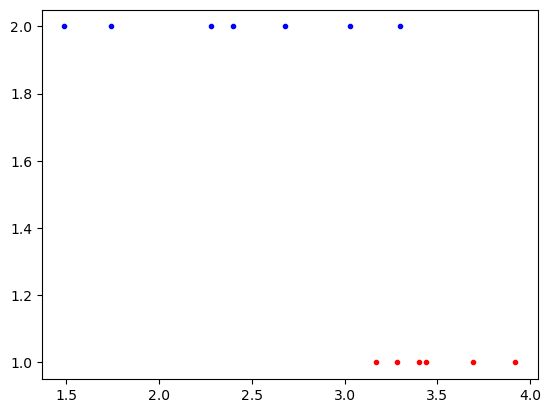

In [252]:
plt.plot()

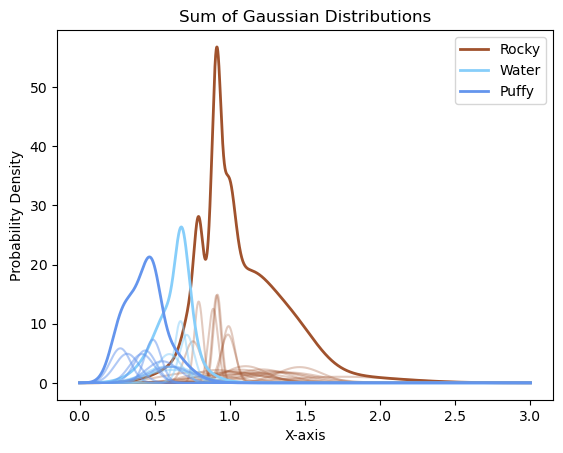

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, 3, 100000)
y_total = 0
for i in range(0,len(planet_rocky)):
    mu, sigma = density_rocky[i]/earth_density, (density_up_rocky[i]/earth_density + density_low_rocky[i]/earth_density)/2
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y,"Sienna",alpha = 0.3)
    y_total += y
plt.plot(x, y_total, label='Rocky', linestyle='-', linewidth=2,color= "Sienna")

y_total = 0
for i in range(0,len(planet_water)):
    mu, sigma = density_water[i]/earth_density, (density_up_water[i]/earth_density + density_low_water[i]/earth_density)/2
    y = norm.pdf(x, mu, sigma,)
    plt.plot(x, y,color = "lightskyblue",alpha = 0.5)
    y_total += y
plt.plot(x, y_total, label='Water', linestyle='-', linewidth=2,color= "lightskyblue")

y_total = 0
for i in range(0,len(planet_puffy)):
    mu, sigma = density_puffy[i]/earth_density, (density_up_puffy[i]/earth_density + density_low_puffy[i]/earth_density)/2
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y,"Cornflowerblue",alpha = 0.5,linestyle = "solid")
    y_total += y
plt.plot(x, y_total, label='Puffy', linestyle='-', linewidth=2,color= "Cornflowerblue")

plt.title('Sum of Gaussian Distributions')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Area under the curve: 0.9999999999999977


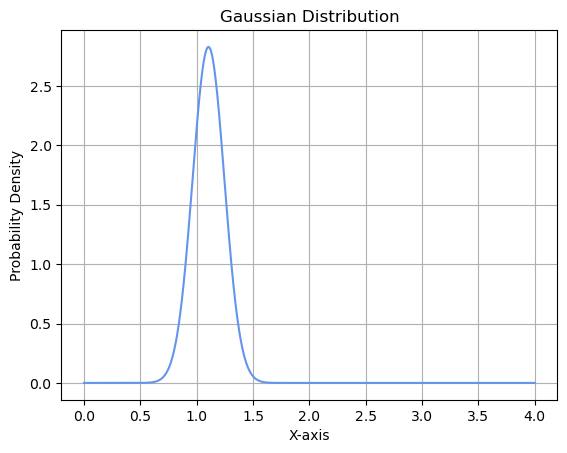

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import simps

x = np.linspace(0, 4, 10000)

i = 1
mu = density_rocky[i] / earth_density
sigma = (density_up_rocky[i] / earth_density + density_low_rocky[i] / earth_density) / 2
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, color="Cornflowerblue")
area_under_curve = simps(y, x)
print("Area under the curve:", area_under_curve)

# Customize the plot
plt.title('Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.grid(True)

# Show the plot
plt.show()


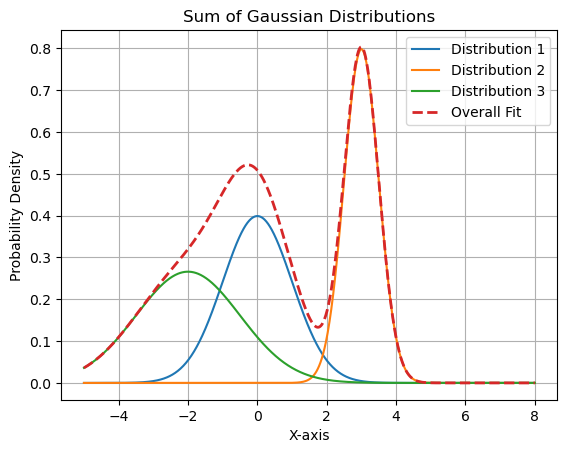

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters for each Gaussian distribution
mu1, sigma1 = 0, 1
mu2, sigma2 = 3, 0.5
mu3, sigma3 = -2, 1.5

# Generate data points for each distribution
x = np.linspace(-5, 8, 1000)
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)
y3 = norm.pdf(x, mu3, sigma3)

# Add the distributions together to create the overall fit
y_total = y1 + y2 + y3

# Plot each individual distribution and the overall fit
plt.plot(x, y1, label='Distribution 1')
plt.plot(x, y2, label='Distribution 2')
plt.plot(x, y3, label='Distribution 3')
plt.plot(x, y_total, label='Overall Fit', linestyle='--', linewidth=2)

# Customize the plot
plt.title('Sum of Gaussian Distributions')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

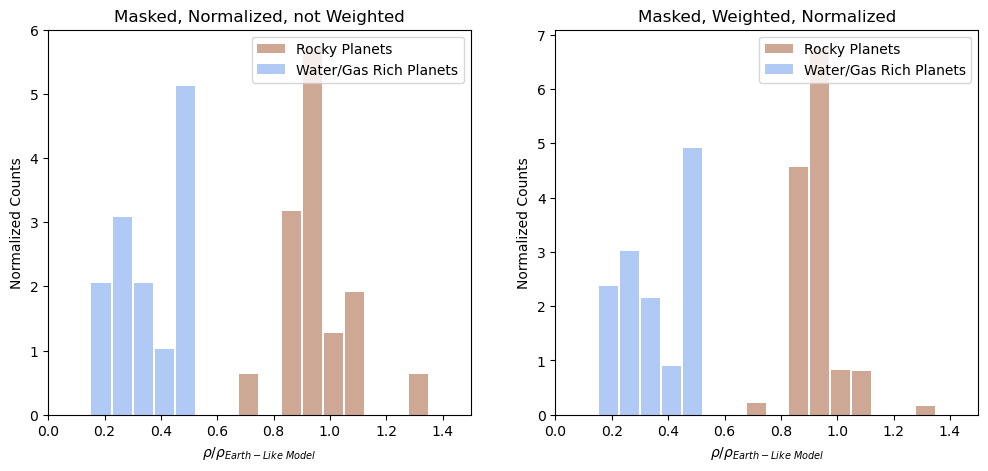

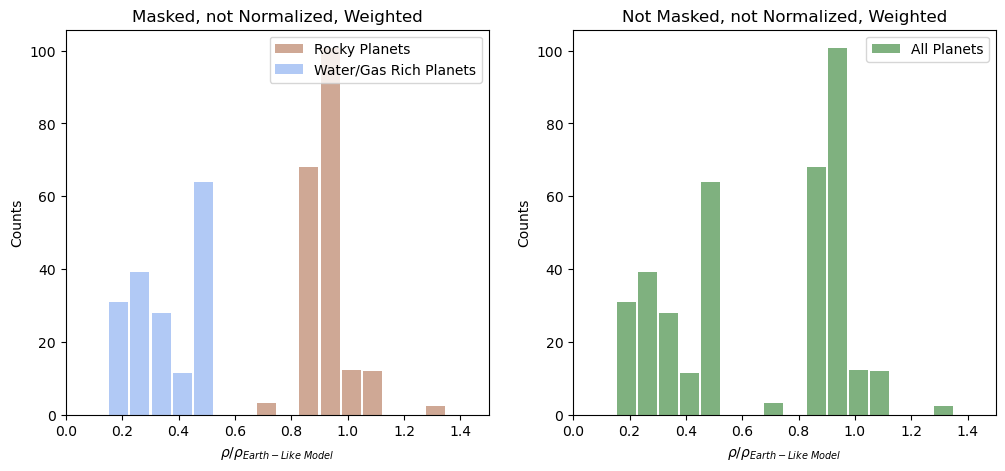

In [10]:
fig, ax = plt.subplots(figsize=(12,5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 1.5, 21)
pbins = np.linspace(0, 1.5, 100)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

###### Rocky Planets #####
indexs  = index_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True,label = "Rocky Planets")

##### Puffy Neptunes + Water Worlds ####
indexs  = np.concatenate([index_water, index_puffy])
weight  = np.concatenate([weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True,label = "Water/Gas Rich Planets")

##### Plotting ######
plt.title('Masked, Normalized, not Weighted')
plt.ylabel('Normalized Counts')
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 2, 2)
###### Rocky Planets #####
indexs  = index_rocky
weight  = weight_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True, weights=weight,label = "Rocky Planets")

##### Puffy Neptunes #####
indexs  = np.concatenate([index_water, index_puffy])
weight  = np.concatenate([weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True, weights=weight,label = "Water/Gas Rich Planets")

##### Plotting ######
plt.title('Masked, Weighted, Normalized')
plt.ylabel('Normalized Counts')

plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

image_name = 'LIV34_Histograms_2pop_NO_Gauss1.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)
fig, ax = plt.subplots(figsize=(12,5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight,label = "Rocky Planets")

##### Puffy Neptunes #####
indexs  = np.concatenate([index_water, index_puffy])
weight  = np.concatenate([weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False, weights=weight,label = "Water/Gas Rich Planets")

##### Plotting ######
plt.title('Masked, not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot

###### Rocky Planets #####
indexs  = np.concatenate([index_rocky,index_water, index_puffy])
weight  = np.concatenate([weight_rocky,weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='darkgreen', alpha=0.5, rwidth=0.9, density=False, weights=weight, label = "All Planets")
plt.title('Not Masked, not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

image_name = 'LIV34_Histograms_2pop_NO_Gauss2.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


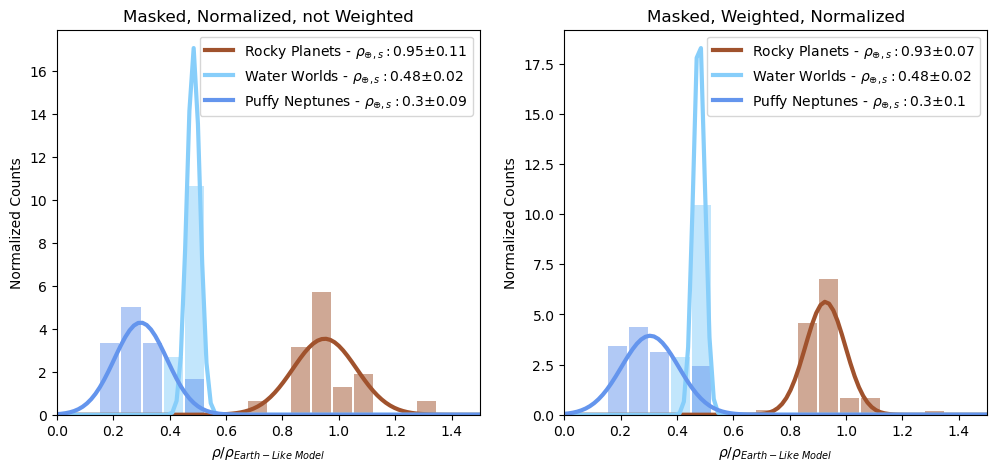

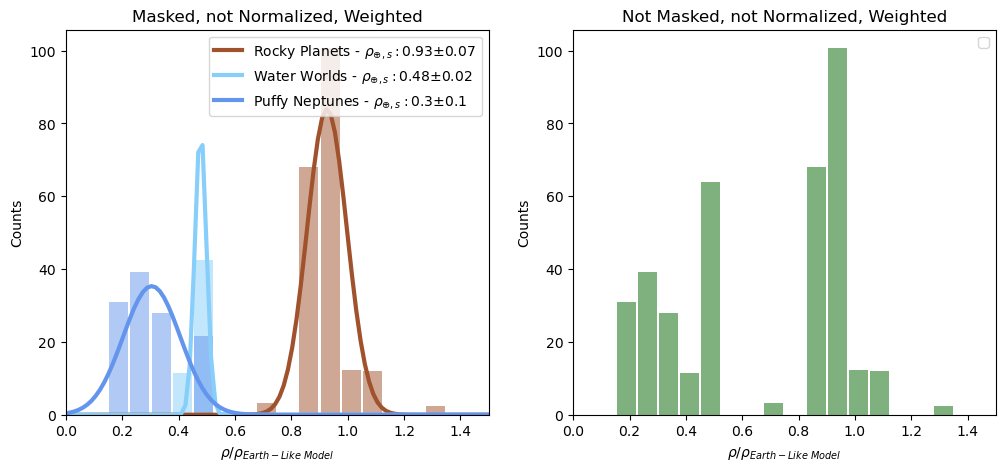

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 1.5, 21)
pbins = np.linspace(0, 1.5, 100)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

###### Rocky Planets #####
indexs  = index_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

##### Water Worlds #####
indexs  = index_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5,rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

##### Puffy Neptunes #####
indexs  = index_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs],ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Masked, Normalized, not Weighted')
plt.ylabel('Normalized Counts')
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 2, 2)
###### Rocky Planets #####
indexs  = index_rocky
weight  = weight_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

##### Water Worlds #####
indexs  = index_water
weight  = weight_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=True, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

##### Puffy Neptunes #####
indexs  = index_puffy
weight  = weight_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Masked, Weighted, Normalized')
plt.ylabel('Normalized Counts')

plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

image_name = 'LIV34_Histograms_3pop_Gauss1.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

fig, ax = plt.subplots(figsize=(12,5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, weights=weight)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
rocky_scale  = scale_factor
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "Sienna",linewidth=3)

##### Water Worlds #####
indexs  = index_water
weight  = weight_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, weights=weight)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
water_scale  = scale_factor
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

##### Puffy Neptunes #####
indexs  = index_puffy
weight  = weight_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, weights=weight)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
puffy_scale  = scale_factor
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Masked, not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot

###### Rocky Planets #####
indexs  = np.concatenate([index_rocky,index_water, index_puffy])
weight  = np.concatenate([weight_rocky,weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='darkgreen', alpha=0.5, rwidth=0.9, density=False, weights=weight)
plt.title('Not Masked, not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

image_name = 'LIV34_Histograms_3pop_Gauss2.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


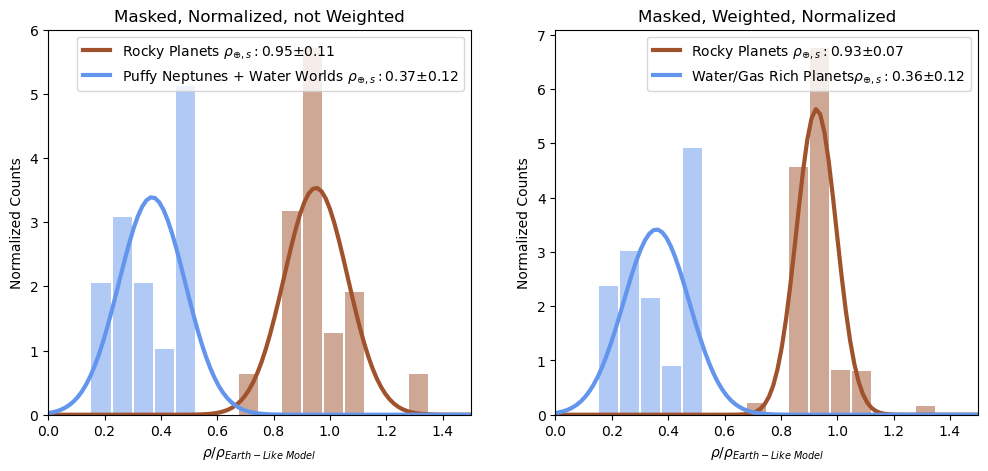

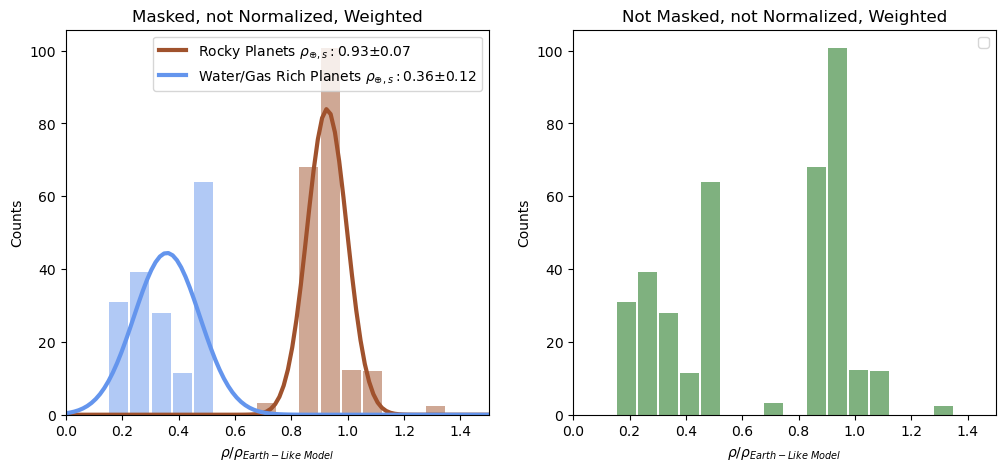

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
bins  = np.linspace(0, 1.5, 21)
pbins = np.linspace(0, 1.5, 100)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

###### Rocky Planets #####
indexs  = index_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

##### Puffy Neptunes + Water Worlds ####
indexs  = np.concatenate([index_water, index_puffy])
weight  = np.concatenate([weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5,rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs],ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy Neptunes + Water Worlds "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Masked, Normalized, not Weighted')
plt.ylabel('Normalized Counts')
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 2, 2)
###### Rocky Planets #####
indexs  = index_rocky
weight  = weight_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

##### Puffy Neptunes #####
indexs  = np.concatenate([index_water, index_puffy])
weight  = np.concatenate([weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water/Gas Rich Planets"+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Masked, Weighted, Normalized')
plt.ylabel('Normalized Counts')

plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

image_name = 'LIV34_Histograms_2pop_Gauss1.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)
fig, ax = plt.subplots(figsize=(12,5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, weights=weight)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Rocky Planets "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "Sienna",linewidth=3)

##### Puffy Neptunes #####
indexs  = np.concatenate([index_water, index_puffy])
weight  = np.concatenate([weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, weights=weight)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Water/Gas Rich Planets "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Masked, not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)


plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot

###### Rocky Planets #####
indexs  = np.concatenate([index_rocky,index_water, index_puffy])
weight  = np.concatenate([weight_rocky,weight_water, weight_puffy])
plt.hist(density_norm[indexs], bins=bins, color='darkgreen', alpha=0.5, rwidth=0.9, density=False, weights=weight)
plt.title('Not Masked, not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)
image_name = 'LIV34_Histograms_2pop_Gauss2.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)


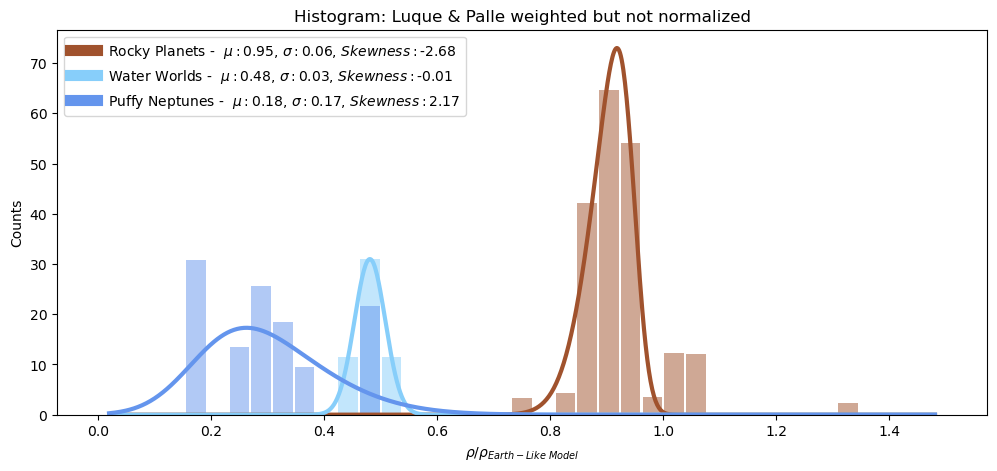

In [13]:
# Define a function for skewed Gaussian fitting
def skewed_gaussian(x, amplitude, mean, stddev, skew):
    return amplitude * skewnorm.pdf(x, skew, loc=mean, scale=stddev)

# Define a function for plotting histograms with skewed Gaussian fits
def plot_skewed_gaussian(data, weights, label, color, bins, title):
    hist, bin_edges = np.histogram(data, bins=bins, weights=weights, density=False)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    initial_params = [1.0, np.mean(data), np.std(data), 0.0]  # Adjust initial parameters
    params, _ = curve_fit(skewed_gaussian, bin_centers, hist, p0=initial_params)
    amplitude, mean, stddev, skew = params

    x_fit = np.linspace(min(bin_centers), max(bin_centers), 1000)
    y_fit = skewed_gaussian(x_fit, amplitude, mean, stddev, skew)

    plt.hist(data, bins=bins, color=color, alpha=0.5, rwidth=0.9, density=False, weights=weights)
    plt.plot(x_fit, y_fit, label=label + "  $μ:$" + f"{mean:.2f}, $σ:$" + f"{stddev:.2f}, $Skewness:$" + f"{skew:.2f}", color=color, linewidth=3)

    plt.title(title)
    plt.legend(loc='upper right')

    for line in plt.legend().get_lines():
        line.set_linewidth(8.0)

    plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
    plt.ylabel('Counts')

# Define your data and weights


fig, ax = plt.subplots(figsize=(12,5))

bins = np.linspace(0, 1.5, 40)
data_rocky = density_norm[index_rocky]
weights_rocky = weight_rocky
data_water = density_norm[index_water]
weights_water = weight_water
data_puffy = density_norm[index_puffy]
weights_puffy = weight_puffy

plot_skewed_gaussian(data_rocky, weights_rocky, "Rocky Planets -", "sienna", bins, "")
plot_skewed_gaussian(data_water, weights_water, "Water Worlds -", "lightskyblue", bins, '')
plot_skewed_gaussian(data_puffy, weights_puffy, "Puffy Neptunes -", "cornflowerblue", bins, 'Histogram: Luque & Palle weighted but not normalized')
image_name = 'LIV34_Histograms_3pop_skew.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)

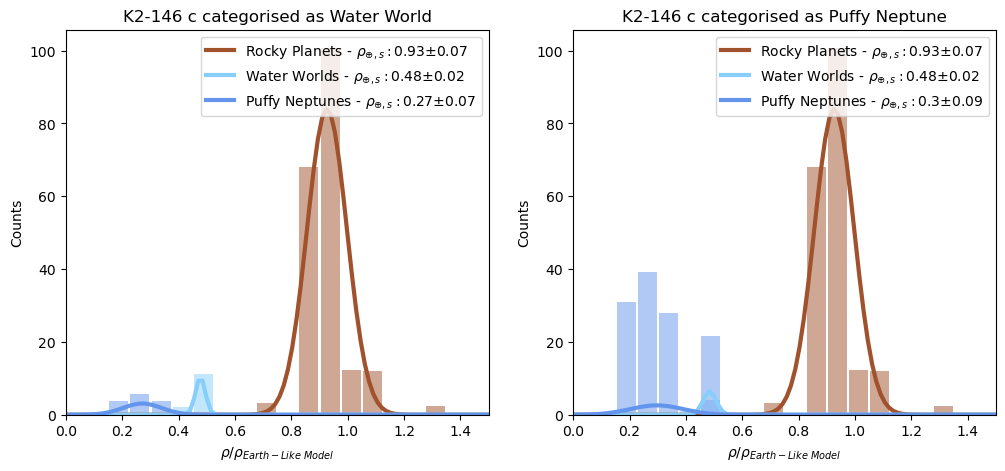

In [14]:
mass_err_LI = np.array([mass_unc_low_LI, mass_unc_up_LI])
density_err_LI = [density_unc_low_LI / rocky_density(mass_LI), density_unc_up_LI / rocky_density(mass_LI)]
density_norm = density_LI / rocky_density(mass_LI)
xerr = [mass_err_LI[0][index], mass_err_LI[1][index]]
yerr = [density_err_LI[0][index], density_err_LI[1][index]]

index = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4:
        index.append(i) 

index_puffy = []; index_water = []; index_rocky = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) and planet_name_LI[i] != 'K2-146 c':
            index_puffy.append(i)
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) or planet_name_LI[i] == 'K2-146 c':
            index_water.append(i)
weight = 1/(np.sqrt(density_err_LI[0][index]**2 +density_err_LI[1][index]**2 ) )
weight_rocky = weight[index_rocky]
weight_water = weight[index_water]
weight_puffy = weight[index_puffy]

fig, ax = plt.subplots(figsize=(12,5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, weights=weight)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "Sienna",linewidth=3)

##### Water Worlds #####
indexs  = index_water
weight  = weight_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=True)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True)
scale_factor = sum(raw_counts)/sum(normalized_counts)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

##### Puffy Neptunes #####
indexs  = index_puffy
weight  = weight_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('K2-146 c categorised as Water World')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
index = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4:
        index.append(i) 

index_puffy = []; index_water = []; index_rocky = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_puffy.append(i)
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_water.append(i)
weight = 1/(np.sqrt(density_err_LI[0][index]**2 +density_err_LI[1][index]**2 ) )
weight_rocky = weight[index_rocky]
weight_water = weight[index_water]
weight_puffy = weight[index_puffy]

###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_norm[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_norm[indexs], aweights = weight, ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, weights=weight)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "Sienna",linewidth=3)

##### Water Worlds #####
indexs  = index_water
weight  = weight_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True)
scale_factor = sum(raw_counts)/sum(normalized_counts)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

##### Puffy Neptunes #####
indexs  = index_puffy
weight  = weight_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True)
scale_factor = sum(raw_counts)/sum(normalized_counts)
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*scale_factor
plt.plot(pbins, best_fit_line,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('K2-146 c categorised as Puffy Neptune')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

image_name = 'LIV34_Histograms_K2-146_importance.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

## Recreating Luque & Palle histogram

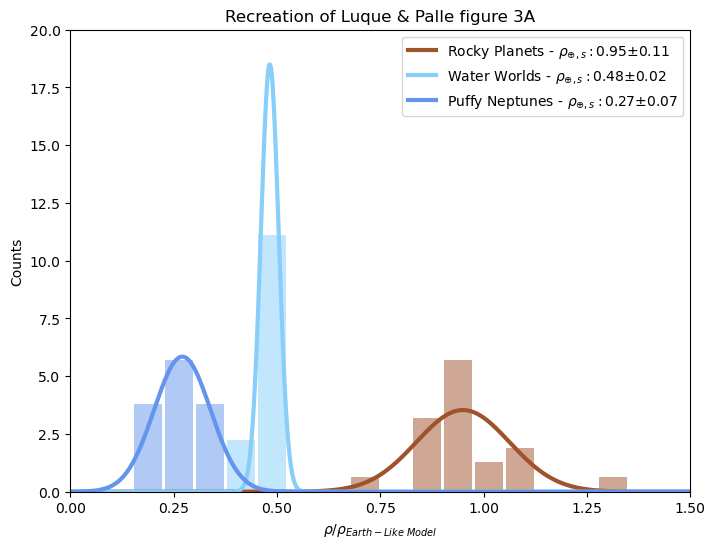

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
mass_err_LI = np.array([mass_unc_low_LI, mass_unc_up_LI])
density_err_LI = [density_unc_low_LI / rocky_density(mass_LI), density_unc_up_LI / rocky_density(mass_LI)]
density_norm = density_LI / rocky_density(mass_LI)
xerr = [mass_err_LI[0][index], mass_err_LI[1][index]]
yerr = [density_err_LI[0][index], density_err_LI[1][index]]

index = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4:
        index.append(i) 

index_puffy = []; index_water = []; index_rocky = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) and planet_name_LI[i] != 'K2-146 c':
            index_puffy.append(i)
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])) or planet_name_LI[i] == 'K2-146 c':
            index_water.append(i)
weight = 1/(np.sqrt(density_err_LI[0][index]**2 +density_err_LI[1][index]**2 ) )
weight_rocky = weight[index_rocky]
weight_water = weight[index_water]
weight_puffy = weight[index_puffy]

bins  = np.linspace(0, 1.5, num= 21)
pbins = np.linspace(0, 1.5, 1000)
###### Rocky Planets #####
indexs = index_rocky
plt.hist(density_norm[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs],ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True)
scale_factor = sum(raw_counts)/sum(normalized_counts)
scale_rocky = scale_factor
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "Sienna",linewidth=3)

##### Water Worlds #####
indexs  = index_water
plt.hist(density_norm[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True)
scale_factor = sum(raw_counts)/sum(normalized_counts)
scale_water = scale_factor
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

##### Puffy Neptunes #####
indexs  = index_puffy
plt.hist(density_norm[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True)
mu = np.average(density_norm[indexs])
sigma = np.sqrt(np.cov(density_norm[indexs], ddof=0))
raw_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins)
normalized_counts, bin_edges = np.histogram(density_norm[indexs], bins=bins, density=True)
scale_factor = sum(raw_counts)/sum(normalized_counts)
scale_puffy = scale_factor
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Recreation of Luque & Palle figure 3A')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.ylim(0,20)
plt.xticks([0,0.25,0.5,0.75,1,1.25,1.50],["0.00","0.25","0.50","0.75","1.00","1.25","1.50"],minor=False)

plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
image_name = 'luque_scale_factor.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)

## Adding planets to the sample

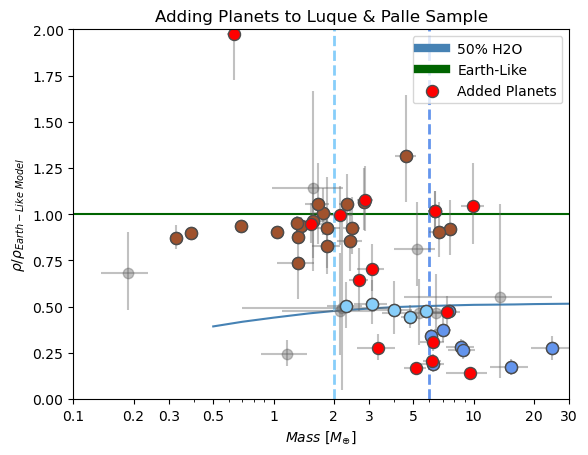

In [18]:
fig, ax = plt.subplots()
plt.plot(H20_50_500K["Mass"], H20_50_500K_density_g_cm3 / rocky_density(H20_50_500K["Mass"]), "-", color="steelblue", label="50% H2O", zorder=-32)
plt.plot(earth_like_rocky["Mass"], earth_like_rocky_density_g_cm3 / rocky_density(earth_like_rocky["Mass"]), "-", color="darkgreen", label="Earth-Like", zorder=-32)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)

xerr = [mass_err_LI[0][index], mass_err_LI[1][index]]
yerr = [density_err_LI[0][index], density_err_LI[1][index]]
plt.errorbar(mass_LI[index], density_norm[index], xerr=xerr, yerr=yerr, fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)
index_puffy = []; index_water = []; index_rocky = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_puffy.append(i)
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_water.append(i)
plt.scatter(mass_LI[index_rocky], density_norm[index_rocky],color = "sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_puffy], density_norm[index_puffy],color = "cornflowerblue",s = 75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], density_norm[index_water],color = "lightskyblue",s = 75, edgecolor = "0.3")

plt.xlim(0.1, 30)
plt.ylim(0, 2); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.legend()

plt.scatter(mass2,np.array(density2) / np.array(rocky_density(mass2)),color = "red",s=20, edgecolor = "0.3")
mass_err_LI = np.array([mass_unc_low_LI, mass_unc_up_LI])
density_err_LI = [density_unc_low_LI / rocky_density(mass_LI), density_unc_up_LI / rocky_density(mass_LI)]
density_norm = density_LI / rocky_density(mass_LI)

index = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4:
        index.append(i) 
xerr = [mass_err_LI[0][index], mass_err_LI[1][index]]
yerr = [density_err_LI[0][index], density_err_LI[1][index]]
#plt.errorbar(mass_LI[index], density_norm[index], xerr=xerr, yerr=yerr, fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)
index_puffy = []; index_water = []; index_rocky = []
for i in range(0, len(planet_name_LI)):
    if radius_LI[i] < 4 and planet_name_LI[i] in planets:
        if abs(1- density_norm[i]) < abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_rocky.append(i)
        if mass_LI[i] >= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_puffy.append(i)
        if 2 <= mass_LI[i] <= 6 and abs(1- density_norm[i]) > abs(density_norm[i] - h20model_density(mass_LI[i])):
            index_water.append(i)
plt.scatter(mass_LI[index_rocky], density_norm[index_rocky],color = "sienna",s=75, edgecolor = "0.3")
plt.scatter(mass_LI[index_puffy], density_norm[index_puffy],color = "cornflowerblue",s = 75, edgecolor = "0.3")
plt.scatter(mass_LI[index_water], density_norm[index_water],color = "lightskyblue",s = 75, edgecolor = "0.3")

plt.xlim(0.1, 30)
plt.ylim(0, 2); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.title("Adding Planets to Luque & Palle Sample")
plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.scatter(mass2,np.array(density2) / np.array(rocky_density(mass2)),color = "red",s=75, edgecolor = "0.3",label = "Added Planets")

xerr = [np.abs(mass_low2), mass_up2]
yerr = [np.abs(density_low2) / np.array(rocky_density(mass2)) , density_up2 / np.array(rocky_density(mass2)) ]
plt.errorbar(mass2, np.array(density2)/ np.array(rocky_density(mass2)), xerr=xerr, yerr=yerr, fmt='.', markersize=15, color="0.4", zorder=-32, alpha=0.4)
plt.xlabel("$Mass\ [M_{\oplus}]$")
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(6.0)

image_name = 'LIV34_add_DM1.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

NameError: name 'planet_name' is not defined

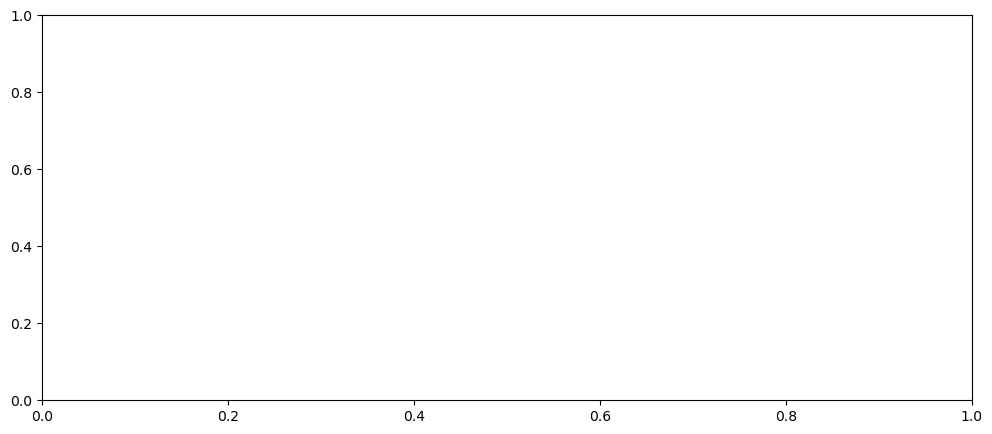

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
masses_add  = np.concatenate([mass_LI[index],mass2])
radii_add   = np.concatenate([radius_LI[index],radius2])
density_add = np.concatenate([density_norm[index],np.array(density2) / np.array(rocky_density(mass2))])
selected_planets = [planet_name_LI[i] for i in index if i < len(planet_name)]
planet_name = np.concatenate([selected_planets,planet2])
xerr = [np.concatenate([mass_err_LI[0][index],np.abs(mass_low2)]), np.concatenate([mass_err_LI[1][index],np.abs(mass_up2)])]
yerr = [np.concatenate([density_err_LI[0][index],np.abs(density_low2/ np.array(rocky_density(mass2)))]) , np.concatenate([density_err_LI[1][index], np.abs(density_up2/ np.array(rocky_density(mass2))) ])]
no_plot = []
for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] not in planets:
        no_plot.append(planet_name_LI[i])
        
index_puffy = []; index_water = []; index_rocky = []    
for i in range(0, len(planet_name)):
    if radii_add[i] < 4 and planet_name[i] not in no_plot:
        if planet_name[i] in planets or planet_name[i] in planet2:
            if abs(1- density_add[i]) < abs(density_add[i] - h20model_density(masses_add[i])):
                index_rocky.append(i)
            if masses_add[i] >= 6 and abs(1- density_add[i]) > abs(density_add[i] - h20model_density(masses_add[i])):
                index_puffy.append(i)
            if 2 <= masses_add[i] <= 6 and abs(1- density_add[i]) > abs(density_add[i] - h20model_density(masses_add[i])):
                index_water.append(i)

weight = 1/(yerr[0]**2 +yerr[1]**2 )
weight_rocky = weight[index_rocky]
weight_water = weight[index_water]
weight_puffy = weight[index_puffy]

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(H20_50_500K["Mass"], H20_50_500K_density_g_cm3 / rocky_density(H20_50_500K["Mass"]), "-", color="steelblue", label="50% H2O", zorder=-32)
plt.plot(earth_like_rocky["Mass"], earth_like_rocky_density_g_cm3 / rocky_density(earth_like_rocky["Mass"]), "-", color="darkgreen", label="Earth-Like", zorder=-32)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.errorbar(mass_LI,density_LI/ np.array(rocky_density(mass_LI)),xerr = mass_err_LI, yerr=density_err_LI,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.errorbar(mass2,density2/ np.array(rocky_density(mass2)),xerr = [np.abs(mass_low2),mass_up2],yerr = [np.abs(density_low2/ np.array(rocky_density(mass2))),np.abs(density_up2/ np.array(rocky_density(mass2)))],fmt='.',markersize = 15,color = "red",zorder=-32,alpha = 0.4)
plt.scatter(masses_add[index_rocky], density_add[index_rocky],color = "sienna",s=75, edgecolor = "0.3")
plt.scatter(masses_add[index_puffy], density_add[index_puffy],color = "cornflowerblue",s = 75, edgecolor = "0.3")
plt.scatter(masses_add[index_water], density_add[index_water],color = "lightskyblue",s = 75, edgecolor = "0.3")
plt.scatter(mass2,np.array(density2) / np.array(rocky_density(mass2)),color = "red",s=75, edgecolor = "0.3",label = "Added Planets")

plt.xlim(0.1, 30)
plt.ylim(0, 2.1); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.title("Adding Planets to Luque & Palle Sample")
plt.xlabel("$Mass\ [M_{\oplus}]$")
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(6.0)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
plt.plot(H20_50_500K["Mass"], H20_50_500K_density_g_cm3 / rocky_density(H20_50_500K["Mass"]), "-", color="steelblue", label="50% H2O", zorder=-32)
plt.plot(earth_like_rocky["Mass"], earth_like_rocky_density_g_cm3 / rocky_density(earth_like_rocky["Mass"]), "-", color="darkgreen", label="Earth-Like", zorder=-32)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2)
plt.errorbar(mass_LI,density_LI/ np.array(rocky_density(mass_LI)),xerr = mass_err_LI, yerr=density_err_LI,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.errorbar(mass2,density2/ np.array(rocky_density(mass2)),xerr = [np.abs(mass_low2),mass_up2],yerr = [np.abs(density_low2/ np.array(rocky_density(mass2))),np.abs(density_up2/ np.array(rocky_density(mass2)))],fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.scatter(masses_add[index_rocky], density_add[index_rocky],color = "sienna",s=75, edgecolor = "0.3")
plt.scatter(masses_add[index_puffy], density_add[index_puffy],color = "cornflowerblue",s = 75, edgecolor = "0.3")
plt.scatter(masses_add[index_water], density_add[index_water],color = "lightskyblue",s = 75, edgecolor = "0.3")
plt.scatter(mass2,np.array(density2) / np.array(rocky_density(mass2)),facecolor = "None",s=75, edgecolor = "red",label = "Added Planets")

plt.xlim(0.1, 30)
plt.ylim(0, 2.1); plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
plt.ylabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.title("Adding Planets to Luque & Palle Sample")
plt.xlabel("$Mass\ [M_{\oplus}]$")
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(6.0)
    
image_name = 'LIV34_add_DM.png'
image_format = 'png'
#fig.savefig(image_name, format=image_format, dpi=1200)

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
mass_err_LI   = [mass_unc_low_LI,mass_unc_up_LI]
radius_err_LI = [radius_unc_low_LI,radius_unc_up_LI]
plt.errorbar(mass_LI,radius_LI,xerr = mass_err_LI, yerr=radius_err_LI,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.plot(list(earth_like_rocky["Mass"]),list(earth_like_rocky["Radius"]),"-",color = "Darkgreen",label = "Earth-like")

norm = mcolors.Normalize(vmin=300, vmax=1200)  # Set the desired min and max values
cmap = plt.cm.get_cmap('YlOrBr_r')
densities = []
for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] in planets:
        plt.scatter(mass_LI[i], radius_LI[i], c=[pl_eq_LI[i]], cmap=cmap, norm=norm, marker='o',s=65, edgecolors='0.2')   
        densities.append(density_LI[i])
cbar = plt.colorbar()

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log"); plt.xlim(0.1,30); plt.ylim(0.5,5)
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.title("Luque & Palle Sample")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
plt.errorbar(mass_LI,radius_LI,xerr = mass_err_LI, yerr=radius_err_LI,fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.errorbar(mass2,radius2,xerr = [np.abs(mass_low2),mass_up2],yerr = [np.abs(radius_low2),np.abs(radius_up2)],fmt='.',markersize = 15,color = "0.8",zorder=-32,alpha = 0.4)
plt.plot(list(earth_like_rocky["Mass"]),list(earth_like_rocky["Radius"]),"-",color = "Darkgreen",label = "Earth-like")
norm = mcolors.Normalize(vmin=300, vmax=1200)  # Set the desired min and max values
cmap = plt.cm.get_cmap('YlOrBr_r')
densities = []
for i in range(0,len(temps)):
    if planet_name[i] in planets or planet_name[i] in planet2:
        plt.scatter(masses_add[i], radii_add[i], c=[temps[i]], cmap=cmap, norm=norm, marker='o',s=65, edgecolors='0.2')   
cbar = plt.colorbar()

plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
plt.xscale("log"); plt.xlim(0.1,30); plt.ylim(0.5,5)
plt.xticks([0.1,0.2,0.3,0.5,1,2,3,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","3","5","10","20", "30"],minor=False)
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)
plt.title("Planets added to Luque & Palle Sample")
image_name = 'LIV34_add_RM.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)


In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_add[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight,label = "Rocky Planets")

##### Water Worlds #####
indexs  = index_water
weight  = weight_water
plt.hist(density_add[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False, weights=weight, label = "Water Worlds")

##### Puffy Neptunes #####
indexs  = index_puffy
weight  = weight_puffy
plt.hist(density_add[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False, weights=weight, label = "Puffy Neptunes")

##### Plotting ######
plt.title('Added planets: Weighted, Not Normalized')
plt.ylabel('Counts')

plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_add[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_add[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_add[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*255
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "Sienna",linewidth=3)

##### Water Worlds #####
indexs  = index_water
weight  = weight_water
plt.hist(density_add[indexs], bins=bins, color='lightskyblue', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_add[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_add[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*130
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

##### Puffy Neptunes #####
indexs  = index_puffy
weight  = weight_puffy
plt.hist(density_add[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_add[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_add[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*240
plt.plot(pbins, best_fit_line,label ="Puffy Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Added planets: not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 3, 3)  # 1 row, 2 columns, first subplot

###### Rocky Planets #####
indexs  = np.concatenate([index_rocky,index_water, index_puffy])
weight  = np.concatenate([weight_rocky,weight_water, weight_puffy])
plt.hist(density_add[indexs], bins=bins, color='darkgreen', alpha=0.5, rwidth=0.9, density=False, weights=weight,label = "All Planets")
plt.title('Planets added: not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(6.0)
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

image_name = 'LIV34_add_hist3pop.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)


fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(1, 3, 1)  # 1 row, 2 columns, first subplot
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_add[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight,label = "Rocky Planets")

##### Water/Puffy Worlds #####
indexs  = np.concatenate([index_water,index_puffy])
weight  = np.concatenate([weight_water,weight_puffy])
plt.hist(density_add[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False, weights=weight,label = "Puffy/ Gas Rich Worlds")

##### Plotting ######
plt.title('Added planets: Weighted, Not Normalized')
plt.ylabel('Counts')

leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(6.0)
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 3, 2)  # 1 row, 2 columns, first subplot
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_add[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_add[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_add[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*255
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "Sienna",linewidth=3)

##### Water/Puffy Worlds #####
indexs  = np.concatenate([index_water,index_puffy])
weight  = np.concatenate([weight_water,weight_puffy])
plt.hist(density_add[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=False, weights=weight)
mu = np.average(density_add[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_add[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)*391
plt.plot(pbins, best_fit_line,label ="Puffy/ Gas Rich Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)

##### Plotting ######
plt.title('Added planets: not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
plt.legend(loc='upper right')
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(6.0)

plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

plt.subplot(1, 3, 3)  # 1 row, 2 columns, first subplot

###### Rocky Planets #####
indexs  = np.concatenate([index_rocky,index_water, index_puffy])
weight  = np.concatenate([weight_rocky,weight_water, weight_puffy])
plt.hist(density_add[indexs], bins=bins, color='darkgreen', alpha=0.5, rwidth=0.9, density=False, weights=weight,label = "All Planets")
plt.title('Planets added: not Normalized, Weighted')
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.ylabel('Counts')
plt.xlim(0,1.50)
leg = plt.legend(loc='upper right')
for line in leg.get_lines():
    line.set_linewidth(6.0)
plt.xlabel('$ρ / ρ_{Earth-Like\ Model}$')
plt.xlim(0,1.50)

indexs  = np.concatenate([index_water,index_puffy])
weight  = np.concatenate([weight_water,weight_puffy])

image_name = 'LIV34_add_hist2pop.png'
image_format = 'png'
fig.savefig(image_name, format=image_format, dpi=1200)

In [ ]:
###### Rocky Planets #####
indexs = index_rocky
weight = weight_rocky
bins  = np.linspace(0, 1.5, 21)
plt.hist(density_add[indexs], bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, density=True, weights=weight)
mu = np.average(density_add[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_add[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "Sienna",linewidth=3)

##### Water/Puffy Worlds #####
indexs  = np.concatenate([index_water,index_puffy])
weight  = np.concatenate([weight_water,weight_puffy])
plt.hist(density_add[indexs], bins=bins, color='cornflowerblue', alpha=0.5, rwidth=0.9, density=True, weights=weight)

mu = np.average(density_add[indexs],weights = weight)
sigma = np.sqrt(np.cov(density_add[indexs], aweights = weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy/ Gas Rich Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3)


In [ ]:
hist_counts = plt.hist(density_add[indexs], bins=bins, weights=weight,density=True)
hist_counts2 = plt.hist(density_add[indexs], bins=bins, weights=weight,density=False)


In [ ]:
hist_counts[1][1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing code
indexs = index_rocky
weight = weight_rocky
bins = np.linspace(0, 1.5, 21)
density_values = density_add[indexs]

# Get the raw counts before normalization
raw_counts, bin_edges = np.histogram(density_values, bins=bins, weights=weight)
normalized_counts, bin_edges = np.histogram(density_values, bins=bins, density=True, weights=weight)
scale_factor = sum(raw_counts)/sum(normalized_counts)
# Plot the histogram with raw counts
plt.hist(density_values, bins=bins, color='Sienna', alpha=0.5, rwidth=0.9, weights=weight, label='Raw Counts')

mu = np.average(density_values, weights=weight)
sigma = np.sqrt(np.cov(density_values, aweights=weight, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line, label="Rocky Planets - " + "$ρ_{⊕,s}:$" + str(np.round(mu, 2)) + "±" + str(np.round(sigma, 2)))

# Get the normalized counts
normalized_counts, bin_edges = np.histogram(density_values, bins=bins, density=True, weights=weight)

# Print or use the raw and normalized counts for further analysis
print("Raw Counts:", raw_counts)
print("Normalized Counts:", normalized_counts)

# Show the plot
plt.legend()
plt.show()

In [ ]:
normalized_counts[12]

In [ ]:
sum(raw_counts)/sum(normalized_counts)